#**Initialization**

In [ ]:
pip install scikit-eLCS

In [331]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
#from google.colab import files

#**Data**

In [332]:
data= pd.read_csv("TrainingDataCifar100Vgg19Size50.csv")
data_test=pd.read_csv("TestingDataCifar100Vgg19Size50.csv")

#data= pd.read_csv("/content/TrainingDataCifar100Vgg19Size50.csv")
#data_test=pd.read_csv("/content/TestingDataCifar100Vgg19Size50.csv")

In [333]:
classLabel = "Class Label"

X = data.drop(classLabel,axis = 1).values
Y = data[classLabel].values

X_t= data_test.drop(classLabel,axis = 1).values
y_test= data_test[classLabel].values

In [334]:
Y_train=LabelBinarizer().fit_transform(Y)
Y_test=LabelBinarizer().fit_transform(y_test)

In [335]:
iteration=len(X_t)

# **Classifier**

In [336]:
from skeLCS import eLCS
model = eLCS(N=100000, learning_iterations = 50000,nu = 10,selection_method='tournament',track_accuracy_while_fit=True)
trainedModel = model.fit(X,Y)

# **Rule Data**

In [337]:
trainedModel.export_iteration_tracking_data("iterationData_cifar100_Vgg19_50.csv")

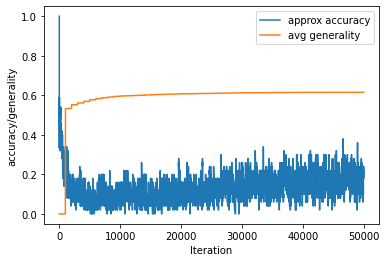

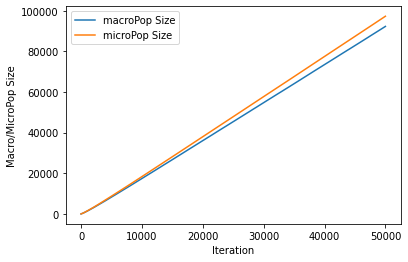

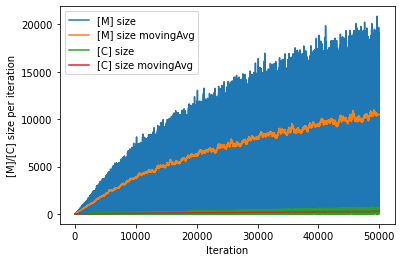

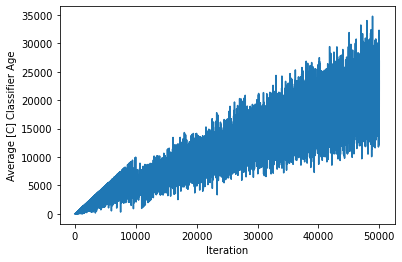

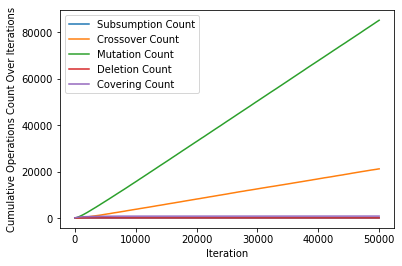

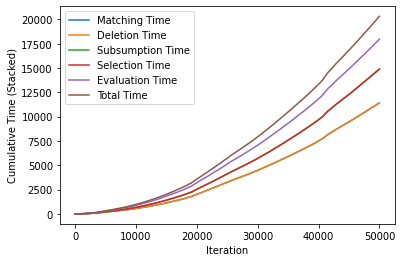

In [338]:
import matplotlib.pyplot as plt
import pandas as pd

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_cifar100_Vgg19_50.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
cSize = dataTracking["Correct Set Size"].values
experience = dataTracking["Average Iteration Age of Correct Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,cSize,label="[C] size")
plt.plot(iterations,movingAvg(cSize),label="[C] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[C] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [C] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="Selection Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [339]:
trainedModel.export_final_rule_population(filename="RulePopulationCifar100Vgg1950.csv",DCAL=False)

populationData2 = pd.read_csv("RulePopulationCifar100Vgg1950.csv")
display(populationData2)

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,#,"-10.467865752,7.190339849999999","-8.060947394769999,5.726645208769999",#,"-2.7552819262500003,7.925548554250001","-6.8290753611250015,0.8158302551250007","-5.9680653595,5.3793792515000005","-3.7032933566000006,5.521836790600001",#,#,...,8.962487e-20,0.012452,1,12781.927977,49805,0,0.48,NaN,195,15660
1,#,#,#,#,"-3.998927116999999,8.505459787",#,"-10.076720648250001,3.984243326250001",#,#,"-3.3678907773999978,19.5286287694",...,2.003018e-20,0.010719,3,14790.649013,49770,1,0.38,NaN,325,30319
2,#,"-4.894950913250001,5.405669021250001","-14.08266267862,2.987690068620001","-10.17083683065,7.51247110465",#,#,"-2.01118432075,7.60947524075","-10.516705318,10.449499562",#,#,...,3.255122e-18,0.017834,3,14977.616360,49652,2,0.50,NaN,335,18784
3,#,#,"-15.18523469003,-2.71074614397","-9.04614877775,3.58478546175",#,"-12.289276758375001,-3.3338158936249993",#,"-3.840136994400001,13.4919257064","-9.2488490011,6.332114067099999","-5.8119413188,14.1822025108",...,4.134301e-13,0.057762,1,15171.443438,49347,3,0.54,NaN,80,1385
4,#,#,#,#,#,#,#,"-13.184409284000003,6.384048604000002","-10.0918129252,5.2250660232","-4.3388121936,8.2381492476",...,2.067189e-17,0.021455,1,12750.760909,49978,4,0.54,NaN,245,11419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92270,"-6.441633054500001,7.736878106500002","-3.65631815585,5.46708807185","-14.726824642875,9.893876434874999","1.068912009780001,10.16318466222","-9.6187376395,8.616826595500001",#,#,#,#,"-6.259133224799999,15.3474415588",...,1.000000e-01,1.000000,1,6674.000000,49997,49997,0.40,NaN,0,0
92271,#,#,"-15.072414757025001,6.2655261770249995",#,"-1.36766886775,9.83417773375","-6.62376684275,-0.9446940992499995",#,#,#,"-0.10427129779999866,17.2506248814",...,1.979212e-10,0.129121,1,13626.492504,49998,49998,0.36,NaN,0,0
92272,#,#,#,#,#,#,#,#,#,#,...,1.979212e-10,0.129121,1,10805.330690,49998,49998,0.30,NaN,0,0
92273,"-10.2458791345,-1.3186684034999985","-10.41189980885,4.597574952850001",#,#,"-3.5806009779999997,7.8817536839999995","-9.510658193875,6.08598540375",#,#,"-9.5971681526,9.945056712600001",#,...,3.827599e-08,0.228188,1,12602.748948,49999,49999,0.46,NaN,0,0


# **Real curve LCS**

##**0-19**

###**0-9**

#### Class 0

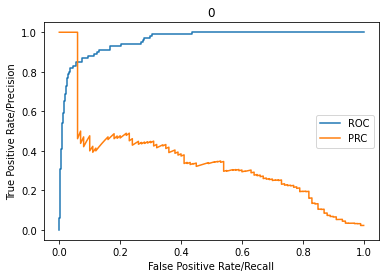

PRC AUC:0.3424451545989114
ROC AUC:0.9602969696969696


In [340]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(X_t)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [341]:
score_true_1=[]

In [342]:
for x in range(0,iteration):
  if probs[x][0]>=0.5:
    score_true_1.append(1)
  else:
    score_true_1.append(0)

score_true_1

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [343]:
score_true_correct_index_1_LCS=[]
score_true_wrong_index_1_LCS=[]

In [344]:
for x in range(0,iteration):
  if score_true_1[x]!=Y_test[x,0]:
    score_true_wrong_index_1_LCS.append(x+1)
  else:
    score_true_correct_index_1_LCS.append(x+1)

In [345]:
correct_0=len(score_true_correct_index_1_LCS)
accuracy_1=correct_0/iteration

#### Class 1

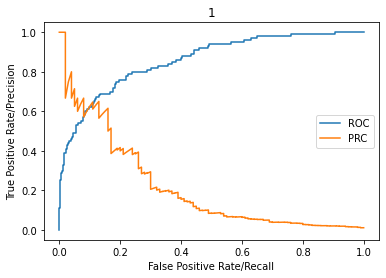

PRC AUC:0.21402196035502238
ROC AUC:0.8582767676767676


In [346]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

In [347]:
score_true_2=[]

In [348]:
for x in range(0,iteration):
  if probs[x][1]>=0.5:
    score_true_2.append(1)
  else:
    score_true_2.append(0)

score_true_2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [349]:
score_true_correct_index_2_LCS=[]
score_true_wrong_index_2_LCS=[]

In [350]:
for x in range(0,iteration):
  if score_true_2[x]!=Y_test[x,1]:
    score_true_wrong_index_2_LCS.append(x+1)
  else:
    score_true_correct_index_2_LCS.append(x+1)

In [351]:
correct_1=len(score_true_correct_index_2_LCS)
accuracy_2=correct_1/iteration

#### Class 2

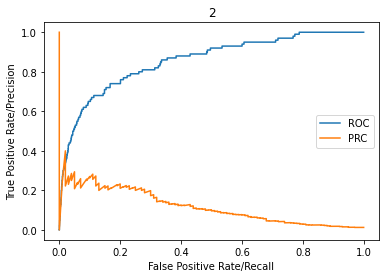

PRC AUC:0.11574682436000489
ROC AUC:0.8559348484848486


In [352]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

In [353]:
score_true_3=[]

In [354]:
for x in range(0,iteration):
  if probs[x][2]>=0.5:
    score_true_3.append(1)
  else:
    score_true_3.append(0)

score_true_3

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [355]:
score_true_correct_index_3_LCS=[]
score_true_wrong_index_3_LCS=[]

In [356]:
for x in range(0,iteration):
  if score_true_3[x]!=Y_test[x,2]:
    score_true_wrong_index_3_LCS.append(x+1)
  else:
    score_true_correct_index_3_LCS.append(x+1)

In [357]:
correct_2=len(score_true_correct_index_3_LCS)
accuracy_3=correct_2/iteration

#### Class 3

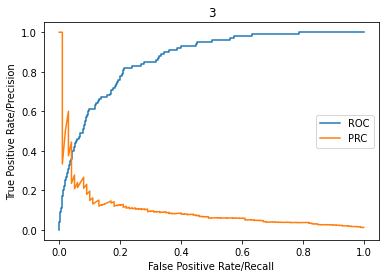

PRC AUC:0.09752079509898975
ROC AUC:0.8663626262626263


In [358]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

In [359]:
score_true_4=[]

In [360]:
for x in range(0,iteration):
  if probs[x][3]>=0.5:
    score_true_4.append(1)
  else:
    score_true_4.append(0)

score_true_4

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [361]:
score_true_correct_index_4_LCS=[]
score_true_wrong_index_4_LCS=[]

In [362]:
for x in range(0,iteration):
  if score_true_4[x]!=Y_test[x,3]:
    score_true_wrong_index_4_LCS.append(x+1)
  else:
    score_true_correct_index_4_LCS.append(x+1)

In [363]:
correct_3=len(score_true_correct_index_4_LCS)
accuracy_4=correct_3/iteration

#### Class 4

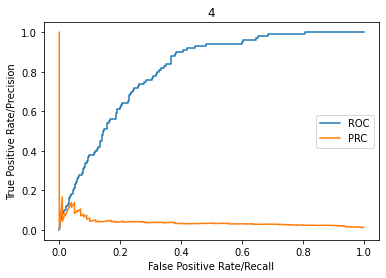

PRC AUC:0.03689524146614804
ROC AUC:0.8067919191919192


In [364]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

In [365]:
score_true_5=[]

In [366]:
for x in range(0,iteration):
  if probs[x][4]>=0.5:
    score_true_5.append(1)
  else:
    score_true_5.append(0)

score_true_5

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [367]:
score_true_correct_index_5_LCS=[]
score_true_wrong_index_5_LCS=[]

In [368]:
for x in range(0,iteration):
  if score_true_5[x]!=Y_test[x,4]:
    score_true_wrong_index_5_LCS.append(x+1)
  else:
    score_true_correct_index_5_LCS.append(x+1)

In [369]:
correct_4=len(score_true_correct_index_5_LCS)
accuracy_5=correct_4/iteration

#### Class 5

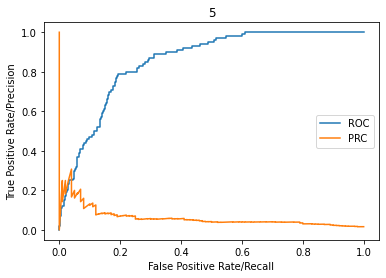

PRC AUC:0.059981355658043384
ROC AUC:0.8529626262626262


In [370]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

In [371]:
score_true_6=[]

In [372]:
for x in range(0,iteration):
  if probs[x][5]>=0.5:
    score_true_6.append(1)
  else:
    score_true_6.append(0)

score_true_6

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [373]:
score_true_correct_index_6_LCS=[]
score_true_wrong_index_6_LCS=[]

In [374]:
for x in range(0,iteration):
  if score_true_6[x]!=Y_test[x,5]:
    score_true_wrong_index_6_LCS.append(x+1)
  else:
    score_true_correct_index_6_LCS.append(x+1)

In [375]:
correct_5=len(score_true_correct_index_6_LCS)
accuracy_6=correct_5/iteration

#### Class 6

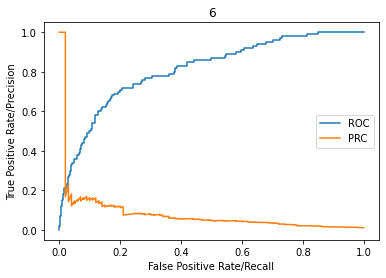

PRC AUC:0.08076470480633899
ROC AUC:0.8115737373737373


In [376]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

In [377]:
score_true_7=[]

In [378]:
for x in range(0,iteration):
  if probs[x][6]>=0.5:
    score_true_7.append(1)
  else:
    score_true_7.append(0)

score_true_7

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [379]:
score_true_correct_index_7_LCS=[]
score_true_wrong_index_7_LCS=[]

In [380]:
for x in range(0,iteration):
  if score_true_7[x]!=Y_test[x,6]:
    score_true_wrong_index_7_LCS.append(x+1)
  else:
    score_true_correct_index_7_LCS.append(x+1)

In [381]:
correct_6=len(score_true_correct_index_7_LCS)
accuracy_7=correct_6/iteration

#### Class 7

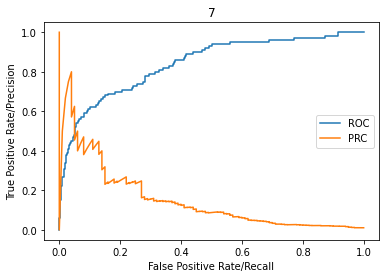

PRC AUC:0.14873997608789508
ROC AUC:0.8405070707070708


In [382]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

In [383]:
score_true_8=[]

In [384]:
for x in range(0,iteration):
  if probs[x][7]>=0.5:
    score_true_8.append(1)
  else:
    score_true_8.append(0)

score_true_8

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [385]:
score_true_correct_index_8_LCS=[]
score_true_wrong_index_8_LCS=[]

In [386]:
for x in range(0,iteration):
  if score_true_8[x]!=Y_test[x,7]:
    score_true_wrong_index_8_LCS.append(x+1)
  else:
    score_true_correct_index_8_LCS.append(x+1)

In [387]:
correct_7=len(score_true_correct_index_8_LCS)
accuracy_8=correct_7/iteration

#### Class 8

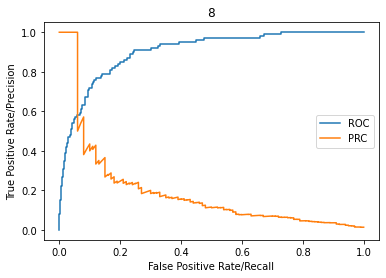

PRC AUC:0.19342642587182207
ROC AUC:0.9022050505050505


In [388]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

In [389]:
score_true_9=[]

In [390]:
for x in range(0,iteration):
  if probs[x][8]>=0.5:
    score_true_9.append(1)
  else:
    score_true_9.append(0)

score_true_9

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [391]:
score_true_correct_index_9_LCS=[]
score_true_wrong_index_9_LCS=[]

In [392]:
for x in range(0,iteration):
  if score_true_9[x]!=Y_test[x,8]:
    score_true_wrong_index_9_LCS.append(x+1)
  else:
    score_true_correct_index_9_LCS.append(x+1)

In [393]:
correct_8=len(score_true_correct_index_9_LCS)
accuracy_9=correct_8/iteration

#### Class 9

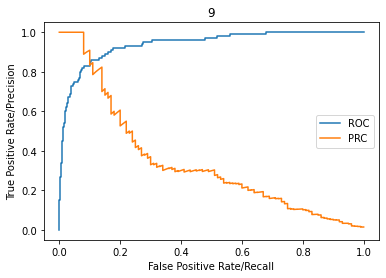

PRC AUC:0.3429279436987188
ROC AUC:0.9401767676767676


In [394]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))

In [395]:
score_true_10=[]

In [396]:
for x in range(0,iteration):
  if probs[x][9]>=0.5:
    score_true_10.append(1)
  else:
    score_true_10.append(0)

score_true_10

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [397]:
score_true_correct_index_10_LCS=[]
score_true_wrong_index_10_LCS=[]

In [398]:
for x in range(0,iteration):
  if score_true_10[x]!=Y_test[x,9]:
    score_true_wrong_index_10_LCS.append(x+1)
  else:
    score_true_correct_index_10_LCS.append(x+1)

In [399]:
correct_9=len(score_true_correct_index_10_LCS)
accuracy_10=correct_9/iteration

###**10-19**

#### Class 10

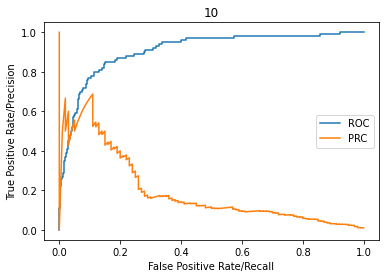

PRC AUC:0.1926568959473968
ROC AUC:0.9078787878787878


In [400]:
fpr11, tpr11, thresholds11 = roc_curve(Y_test[:,10], probs[:,10])
prec11, recall11, thresholds11 = precision_recall_curve(Y_test[:,10], probs[:,10])

plt.plot(fpr11,tpr11,label="ROC")
plt.plot(recall11,prec11,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('10')
plt.show()

print("PRC AUC:" + str(auc(recall11, prec11)))
print("ROC AUC:" + str(auc(fpr11, tpr11)))

In [401]:
score_true_11=[]

In [402]:
for x in range(0,iteration):
  if probs[x][10]>=0.5:
    score_true_11.append(1)
  else:
    score_true_11.append(0)

score_true_11

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [403]:
score_true_correct_index_11_LCS=[]
score_true_wrong_index_11_LCS=[]

In [404]:
for x in range(0,iteration):
  if score_true_11[x]!=Y_test[x,10]:
    score_true_wrong_index_11_LCS.append(x+1)
  else:
    score_true_correct_index_11_LCS.append(x+1)

In [405]:
correct_10=len(score_true_correct_index_11_LCS)
accuracy_11=correct_10/iteration

#### Class 11

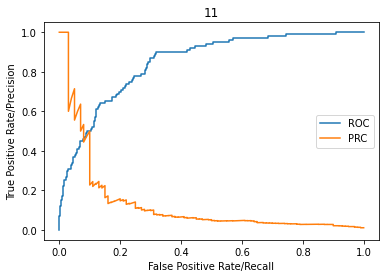

PRC AUC:0.1305471533153701
ROC AUC:0.8473616161616161


In [406]:
fpr12, tpr12, thresholds12 = roc_curve(Y_test[:,11], probs[:, 11])
prec12, recall12, thresholds12 = precision_recall_curve(Y_test[:,11], probs[:, 11])

plt.plot(fpr12,tpr12,label="ROC")
plt.plot(recall12,prec12,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('11')
plt.show()

print("PRC AUC:" + str(auc(recall12, prec12)))
print("ROC AUC:" + str(auc(fpr12, tpr12)))

In [407]:
score_true_12=[]

In [408]:
for x in range(0,iteration):
  if probs[x][11]>=0.5:
    score_true_12.append(1)
  else:
    score_true_12.append(0)

score_true_12

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [409]:
score_true_correct_index_12_LCS=[]
score_true_wrong_index_12_LCS=[]

In [410]:
for x in range(0,iteration):
  if score_true_12[x]!=Y_test[x,11]:
    score_true_wrong_index_12_LCS.append(x+1)
  else:
    score_true_correct_index_12_LCS.append(x+1)

In [411]:
correct_11=len(score_true_correct_index_12_LCS)
accuracy_12=correct_11/iteration

#### Class 12

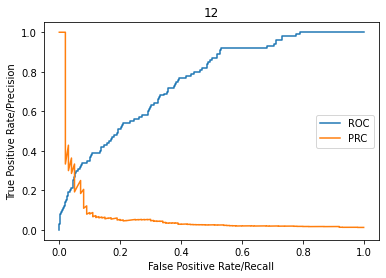

PRC AUC:0.0657636034950918
ROC AUC:0.7529777777777779


In [412]:
fpr13, tpr13, thresholds13 = roc_curve(Y_test[:,12], probs[:, 12])
prec13, recall13, thresholds13 = precision_recall_curve(Y_test[:,12], probs[:, 12])

plt.plot(fpr13,tpr13,label="ROC")
plt.plot(recall13,prec13,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('12')
plt.show()

print("PRC AUC:" + str(auc(recall13, prec13)))
print("ROC AUC:" + str(auc(fpr13, tpr13)))

In [413]:
score_true_13=[]

In [414]:
for x in range(0,iteration):
  if probs[x][12]>=0.5:
    score_true_13.append(1)
  else:
    score_true_13.append(0)

score_true_13

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [415]:
score_true_correct_index_13_LCS=[]
score_true_wrong_index_13_LCS=[]

In [416]:
for x in range(0,iteration):
  if score_true_13[x]!=Y_test[x,12]:
    score_true_wrong_index_13_LCS.append(x+1)
  else:
    score_true_correct_index_13_LCS.append(x+1)

In [417]:
correct_12=len(score_true_correct_index_13_LCS)
accuracy_13=correct_12/iteration

#### Class 13

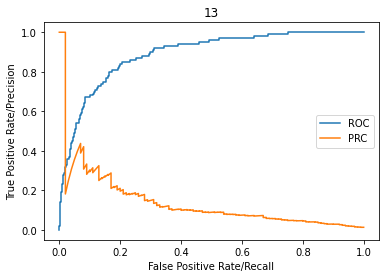

PRC AUC:0.13767751224046992
ROC AUC:0.8892646464646464


In [418]:
fpr14, tpr14, thresholds14 = roc_curve(Y_test[:,13], probs[:, 13])
prec14, recall14, thresholds14 = precision_recall_curve(Y_test[:,13], probs[:, 13])

plt.plot(fpr14,tpr14,label="ROC")
plt.plot(recall14,prec14,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('13')
plt.show()

print("PRC AUC:" + str(auc(recall14, prec14)))
print("ROC AUC:" + str(auc(fpr14, tpr14)))

In [419]:
score_true_14=[]

In [420]:
for x in range(0,iteration):
  if probs[x][13]>=0.5:
    score_true_14.append(1)
  else:
    score_true_14.append(0)

score_true_14

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [421]:
score_true_correct_index_14_LCS=[]
score_true_wrong_index_14_LCS=[]

In [422]:
for x in range(0,iteration):
  if score_true_14[x]!=Y_test[x,13]:
    score_true_wrong_index_14_LCS.append(x+1)
  else:
    score_true_correct_index_14_LCS.append(x+1)

In [423]:
correct_13=len(score_true_correct_index_14_LCS)
accuracy_14=correct_13/iteration

#### Class 14

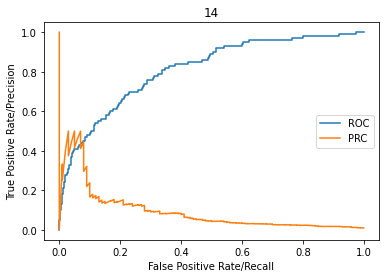

PRC AUC:0.09176627085987117
ROC AUC:0.8105121212121212


In [424]:
fpr15, tpr15, thresholds15 = roc_curve(Y_test[:,14], probs[:, 14])
prec15, recall15, thresholds15 = precision_recall_curve(Y_test[:,14], probs[:, 14])

plt.plot(fpr15,tpr15,label="ROC")
plt.plot(recall15,prec15,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('14')
plt.show()

print("PRC AUC:" + str(auc(recall15, prec15)))
print("ROC AUC:" + str(auc(fpr15, tpr15)))

In [425]:
score_true_15=[]

In [426]:
for x in range(0,iteration):
  if probs[x][14]>=0.5:
    score_true_15.append(1)
  else:
    score_true_15.append(0)

score_true_15

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [427]:
score_true_correct_index_15_LCS=[]
score_true_wrong_index_15_LCS=[]

In [428]:
for x in range(0,iteration):
  if score_true_15[x]!=Y_test[x,14]:
    score_true_wrong_index_15_LCS.append(x+1)
  else:
    score_true_correct_index_15_LCS.append(x+1)

In [429]:
correct_14=len(score_true_correct_index_15_LCS)
accuracy_15=correct_14/iteration

#### Class 15

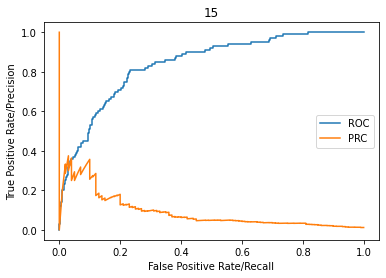

PRC AUC:0.08819007783565276
ROC AUC:0.8396272727272726


In [430]:
fpr16, tpr16, thresholds16 = roc_curve(Y_test[:,15], probs[:, 15])
prec16, recall16, thresholds16 = precision_recall_curve(Y_test[:,15], probs[:, 15])

plt.plot(fpr16,tpr16,label="ROC")
plt.plot(recall16,prec16,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('15')
plt.show()

print("PRC AUC:" + str(auc(recall16, prec16)))
print("ROC AUC:" + str(auc(fpr16, tpr16)))

In [431]:
score_true_16=[]

In [432]:
for x in range(0,iteration):
  if probs[x][15]>=0.5:
    score_true_16.append(1)
  else:
    score_true_16.append(0)

score_true_16

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [433]:
score_true_correct_index_16_LCS=[]
score_true_wrong_index_16_LCS=[]

In [434]:
for x in range(0,iteration):
  if score_true_16[x]!=Y_test[x,15]:
    score_true_wrong_index_16_LCS.append(x+1)
  else:
    score_true_correct_index_16_LCS.append(x+1)

In [435]:
correct_15=len(score_true_correct_index_16_LCS)
accuracy_16=correct_15/iteration

#### Class 16

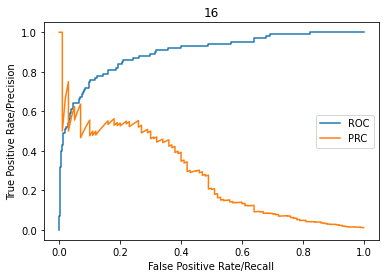

PRC AUC:0.27746079281734654
ROC AUC:0.8993141414141415


In [436]:
fpr17, tpr17, thresholds17 = roc_curve(Y_test[:,16], probs[:, 16])
prec17, recall17, thresholds17 = precision_recall_curve(Y_test[:,16], probs[:, 16])

plt.plot(fpr17,tpr17,label="ROC")
plt.plot(recall17,prec17,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('16')
plt.show()

print("PRC AUC:" + str(auc(recall17, prec17)))
print("ROC AUC:" + str(auc(fpr17, tpr17)))

In [437]:
score_true_17=[]

In [438]:
for x in range(0,iteration):
  if probs[x][16]>=0.5:
    score_true_17.append(1)
  else:
    score_true_17.append(0)

score_true_17

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [439]:
score_true_correct_index_17_LCS=[]
score_true_wrong_index_17_LCS=[]

In [440]:
for x in range(0,iteration):
  if score_true_17[x]!=Y_test[x,16]:
    score_true_wrong_index_17_LCS.append(x+1)
  else:
    score_true_correct_index_17_LCS.append(x+1)

In [441]:
correct_16=len(score_true_correct_index_17_LCS)
accuracy_17=correct_16/iteration

#### Class 17

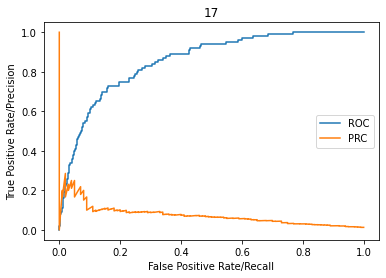

PRC AUC:0.07208665455743558
ROC AUC:0.8557000000000001


In [442]:
fpr18, tpr18, thresholds18 = roc_curve(Y_test[:,17], probs[:, 17])
prec18, recall18, thresholds18 = precision_recall_curve(Y_test[:,17], probs[:, 17])

plt.plot(fpr18,tpr18,label="ROC")
plt.plot(recall18,prec18,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('17')
plt.show()

print("PRC AUC:" + str(auc(recall18, prec18)))
print("ROC AUC:" + str(auc(fpr18, tpr18)))

In [443]:
score_true_18=[]

In [444]:
for x in range(0,iteration):
  if probs[x][17]>=0.5:
    score_true_18.append(1)
  else:
    score_true_18.append(0)

score_true_18

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [445]:
score_true_correct_index_18_LCS=[]
score_true_wrong_index_18_LCS=[]

In [446]:
for x in range(0,iteration):
  if score_true_18[x]!=Y_test[x,17]:
    score_true_wrong_index_18_LCS.append(x+1)
  else:
    score_true_correct_index_18_LCS.append(x+1)

In [447]:
correct_17=len(score_true_correct_index_18_LCS)
accuracy_18=correct_17/iteration

#### Class 18

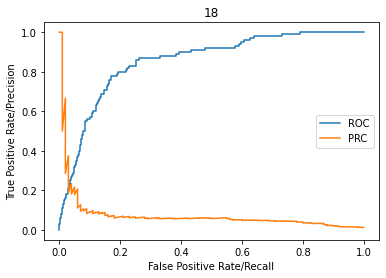

PRC AUC:0.07456762581523847
ROC AUC:0.853260606060606


In [448]:
fpr19, tpr19, thresholds19 = roc_curve(Y_test[:,18], probs[:, 18])
prec19, recall19, thresholds19 = precision_recall_curve(Y_test[:,18], probs[:, 18])

plt.plot(fpr19,tpr19,label="ROC")
plt.plot(recall19,prec19,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('18')
plt.show()

print("PRC AUC:" + str(auc(recall19, prec19)))
print("ROC AUC:" + str(auc(fpr19, tpr19)))

In [449]:
score_true_19=[]

In [450]:
for x in range(0,iteration):
  if probs[x][18]>=0.5:
    score_true_19.append(1)
  else:
    score_true_19.append(0)

score_true_19

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [451]:
score_true_correct_index_19_LCS=[]
score_true_wrong_index_19_LCS=[]

In [452]:
for x in range(0,iteration):
  if score_true_19[x]!=Y_test[x,18]:
    score_true_wrong_index_19_LCS.append(x+1)
  else:
    score_true_correct_index_19_LCS.append(x+1)

In [453]:
correct_18=len(score_true_correct_index_19_LCS)
accuracy_19=correct_18/iteration

#### Class 19

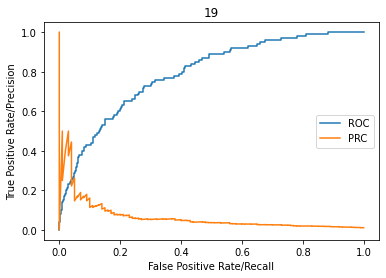

PRC AUC:0.062883775270333
ROC AUC:0.7912484848484849


In [454]:
fpr20, tpr20, thresholds20 = roc_curve(Y_test[:,19], probs[:, 19])
prec20, recall20, thresholds20 = precision_recall_curve(Y_test[:,19], probs[:, 19])

plt.plot(fpr20,tpr20,label="ROC")
plt.plot(recall20,prec20,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('19')
plt.show()

print("PRC AUC:" + str(auc(recall20, prec20)))
print("ROC AUC:" + str(auc(fpr20, tpr20)))

In [455]:
score_true_20=[]

In [456]:
for x in range(0,iteration):
  if probs[x][19]>=0.5:
    score_true_20.append(1)
  else:
    score_true_20.append(0)

score_true_20

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [457]:
score_true_correct_index_20_LCS=[]
score_true_wrong_index_20_LCS=[]

In [458]:
for x in range(0,iteration):
  if score_true_20[x]!=Y_test[x,19]:
    score_true_wrong_index_20_LCS.append(x+1)
  else:
    score_true_correct_index_20_LCS.append(x+1)

In [459]:
correct_19=len(score_true_correct_index_20_LCS)
accuracy_20=correct_19/iteration

##**20-39**

###**20-29**

#### Class 20

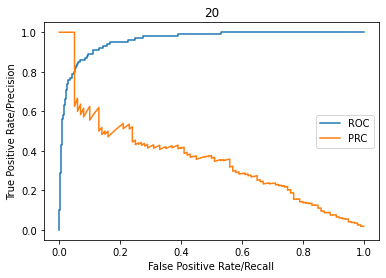

PRC AUC:0.35449461077700417
ROC AUC:0.9609828282828282


In [460]:
fpr21, tpr21, thresholds21 = roc_curve(Y_test[:,20], probs[:,20])
prec21, recall21, thresholds21 = precision_recall_curve(Y_test[:,20], probs[:,20])

plt.plot(fpr21,tpr21,label="ROC")
plt.plot(recall21,prec21,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('20')
plt.show()

print("PRC AUC:" + str(auc(recall21, prec21)))
print("ROC AUC:" + str(auc(fpr21, tpr21)))

In [461]:
score_true_21=[]

In [462]:
for x in range(0,iteration):
  if probs[x][20]>=0.5:
    score_true_21.append(1)
  else:
    score_true_21.append(0)

score_true_21

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [463]:
score_true_correct_index_21_LCS=[]
score_true_wrong_index_21_LCS=[]

In [464]:
for x in range(0,iteration):
  if score_true_21[x]!=Y_test[x,20]:
    score_true_wrong_index_21_LCS.append(x+1)
  else:
    score_true_correct_index_21_LCS.append(x+1)

In [465]:
correct_20=len(score_true_correct_index_21_LCS)
accuracy_21=correct_20/iteration

#### Class 21

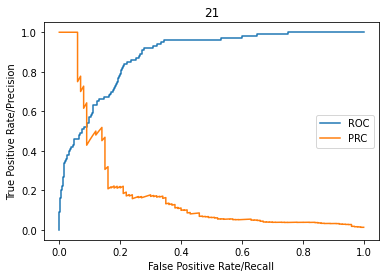

PRC AUC:0.18161455407994165
ROC AUC:0.8814555555555554


In [466]:
fpr22, tpr22, thresholds22 = roc_curve(Y_test[:,21], probs[:, 21])
prec22, recall22, thresholds22 = precision_recall_curve(Y_test[:,21], probs[:, 21])

plt.plot(fpr22,tpr22,label="ROC")
plt.plot(recall22,prec22,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('21')
plt.show()

print("PRC AUC:" + str(auc(recall22, prec22)))
print("ROC AUC:" + str(auc(fpr22, tpr22)))

In [467]:
score_true_22=[]

In [468]:
for x in range(0,iteration):
  if probs[x][21]>=0.5:
    score_true_22.append(1)
  else:
    score_true_22.append(0)

score_true_22

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [469]:
score_true_correct_index_22_LCS=[]
score_true_wrong_index_22_LCS=[]

In [470]:
for x in range(0,iteration):
  if score_true_22[x]!=Y_test[x,21]:
    score_true_wrong_index_22_LCS.append(x+1)
  else:
    score_true_correct_index_22_LCS.append(x+1)

In [471]:
correct_21=len(score_true_correct_index_22_LCS)
accuracy_22=correct_21/iteration

#### Class 22

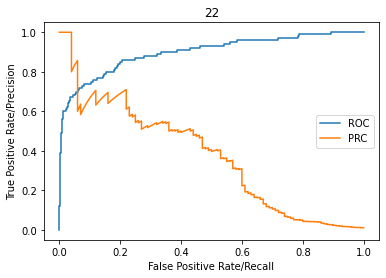

PRC AUC:0.37039676380817527
ROC AUC:0.8987898989898989


In [472]:
fpr23, tpr23, thresholds23 = roc_curve(Y_test[:,22], probs[:, 22])
prec23, recall23, thresholds23 = precision_recall_curve(Y_test[:,22], probs[:, 22])

plt.plot(fpr23,tpr23,label="ROC")
plt.plot(recall23,prec23,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('22')
plt.show()

print("PRC AUC:" + str(auc(recall23, prec23)))
print("ROC AUC:" + str(auc(fpr23, tpr23)))

In [473]:
score_true_23=[]

In [474]:
for x in range(0,iteration):
  if probs[x][22]>=0.5:
    score_true_23.append(1)
  else:
    score_true_23.append(0)

score_true_23

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [475]:
score_true_correct_index_23_LCS=[]
score_true_wrong_index_23_LCS=[]

In [476]:
for x in range(0,iteration):
  if score_true_23[x]!=Y_test[x,22]:
    score_true_wrong_index_23_LCS.append(x+1)
  else:
    score_true_correct_index_23_LCS.append(x+1)

In [477]:
correct_22=len(score_true_correct_index_23_LCS)
accuracy_23=correct_22/iteration

#### Class 23

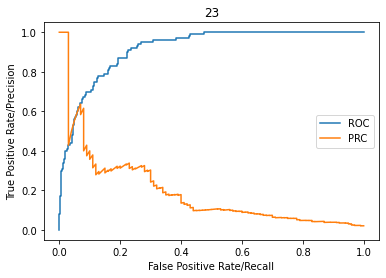

PRC AUC:0.1906535347272155
ROC AUC:0.917050505050505


In [478]:
fpr24, tpr24, thresholds24 = roc_curve(Y_test[:,23], probs[:, 23])
prec24, recall24, thresholds24 = precision_recall_curve(Y_test[:,23], probs[:, 23])

plt.plot(fpr24,tpr24,label="ROC")
plt.plot(recall24,prec24,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('23')
plt.show()

print("PRC AUC:" + str(auc(recall24, prec24)))
print("ROC AUC:" + str(auc(fpr24, tpr24)))

In [479]:
score_true_24=[]

In [480]:
for x in range(0,iteration):
  if probs[x][23]>=0.5:
    score_true_24.append(1)
  else:
    score_true_24.append(0)

score_true_24

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [481]:
score_true_correct_index_24_LCS=[]
score_true_wrong_index_24_LCS=[]

In [482]:
for x in range(0,iteration):
  if score_true_24[x]!=Y_test[x,23]:
    score_true_wrong_index_24_LCS.append(x+1)
  else:
    score_true_correct_index_24_LCS.append(x+1)

In [483]:
correct_23=len(score_true_correct_index_24_LCS)
accuracy_24=correct_23/iteration

#### Class 24

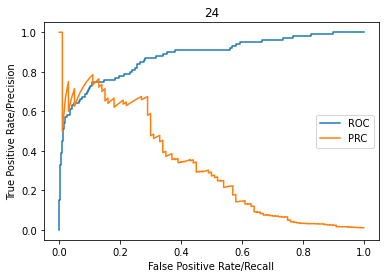

PRC AUC:0.3203580381526729
ROC AUC:0.8809616161616162


In [484]:
fpr25, tpr25, thresholds25 = roc_curve(Y_test[:,24], probs[:, 24])
prec25, recall25, thresholds25 = precision_recall_curve(Y_test[:,24], probs[:, 24])

plt.plot(fpr25,tpr25,label="ROC")
plt.plot(recall25,prec25,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('24')
plt.show()

print("PRC AUC:" + str(auc(recall25, prec25)))
print("ROC AUC:" + str(auc(fpr25, tpr25)))

In [485]:
score_true_25=[]

In [486]:
for x in range(0,iteration):
  if probs[x][24]>=0.5:
    score_true_25.append(1)
  else:
    score_true_25.append(0)

score_true_25

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [487]:
score_true_correct_index_25_LCS=[]
score_true_wrong_index_25_LCS=[]

In [488]:
for x in range(0,iteration):
  if score_true_25[x]!=Y_test[x,24]:
    score_true_wrong_index_25_LCS.append(x+1)
  else:
    score_true_correct_index_25_LCS.append(x+1)

In [489]:
correct_24=len(score_true_correct_index_25_LCS)
accuracy_25=correct_24/iteration

#### Class 25

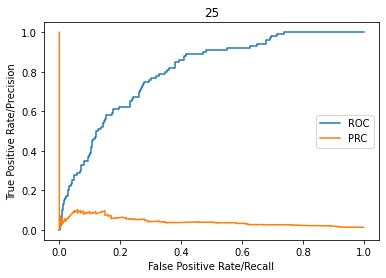

PRC AUC:0.040830460067202264
ROC AUC:0.8005707070707071


In [490]:
fpr26, tpr26, thresholds26 = roc_curve(Y_test[:,25], probs[:, 25])
prec26, recall26, thresholds26 = precision_recall_curve(Y_test[:,25], probs[:, 25])

plt.plot(fpr26,tpr26,label="ROC")
plt.plot(recall26,prec26,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('25')
plt.show()

print("PRC AUC:" + str(auc(recall26, prec26)))
print("ROC AUC:" + str(auc(fpr26, tpr26)))

In [491]:
score_true_26=[]

In [492]:
for x in range(0,iteration):
  if probs[x][25]>=0.5:
    score_true_26.append(1)
  else:
    score_true_26.append(0)

score_true_26

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [493]:
score_true_correct_index_26_LCS=[]
score_true_wrong_index_26_LCS=[]

In [494]:
for x in range(0,iteration):
  if score_true_26[x]!=Y_test[x,25]:
    score_true_wrong_index_26_LCS.append(x+1)
  else:
    score_true_correct_index_26_LCS.append(x+1)

In [495]:
correct_25=len(score_true_correct_index_26_LCS)
accuracy_26=correct_25/iteration

#### Class 26

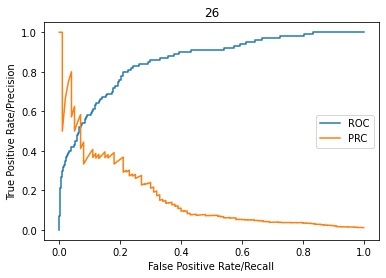

PRC AUC:0.16597570320355864
ROC AUC:0.8557696969696971


In [496]:
fpr27, tpr27, thresholds27 = roc_curve(Y_test[:,26], probs[:, 26])
prec27, recall27, thresholds27 = precision_recall_curve(Y_test[:,26], probs[:, 26])

plt.plot(fpr27,tpr27,label="ROC")
plt.plot(recall27,prec27,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('26')
plt.show()

print("PRC AUC:" + str(auc(recall27, prec27)))
print("ROC AUC:" + str(auc(fpr27, tpr27)))

In [497]:
score_true_27=[]

In [498]:
for x in range(0,iteration):
  if probs[x][26]>=0.5:
    score_true_27.append(1)
  else:
    score_true_27.append(0)

score_true_27

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [499]:
score_true_correct_index_27_LCS=[]
score_true_wrong_index_27_LCS=[]

In [500]:
for x in range(0,iteration):
  if score_true_27[x]!=Y_test[x,26]:
    score_true_wrong_index_27_LCS.append(x+1)
  else:
    score_true_correct_index_27_LCS.append(x+1)

In [501]:
correct_26=len(score_true_correct_index_27_LCS)
accuracy_27=correct_26/iteration

#### Class 27

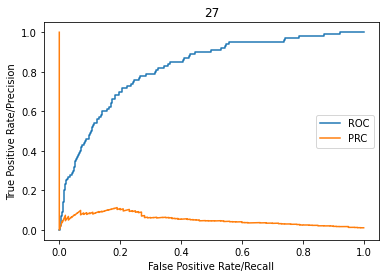

PRC AUC:0.05085820695222358
ROC AUC:0.8204767676767676


In [502]:
fpr28, tpr28, thresholds28 = roc_curve(Y_test[:,27], probs[:, 27])
prec28, recall28, thresholds28 = precision_recall_curve(Y_test[:,27], probs[:, 27])

plt.plot(fpr28,tpr28,label="ROC")
plt.plot(recall28,prec28,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('27')
plt.show()

print("PRC AUC:" + str(auc(recall28, prec28)))
print("ROC AUC:" + str(auc(fpr28, tpr28)))

In [503]:
score_true_28=[]

In [504]:
for x in range(0,iteration):
  if probs[x][27]>=0.5:
    score_true_28.append(1)
  else:
    score_true_28.append(0)

score_true_28

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [505]:
score_true_correct_index_28_LCS=[]
score_true_wrong_index_28_LCS=[]

In [506]:
for x in range(0,iteration):
  if score_true_28[x]!=Y_test[x,27]:
    score_true_wrong_index_28_LCS.append(x+1)
  else:
    score_true_correct_index_28_LCS.append(x+1)

In [507]:
correct_27=len(score_true_correct_index_28_LCS)
accuracy_28=correct_27/iteration

#### Class 28

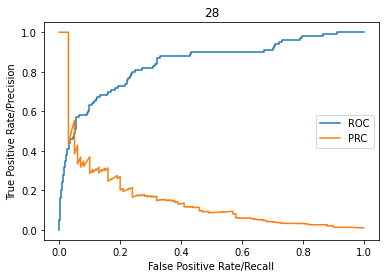

PRC AUC:0.15169736182547136
ROC AUC:0.8436161616161617


In [508]:
fpr29, tpr29, thresholds29 = roc_curve(Y_test[:,28], probs[:, 28])
prec29, recall29, thresholds29 = precision_recall_curve(Y_test[:,28], probs[:, 28])

plt.plot(fpr29,tpr29,label="ROC")
plt.plot(recall29,prec29,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('28')
plt.show()

print("PRC AUC:" + str(auc(recall29, prec29)))
print("ROC AUC:" + str(auc(fpr29, tpr29)))

In [509]:
score_true_29=[]

In [510]:
for x in range(0,iteration):
  if probs[x][28]>=0.5:
    score_true_29.append(1)
  else:
    score_true_29.append(0)

score_true_29

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [511]:
score_true_correct_index_29_LCS=[]
score_true_wrong_index_29_LCS=[]

In [512]:
for x in range(0,iteration):
  if score_true_29[x]!=Y_test[x,28]:
    score_true_wrong_index_29_LCS.append(x+1)
  else:
    score_true_correct_index_29_LCS.append(x+1)

In [513]:
correct_28=len(score_true_correct_index_29_LCS)
accuracy_29=correct_28/iteration

#### Class 29

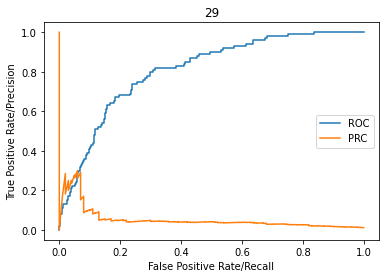

PRC AUC:0.05175953607527138
ROC AUC:0.8078464646464647


In [514]:
fpr30, tpr30, thresholds30 = roc_curve(Y_test[:,29], probs[:, 29])
prec30, recall30, thresholds30 = precision_recall_curve(Y_test[:,29], probs[:, 29])

plt.plot(fpr30,tpr30,label="ROC")
plt.plot(recall30,prec30,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('29')
plt.show()

print("PRC AUC:" + str(auc(recall30, prec30)))
print("ROC AUC:" + str(auc(fpr30, tpr30)))

In [515]:
score_true_30=[]

In [516]:
for x in range(0,iteration):
  if probs[x][29]>=0.5:
    score_true_30.append(1)
  else:
    score_true_30.append(0)

score_true_30

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [517]:
score_true_correct_index_30_LCS=[]
score_true_wrong_index_30_LCS=[]

In [518]:
for x in range(0,iteration):
  if score_true_30[x]!=Y_test[x,29]:
    score_true_wrong_index_30_LCS.append(x+1)
  else:
    score_true_correct_index_30_LCS.append(x+1)

In [519]:
correct_29=len(score_true_correct_index_30_LCS)
accuracy_30=correct_29/iteration

###**30-39**

#### Class 30

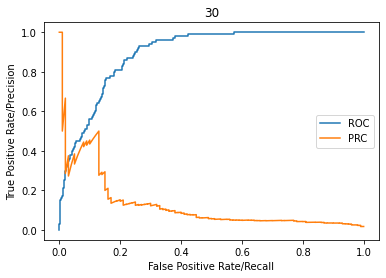

PRC AUC:0.12607956973216614
ROC AUC:0.893190909090909


In [520]:
fpr31, tpr31, thresholds31 = roc_curve(Y_test[:,30], probs[:,30])
prec31, recall31, thresholds31 = precision_recall_curve(Y_test[:,30], probs[:,30])

plt.plot(fpr31,tpr31,label="ROC")
plt.plot(recall31,prec31,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('30')
plt.show()

print("PRC AUC:" + str(auc(recall31, prec31)))
print("ROC AUC:" + str(auc(fpr31, tpr31)))

In [521]:
score_true_31=[]

In [522]:
for x in range(0,iteration):
  if probs[x][30]>=0.5:
    score_true_31.append(1)
  else:
    score_true_31.append(0)

score_true_31

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [523]:
score_true_correct_index_31_LCS=[]
score_true_wrong_index_31_LCS=[]

In [524]:
for x in range(0,iteration):
  if score_true_31[x]!=Y_test[x,30]:
    score_true_wrong_index_31_LCS.append(x+1)
  else:
    score_true_correct_index_31_LCS.append(x+1)

In [525]:
correct_30=len(score_true_correct_index_31_LCS)
accuracy_31=correct_30/iteration

#### Class 31

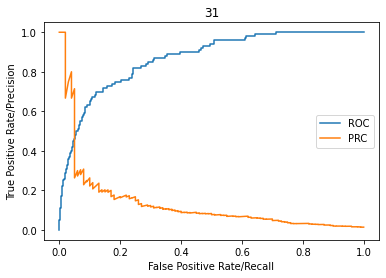

PRC AUC:0.13046738778517394
ROC AUC:0.8675383838383839


In [526]:
fpr32, tpr32, thresholds32 = roc_curve(Y_test[:,31], probs[:, 31])
prec32, recall32, thresholds32 = precision_recall_curve(Y_test[:,31], probs[:, 31])

plt.plot(fpr32,tpr32,label="ROC")
plt.plot(recall32,prec32,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('31')
plt.show()

print("PRC AUC:" + str(auc(recall32, prec32)))
print("ROC AUC:" + str(auc(fpr32, tpr32)))

In [527]:
score_true_32=[]

In [528]:
for x in range(0,iteration):
  if probs[x][31]>=0.5:
    score_true_32.append(1)
  else:
    score_true_32.append(0)

score_true_32

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [529]:
score_true_correct_index_32_LCS=[]
score_true_wrong_index_32_LCS=[]

In [530]:
for x in range(0,iteration):
  if score_true_32[x]!=Y_test[x,31]:
    score_true_wrong_index_32_LCS.append(x+1)
  else:
    score_true_correct_index_32_LCS.append(x+1)

In [531]:
correct_31=len(score_true_correct_index_32_LCS)
accuracy_32=correct_31/iteration

#### Class 32

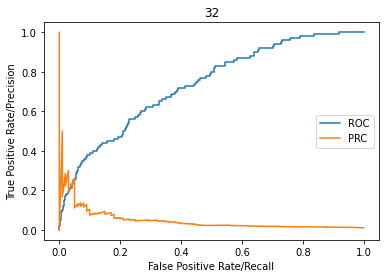

PRC AUC:0.04642675870451702
ROC AUC:0.7346020202020201


In [532]:
fpr33, tpr33, thresholds33 = roc_curve(Y_test[:,32], probs[:, 32])
prec33, recall33, thresholds33 = precision_recall_curve(Y_test[:,32], probs[:, 32])

plt.plot(fpr33,tpr33,label="ROC")
plt.plot(recall33,prec33,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('32')
plt.show()

print("PRC AUC:" + str(auc(recall33, prec33)))
print("ROC AUC:" + str(auc(fpr33, tpr33)))

In [533]:
score_true_33=[]

In [534]:
for x in range(0,iteration):
  if probs[x][32]>=0.5:
    score_true_33.append(1)
  else:
    score_true_33.append(0)

score_true_33

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [535]:
score_true_correct_index_33_LCS=[]
score_true_wrong_index_33_LCS=[]

In [536]:
for x in range(0,iteration):
  if score_true_33[x]!=Y_test[x,32]:
    score_true_wrong_index_33_LCS.append(x+1)
  else:
    score_true_correct_index_33_LCS.append(x+1)

In [537]:
correct_32=len(score_true_correct_index_33_LCS)
accuracy_33=correct_32/iteration

#### Class 33

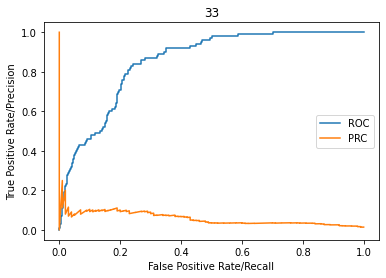

PRC AUC:0.056941479454600485
ROC AUC:0.8518868686868686


In [538]:
fpr34, tpr34, thresholds34 = roc_curve(Y_test[:,33], probs[:, 33])
prec34, recall34, thresholds34 = precision_recall_curve(Y_test[:,33], probs[:, 33])

plt.plot(fpr34,tpr34,label="ROC")
plt.plot(recall34,prec34,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('33')
plt.show()

print("PRC AUC:" + str(auc(recall34, prec34)))
print("ROC AUC:" + str(auc(fpr34, tpr34)))

In [539]:
score_true_34=[]

In [540]:
for x in range(0,iteration):
  if probs[x][33]>=0.5:
    score_true_34.append(1)
  else:
    score_true_34.append(0)

score_true_34

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [541]:
score_true_correct_index_34_LCS=[]
score_true_wrong_index_34_LCS=[]

In [542]:
for x in range(0,iteration):
  if score_true_34[x]!=Y_test[x,33]:
    score_true_wrong_index_34_LCS.append(x+1)
  else:
    score_true_correct_index_34_LCS.append(x+1)

In [543]:
correct_33=len(score_true_correct_index_34_LCS)
accuracy_34=correct_33/iteration

#### Class 34

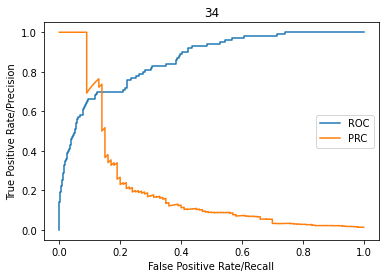

PRC AUC:0.21511171207104224
ROC AUC:0.8624878787878788


In [544]:
fpr35, tpr35, thresholds35 = roc_curve(Y_test[:,34], probs[:, 34])
prec35, recall35, thresholds35 = precision_recall_curve(Y_test[:,34], probs[:, 34])

plt.plot(fpr35,tpr35,label="ROC")
plt.plot(recall35,prec35,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('34')
plt.show()

print("PRC AUC:" + str(auc(recall35, prec35)))
print("ROC AUC:" + str(auc(fpr35, tpr35)))

In [545]:
score_true_35=[]

In [546]:
for x in range(0,iteration):
  if probs[x][34]>=0.5:
    score_true_35.append(1)
  else:
    score_true_35.append(0)

score_true_35

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [547]:
score_true_correct_index_35_LCS=[]
score_true_wrong_index_35_LCS=[]

In [548]:
for x in range(0,iteration):
  if score_true_35[x]!=Y_test[x,34]:
    score_true_wrong_index_35_LCS.append(x+1)
  else:
    score_true_correct_index_35_LCS.append(x+1)

In [549]:
correct_34=len(score_true_correct_index_35_LCS)
accuracy_35=correct_34/iteration

#### Class 35

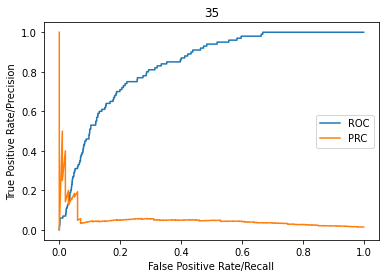

PRC AUC:0.049434156005961835
ROC AUC:0.832078282828283


In [550]:
fpr36, tpr36, thresholds36 = roc_curve(Y_test[:,35], probs[:, 35])
prec36, recall36, thresholds36 = precision_recall_curve(Y_test[:,35], probs[:, 35])

plt.plot(fpr36,tpr36,label="ROC")
plt.plot(recall36,prec36,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('35')
plt.show()

print("PRC AUC:" + str(auc(recall36, prec36)))
print("ROC AUC:" + str(auc(fpr36, tpr36)))

In [551]:
score_true_36=[]

In [552]:
for x in range(0,iteration):
  if probs[x][35]>=0.5:
    score_true_36.append(1)
  else:
    score_true_36.append(0)

score_true_36

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [553]:
score_true_correct_index_36_LCS=[]
score_true_wrong_index_36_LCS=[]

In [554]:
for x in range(0,iteration):
  if score_true_36[x]!=Y_test[x,35]:
    score_true_wrong_index_36_LCS.append(x+1)
  else:
    score_true_correct_index_36_LCS.append(x+1)

In [555]:
correct_35=len(score_true_correct_index_36_LCS)
accuracy_36=correct_35/iteration

#### Class 36

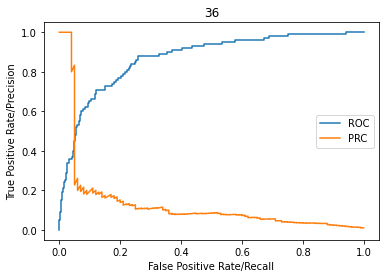

PRC AUC:0.12916660082462791
ROC AUC:0.8695292929292928


In [556]:
fpr37, tpr37, thresholds37 = roc_curve(Y_test[:,36], probs[:, 36])
prec37, recall37, thresholds37 = precision_recall_curve(Y_test[:,36], probs[:, 36])

plt.plot(fpr37,tpr37,label="ROC")
plt.plot(recall37,prec37,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('36')
plt.show()

print("PRC AUC:" + str(auc(recall37, prec37)))
print("ROC AUC:" + str(auc(fpr37, tpr37)))

In [557]:
score_true_37=[]

In [558]:
for x in range(0,iteration):
  if probs[x][36]>=0.5:
    score_true_37.append(1)
  else:
    score_true_37.append(0)

score_true_37

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [559]:
score_true_correct_index_37_LCS=[]
score_true_wrong_index_37_LCS=[]

In [560]:
for x in range(0,iteration):
  if score_true_37[x]!=Y_test[x,36]:
    score_true_wrong_index_37_LCS.append(x+1)
  else:
    score_true_correct_index_37_LCS.append(x+1)

In [561]:
correct_36=len(score_true_correct_index_37_LCS)
accuracy_37=correct_36/iteration

#### Class 37

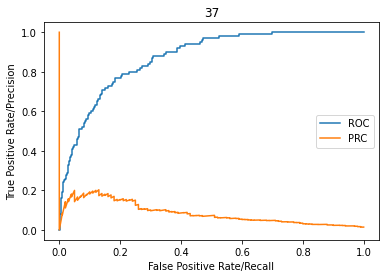

PRC AUC:0.08237894970808861
ROC AUC:0.8710020202020201


In [562]:
fpr38, tpr38, thresholds38 = roc_curve(Y_test[:,37], probs[:, 37])
prec38, recall38, thresholds38 = precision_recall_curve(Y_test[:,37], probs[:,37])

plt.plot(fpr38,tpr38,label="ROC")
plt.plot(recall38,prec38,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('37')
plt.show()

print("PRC AUC:" + str(auc(recall38, prec38)))
print("ROC AUC:" + str(auc(fpr38, tpr38)))

In [563]:
score_true_38=[]

In [564]:
for x in range(0,iteration):
  if probs[x][37]>=0.5:
    score_true_38.append(1)
  else:
    score_true_38.append(0)

score_true_38

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [565]:
score_true_correct_index_38_LCS=[]
score_true_wrong_index_38_LCS=[]

In [566]:
for x in range(0,iteration):
  if score_true_38[x]!=Y_test[x,37]:
    score_true_wrong_index_38_LCS.append(x+1)
  else:
    score_true_correct_index_38_LCS.append(x+1)

In [567]:
correct_37=len(score_true_correct_index_38_LCS)
accuracy_38=correct_37/iteration

#### Class 38

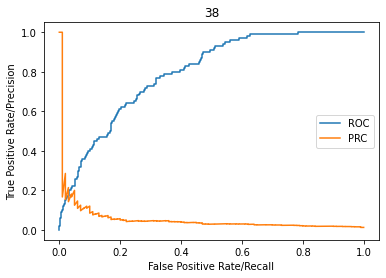

PRC AUC:0.05436388325379197
ROC AUC:0.7962424242424243


In [568]:
fpr39, tpr39, thresholds39 = roc_curve(Y_test[:,38], probs[:, 38])
prec39, recall39, thresholds39 = precision_recall_curve(Y_test[:,38], probs[:, 38])

plt.plot(fpr39,tpr39,label="ROC")
plt.plot(recall39,prec39,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('38')
plt.show()

print("PRC AUC:" + str(auc(recall39, prec39)))
print("ROC AUC:" + str(auc(fpr39, tpr39)))

In [569]:
score_true_39=[]

In [570]:
for x in range(0,iteration):
  if probs[x][38]>=0.5:
    score_true_39.append(1)
  else:
    score_true_39.append(0)

score_true_39

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [571]:
score_true_correct_index_39_LCS=[]
score_true_wrong_index_39_LCS=[]

In [572]:
for x in range(0,iteration):
  if score_true_39[x]!=Y_test[x,38]:
    score_true_wrong_index_39_LCS.append(x+1)
  else:
    score_true_correct_index_39_LCS.append(x+1)

In [573]:
correct_38=len(score_true_correct_index_39_LCS)
accuracy_39=correct_38/iteration

#### Class 39

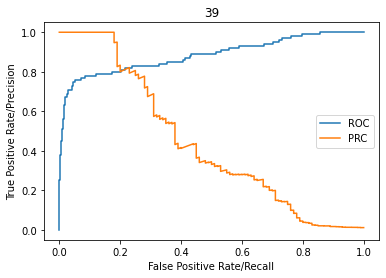

PRC AUC:0.4393649942994434
ROC AUC:0.8839696969696971


In [574]:
fpr40, tpr40, thresholds40 = roc_curve(Y_test[:,39], probs[:,39])
prec40, recall40, thresholds40 = precision_recall_curve(Y_test[:,39], probs[:, 39])

plt.plot(fpr40,tpr40,label="ROC")
plt.plot(recall40,prec40,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('39')
plt.show()

print("PRC AUC:" + str(auc(recall40, prec40)))
print("ROC AUC:" + str(auc(fpr40, tpr40)))

In [575]:
score_true_40=[]

In [576]:
for x in range(0,iteration):
  if probs[x][39]>=0.5:
    score_true_40.append(1)
  else:
    score_true_40.append(0)

score_true_40

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [577]:
score_true_correct_index_40_LCS=[]
score_true_wrong_index_40_LCS=[]

In [578]:
for x in range(0,iteration):
  if score_true_40[x]!=Y_test[x,39]:
    score_true_wrong_index_40_LCS.append(x+1)
  else:
    score_true_correct_index_40_LCS.append(x+1)

In [579]:
correct_39=len(score_true_correct_index_40_LCS)
accuracy_40=correct_39/iteration

##**40-59**

###**40-49**

#### Class 40

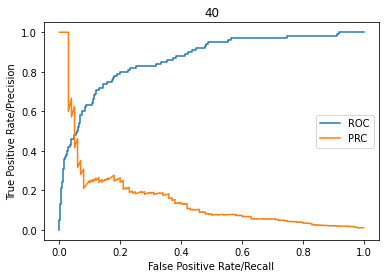

PRC AUC:0.1523792857539954
ROC AUC:0.8657020202020203


In [580]:
fpr41, tpr41, thresholds41 = roc_curve(Y_test[:,40], probs[:,40])
prec41, recall41, thresholds41 = precision_recall_curve(Y_test[:,40], probs[:,40])

plt.plot(fpr41,tpr41,label="ROC")
plt.plot(recall41,prec41,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('40')
plt.show()

print("PRC AUC:" + str(auc(recall41, prec41)))
print("ROC AUC:" + str(auc(fpr41, tpr41)))

In [581]:
score_true_41=[]

In [582]:
for x in range(0,iteration):
  if probs[x][40]>=0.5:
    score_true_41.append(1)
  else:
    score_true_41.append(0)

score_true_41

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [583]:
score_true_correct_index_41_LCS=[]
score_true_wrong_index_41_LCS=[]

In [584]:
for x in range(0,iteration):
  if score_true_41[x]!=Y_test[x,40]:
    score_true_wrong_index_41_LCS.append(x+1)
  else:
    score_true_correct_index_41_LCS.append(x+1)

In [585]:
correct_40=len(score_true_correct_index_41_LCS)
accuracy_41=correct_40/iteration

#### Class 41

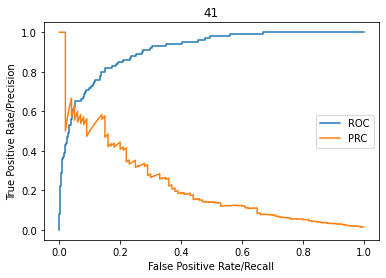

PRC AUC:0.2243669245454446
ROC AUC:0.9103050505050505


In [586]:
fpr42, tpr42, thresholds42 = roc_curve(Y_test[:,41], probs[:, 41])
prec42, recall42, thresholds42 = precision_recall_curve(Y_test[:,41], probs[:, 41])

plt.plot(fpr42,tpr42,label="ROC")
plt.plot(recall42,prec42,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('41')
plt.show()

print("PRC AUC:" + str(auc(recall42, prec42)))
print("ROC AUC:" + str(auc(fpr42, tpr42)))

In [587]:
score_true_42=[]

In [588]:
for x in range(0,iteration):
  if probs[x][41]>=0.5:
    score_true_42.append(1)
  else:
    score_true_42.append(0)

score_true_42

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [589]:
score_true_correct_index_42_LCS=[]
score_true_wrong_index_42_LCS=[]

In [590]:
for x in range(0,iteration):
  if score_true_42[x]!=Y_test[x,41]:
    score_true_wrong_index_42_LCS.append(x+1)
  else:
    score_true_correct_index_42_LCS.append(x+1)

In [591]:
correct_41=len(score_true_correct_index_42_LCS)
accuracy_42=correct_41/iteration

#### Class 42

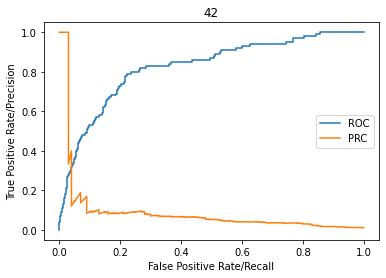

PRC AUC:0.0885958651617647
ROC AUC:0.8235818181818183


In [592]:
fpr43, tpr43, thresholds43 = roc_curve(Y_test[:,42], probs[:, 42])
prec43, recall43, thresholds43 = precision_recall_curve(Y_test[:,42], probs[:,42])

plt.plot(fpr43,tpr43,label="ROC")
plt.plot(recall43,prec43,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('42')
plt.show()

print("PRC AUC:" + str(auc(recall43, prec43)))
print("ROC AUC:" + str(auc(fpr43, tpr43)))

In [593]:
score_true_43=[]

In [594]:
for x in range(0,iteration):
  if probs[x][42]>=0.5:
    score_true_43.append(1)
  else:
    score_true_43.append(0)

score_true_43

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [595]:
score_true_correct_index_43_LCS=[]
score_true_wrong_index_43_LCS=[]

In [596]:
for x in range(0,iteration):
  if score_true_43[x]!=Y_test[x,42]:
    score_true_wrong_index_43_LCS.append(x+1)
  else:
    score_true_correct_index_43_LCS.append(x+1)

In [597]:
correct_42=len(score_true_correct_index_43_LCS)
accuracy_43=correct_42/iteration

#### Class 43

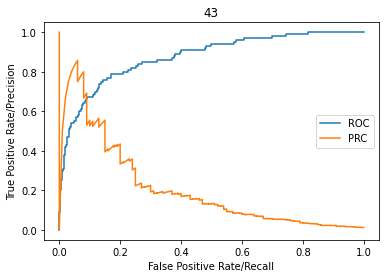

PRC AUC:0.20454155531349064
ROC AUC:0.8762414141414141


In [598]:
fpr44, tpr44, thresholds44 = roc_curve(Y_test[:,43], probs[:,43])
prec44, recall44, thresholds24 = precision_recall_curve(Y_test[:,43], probs[:,43])

plt.plot(fpr44,tpr44,label="ROC")
plt.plot(recall44,prec44,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('43')
plt.show()

print("PRC AUC:" + str(auc(recall44, prec44)))
print("ROC AUC:" + str(auc(fpr44, tpr44)))

In [599]:
score_true_44=[]

In [600]:
for x in range(0,iteration):
  if probs[x][43]>=0.5:
    score_true_44.append(1)
  else:
    score_true_44.append(0)

score_true_44

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [601]:
score_true_correct_index_44_LCS=[]
score_true_wrong_index_44_LCS=[]

In [602]:
for x in range(0,iteration):
  if score_true_44[x]!=Y_test[x,43]:
    score_true_wrong_index_44_LCS.append(x+1)
  else:
    score_true_correct_index_44_LCS.append(x+1)

In [603]:
correct_43=len(score_true_correct_index_44_LCS)
accuracy_44=correct_43/iteration

#### Class 44

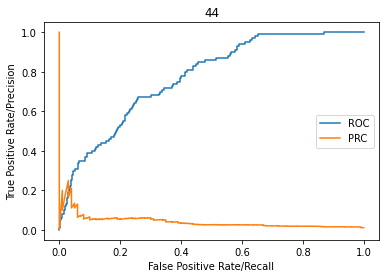

PRC AUC:0.04066887296237069
ROC AUC:0.7713080808080808


In [604]:
fpr45, tpr45, thresholds45 = roc_curve(Y_test[:,44], probs[:, 44])
prec45, recall45, thresholds45 = precision_recall_curve(Y_test[:,44], probs[:,44])

plt.plot(fpr45,tpr45,label="ROC")
plt.plot(recall45,prec45,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('44')
plt.show()

print("PRC AUC:" + str(auc(recall45, prec45)))
print("ROC AUC:" + str(auc(fpr45, tpr45)))

In [605]:
score_true_45=[]

In [606]:
for x in range(0,iteration):
  if probs[x][44]>=0.5:
    score_true_45.append(1)
  else:
    score_true_45.append(0)

score_true_45

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [607]:
score_true_correct_index_45_LCS=[]
score_true_wrong_index_45_LCS=[]

In [608]:
for x in range(0,iteration):
  if score_true_45[x]!=Y_test[x,44]:
    score_true_wrong_index_45_LCS.append(x+1)
  else:
    score_true_correct_index_45_LCS.append(x+1)

In [609]:
correct_44=len(score_true_correct_index_45_LCS)
accuracy_45=correct_44/iteration

#### Class 45

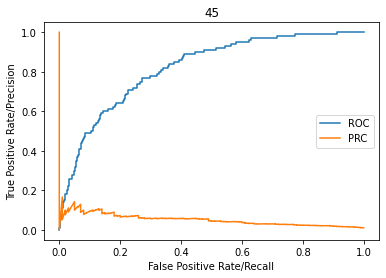

PRC AUC:0.0504508734837474
ROC AUC:0.819078787878788


In [610]:
fpr46, tpr46, thresholds46 = roc_curve(Y_test[:,45], probs[:, 45])
prec46, recall46, thresholds46 = precision_recall_curve(Y_test[:,45], probs[:, 45])

plt.plot(fpr46,tpr46,label="ROC")
plt.plot(recall46,prec46,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('45')
plt.show()

print("PRC AUC:" + str(auc(recall46, prec46)))
print("ROC AUC:" + str(auc(fpr46, tpr46)))

In [611]:
score_true_46=[]

In [612]:
for x in range(0,iteration):
  if probs[x][45]>=0.5:
    score_true_46.append(1)
  else:
    score_true_46.append(0)

score_true_46

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [613]:
score_true_correct_index_46_LCS=[]
score_true_wrong_index_46_LCS=[]

In [614]:
for x in range(0,iteration):
  if score_true_46[x]!=Y_test[x,45]:
    score_true_wrong_index_46_LCS.append(x+1)
  else:
    score_true_correct_index_46_LCS.append(x+1)

In [615]:
correct_45=len(score_true_correct_index_46_LCS)
accuracy_46=correct_45/iteration

#### Class 46

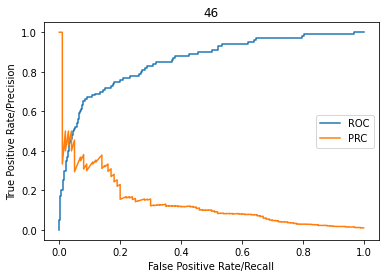

PRC AUC:0.13727677276761394
ROC AUC:0.8565828282828283


In [616]:
fpr47, tpr47, thresholds47 = roc_curve(Y_test[:,46], probs[:, 46])
prec47, recall47, thresholds47 = precision_recall_curve(Y_test[:,46], probs[:, 46])

plt.plot(fpr47,tpr47,label="ROC")
plt.plot(recall47,prec47,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('46')
plt.show()

print("PRC AUC:" + str(auc(recall47, prec47)))
print("ROC AUC:" + str(auc(fpr47, tpr47)))

In [617]:
score_true_47=[]

In [618]:
for x in range(0,iteration):
  if probs[x][46]>=0.5:
    score_true_47.append(1)
  else:
    score_true_47.append(0)

score_true_47

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [619]:
score_true_correct_index_47_LCS=[]
score_true_wrong_index_47_LCS=[]

In [620]:
for x in range(0,iteration):
  if score_true_47[x]!=Y_test[x,46]:
    score_true_wrong_index_47_LCS.append(x+1)
  else:
    score_true_correct_index_47_LCS.append(x+1)

In [621]:
correct_46=len(score_true_correct_index_47_LCS)
accuracy_47=correct_46/iteration

#### Class 47

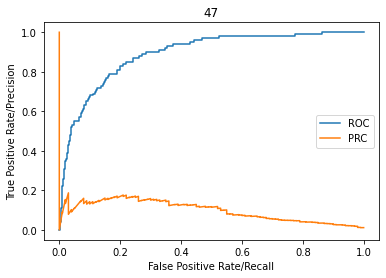

PRC AUC:0.09621291234307859
ROC AUC:0.8897656565656565


In [622]:
fpr48, tpr48, thresholds48 = roc_curve(Y_test[:,47], probs[:, 47])
prec48, recall48, thresholds48 = precision_recall_curve(Y_test[:,47], probs[:, 47])

plt.plot(fpr48,tpr48,label="ROC")
plt.plot(recall48,prec48,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('47')
plt.show()

print("PRC AUC:" + str(auc(recall48, prec48)))
print("ROC AUC:" + str(auc(fpr48, tpr48)))

In [623]:
score_true_48=[]

In [624]:
for x in range(0,iteration):
  if probs[x][47]>=0.5:
    score_true_48.append(1)
  else:
    score_true_48.append(0)

score_true_48

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [625]:
score_true_correct_index_48_LCS=[]
score_true_wrong_index_48_LCS=[]

In [626]:
for x in range(0,iteration):
  if score_true_48[x]!=Y_test[x,47]:
    score_true_wrong_index_48_LCS.append(x+1)
  else:
    score_true_correct_index_48_LCS.append(x+1)

In [627]:
correct_47=len(score_true_correct_index_48_LCS)
accuracy_48=correct_47/iteration

#### Class 48

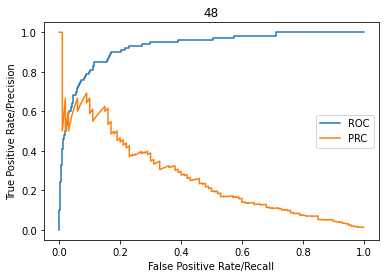

PRC AUC:0.2665547063455042
ROC AUC:0.9280747474747474


In [628]:
fpr49, tpr49, thresholds49 = roc_curve(Y_test[:,48], probs[:,48])
prec49, recall49, thresholds49 = precision_recall_curve(Y_test[:,48], probs[:,48])

plt.plot(fpr49,tpr49,label="ROC")
plt.plot(recall49,prec49,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('48')
plt.show()

print("PRC AUC:" + str(auc(recall49, prec49)))
print("ROC AUC:" + str(auc(fpr49, tpr49)))

In [629]:
score_true_49=[]

In [630]:
for x in range(0,iteration):
  if probs[x][48]>=0.5:
    score_true_49.append(1)
  else:
    score_true_49.append(0)

score_true_49

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [631]:
score_true_correct_index_49_LCS=[]
score_true_wrong_index_49_LCS=[]

In [632]:
for x in range(0,iteration):
  if score_true_49[x]!=Y_test[x,48]:
    score_true_wrong_index_49_LCS.append(x+1)
  else:
    score_true_correct_index_49_LCS.append(x+1)

In [633]:
correct_48=len(score_true_correct_index_49_LCS)
accuracy_49=correct_48/iteration

#### Class 49

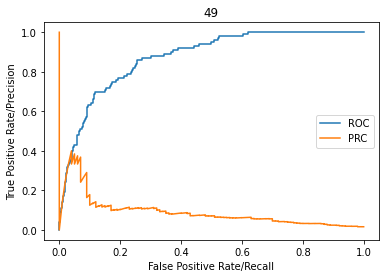

PRC AUC:0.08753711998214435
ROC AUC:0.8727030303030302


In [634]:
fpr50, tpr50, thresholds50 = roc_curve(Y_test[:,49], probs[:,49])
prec50, recall50, thresholds50 = precision_recall_curve(Y_test[:,49], probs[:,49])

plt.plot(fpr50,tpr50,label="ROC")
plt.plot(recall50,prec50,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('49')
plt.show()

print("PRC AUC:" + str(auc(recall50, prec50)))
print("ROC AUC:" + str(auc(fpr50, tpr50)))

In [635]:
score_true_50=[]

In [636]:
for x in range(0,iteration):
  if probs[x][49]>=0.5:
    score_true_50.append(1)
  else:
    score_true_50.append(0)

score_true_50

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [637]:
score_true_correct_index_50_LCS=[]
score_true_wrong_index_50_LCS=[]

In [638]:
for x in range(0,iteration):
  if score_true_50[x]!=Y_test[x,49]:
    score_true_wrong_index_50_LCS.append(x+1)
  else:
    score_true_correct_index_50_LCS.append(x+1)

In [639]:
correct_49=len(score_true_correct_index_50_LCS)
accuracy_50=correct_49/iteration

###**50-59**

#### Class 50

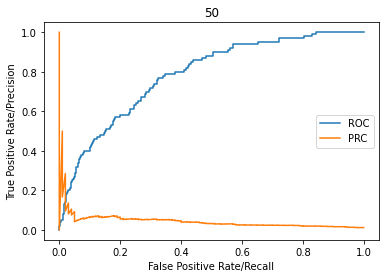

PRC AUC:0.0422890714471521
ROC AUC:0.7833707070707071


In [640]:
fpr51, tpr51, thresholds51 = roc_curve(Y_test[:,50], probs[:,50])
prec51, recall51, thresholds51 = precision_recall_curve(Y_test[:,50], probs[:,50])

plt.plot(fpr51,tpr51,label="ROC")
plt.plot(recall51,prec51,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('50')
plt.show()

print("PRC AUC:" + str(auc(recall51, prec51)))
print("ROC AUC:" + str(auc(fpr51, tpr51)))

In [641]:
score_true_51=[]

In [642]:
for x in range(0,iteration):
  if probs[x][50]>=0.5:
    score_true_51.append(1)
  else:
    score_true_51.append(0)

score_true_51

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [643]:
score_true_correct_index_51_LCS=[]
score_true_wrong_index_51_LCS=[]

In [644]:
for x in range(0,iteration):
  if score_true_51[x]!=Y_test[x,50]:
    score_true_wrong_index_51_LCS.append(x+1)
  else:
    score_true_correct_index_51_LCS.append(x+1)

In [645]:
correct_50=len(score_true_correct_index_51_LCS)
accuracy_51=correct_50/iteration

#### Class 51

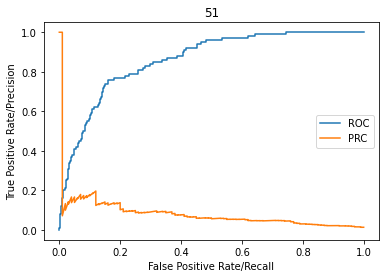

PRC AUC:0.08119047264231455
ROC AUC:0.860111111111111


In [646]:
fpr52, tpr52, thresholds52 = roc_curve(Y_test[:,51], probs[:, 51])
prec52, recall52, thresholds52 = precision_recall_curve(Y_test[:,51], probs[:, 51])

plt.plot(fpr52,tpr52,label="ROC")
plt.plot(recall52,prec52,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('51')
plt.show()

print("PRC AUC:" + str(auc(recall52, prec52)))
print("ROC AUC:" + str(auc(fpr52, tpr52)))

In [647]:
score_true_52=[]

In [648]:
for x in range(0,iteration):
  if probs[x][51]>=0.5:
    score_true_52.append(1)
  else:
    score_true_52.append(0)

score_true_52

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [649]:
score_true_correct_index_52_LCS=[]
score_true_wrong_index_52_LCS=[]

In [650]:
for x in range(0,iteration):
  if score_true_52[x]!=Y_test[x,51]:
    score_true_wrong_index_52_LCS.append(x+1)
  else:
    score_true_correct_index_52_LCS.append(x+1)

In [651]:
correct_51=len(score_true_correct_index_52_LCS)
accuracy_52=correct_51/iteration

#### Class 52

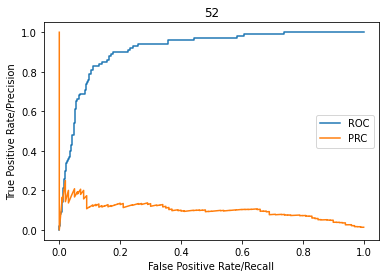

PRC AUC:0.09829536023045636
ROC AUC:0.9146808080808081


In [652]:
fpr53, tpr53, thresholds53 = roc_curve(Y_test[:,52], probs[:, 52])
prec53, recall53, thresholds53 = precision_recall_curve(Y_test[:,52], probs[:,52])

plt.plot(fpr53,tpr53,label="ROC")
plt.plot(recall53,prec53,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('52')
plt.show()

print("PRC AUC:" + str(auc(recall53, prec53)))
print("ROC AUC:" + str(auc(fpr53, tpr53)))

In [653]:
score_true_53=[]

In [654]:
for x in range(0,iteration):
  if probs[x][52]>=0.5:
    score_true_53.append(1)
  else:
    score_true_53.append(0)

score_true_53

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [655]:
score_true_correct_index_53_LCS=[]
score_true_wrong_index_53_LCS=[]

In [656]:
for x in range(0,iteration):
  if score_true_53[x]!=Y_test[x,52]:
    score_true_wrong_index_53_LCS.append(x+1)
  else:
    score_true_correct_index_53_LCS.append(x+1)

In [657]:
correct_52=len(score_true_correct_index_53_LCS)
accuracy_53=correct_52/iteration

#### Class 53

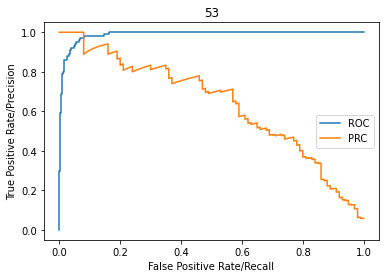

PRC AUC:0.6361018620876042
ROC AUC:0.9883151515151515


In [658]:
fpr54, tpr54, thresholds54 = roc_curve(Y_test[:,53], probs[:, 53])
prec54, recall54, thresholds54 = precision_recall_curve(Y_test[:,53], probs[:, 53])

plt.plot(fpr54,tpr54,label="ROC")
plt.plot(recall54,prec54,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('53')
plt.show()

print("PRC AUC:" + str(auc(recall54, prec54)))
print("ROC AUC:" + str(auc(fpr54, tpr54)))

In [659]:
score_true_54=[]

In [660]:
for x in range(0,iteration):
  if probs[x][53]>=0.5:
    score_true_54.append(1)
  else:
    score_true_54.append(0)

score_true_54

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [661]:
score_true_correct_index_54_LCS=[]
score_true_wrong_index_54_LCS=[]

In [662]:
for x in range(0,iteration):
  if score_true_54[x]!=Y_test[x,53]:
    score_true_wrong_index_54_LCS.append(x+1)
  else:
    score_true_correct_index_54_LCS.append(x+1)

In [663]:
correct_53=len(score_true_correct_index_54_LCS)
accuracy_54=correct_53/iteration

#### Class 54

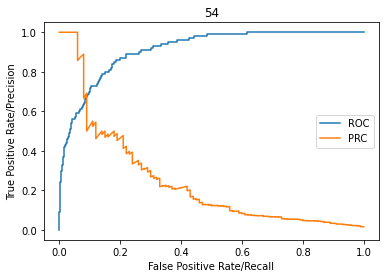

PRC AUC:0.24478375281602813
ROC AUC:0.9114040404040404


In [664]:
fpr55, tpr55, thresholds55 = roc_curve(Y_test[:,54], probs[:, 54])
prec55, recall55, thresholds55 = precision_recall_curve(Y_test[:,54], probs[:, 54])

plt.plot(fpr55,tpr55,label="ROC")
plt.plot(recall55,prec55,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('54')
plt.show()

print("PRC AUC:" + str(auc(recall55, prec55)))
print("ROC AUC:" + str(auc(fpr55, tpr55)))

In [665]:
score_true_55=[]

In [666]:
for x in range(0,iteration):
  if probs[x][54]>=0.5:
    score_true_55.append(1)
  else:
    score_true_55.append(0)

score_true_55

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [667]:
score_true_correct_index_55_LCS=[]
score_true_wrong_index_55_LCS=[]

In [668]:
for x in range(0,iteration):
  if score_true_55[x]!=Y_test[x,54]:
    score_true_wrong_index_55_LCS.append(x+1)
  else:
    score_true_correct_index_55_LCS.append(x+1)

In [669]:
correct_54=len(score_true_correct_index_55_LCS)
accuracy_55=correct_54/iteration

#### Class 55

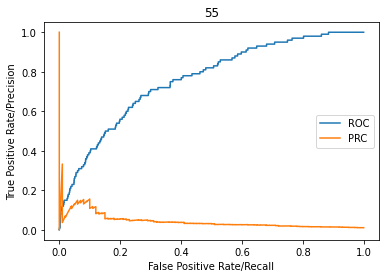

PRC AUC:0.0424414863011362
ROC AUC:0.7605560606060606


In [670]:
fpr56, tpr56, thresholds56 = roc_curve(Y_test[:,55], probs[:, 55])
prec56, recall56, thresholds56 = precision_recall_curve(Y_test[:,55], probs[:, 55])

plt.plot(fpr56,tpr56,label="ROC")
plt.plot(recall56,prec56,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('55')
plt.show()

print("PRC AUC:" + str(auc(recall56, prec56)))
print("ROC AUC:" + str(auc(fpr56, tpr56)))

In [671]:
score_true_56=[]

In [672]:
for x in range(0,iteration):
  if probs[x][55]>=0.5:
    score_true_56.append(1)
  else:
    score_true_56.append(0)

score_true_56

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [673]:
score_true_correct_index_56_LCS=[]
score_true_wrong_index_56_LCS=[]

In [674]:
for x in range(0,iteration):
  if score_true_56[x]!=Y_test[x,55]:
    score_true_wrong_index_56_LCS.append(x+1)
  else:
    score_true_correct_index_56_LCS.append(x+1)

In [675]:
correct_55=len(score_true_correct_index_56_LCS)
accuracy_56=correct_55/iteration

#### Class 56

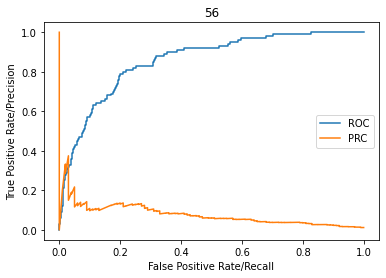

PRC AUC:0.07509246955917026
ROC AUC:0.8563535353535354


In [676]:
fpr57, tpr57, thresholds57 = roc_curve(Y_test[:,56], probs[:, 56])
prec57, recall57, thresholds57 = precision_recall_curve(Y_test[:,56], probs[:, 56])

plt.plot(fpr57,tpr57,label="ROC")
plt.plot(recall57,prec57,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('56')
plt.show()

print("PRC AUC:" + str(auc(recall57, prec57)))
print("ROC AUC:" + str(auc(fpr57, tpr57)))

In [677]:
score_true_57=[]

In [678]:
for x in range(0,iteration):
  if probs[x][56]>=0.5:
    score_true_57.append(1)
  else:
    score_true_57.append(0)

score_true_57

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [679]:
score_true_correct_index_57_LCS=[]
score_true_wrong_index_57_LCS=[]

In [680]:
for x in range(0,iteration):
  if score_true_57[x]!=Y_test[x,56]:
    score_true_wrong_index_57_LCS.append(x+1)
  else:
    score_true_correct_index_57_LCS.append(x+1)

In [681]:
correct_56=len(score_true_correct_index_57_LCS)
accuracy_57=correct_56/iteration

#### Class 57

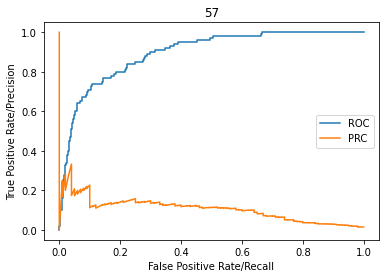

PRC AUC:0.10332672873407937
ROC AUC:0.8947787878787878


In [682]:
fpr58, tpr58, thresholds58 = roc_curve(Y_test[:,57], probs[:, 57])
prec58, recall58, thresholds58 = precision_recall_curve(Y_test[:,57], probs[:,57])

plt.plot(fpr58,tpr58,label="ROC")
plt.plot(recall58,prec58,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('57')
plt.show()

print("PRC AUC:" + str(auc(recall58, prec58)))
print("ROC AUC:" + str(auc(fpr58, tpr58)))

In [683]:
score_true_58=[]

In [684]:
for x in range(0,iteration):
  if probs[x][57]>=0.5:
    score_true_58.append(1)
  else:
    score_true_58.append(0)

score_true_58

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [685]:
score_true_correct_index_58_LCS=[]
score_true_wrong_index_58_LCS=[]

In [686]:
for x in range(0,iteration):
  if score_true_58[x]!=Y_test[x,57]:
    score_true_wrong_index_58_LCS.append(x+1)
  else:
    score_true_correct_index_58_LCS.append(x+1)

In [687]:
correct_57=len(score_true_correct_index_58_LCS)
accuracy_58=correct_57/iteration

#### Class 58

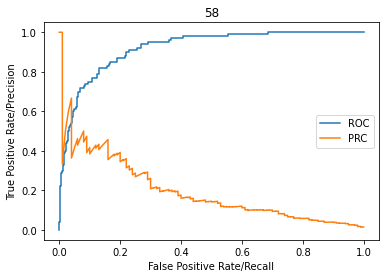

PRC AUC:0.19539457724519285
ROC AUC:0.9207252525252524


In [688]:
fpr59, tpr59, thresholds59 = roc_curve(Y_test[:,58], probs[:,58])
prec59, recall59, thresholds59 = precision_recall_curve(Y_test[:,58], probs[:,58])

plt.plot(fpr59,tpr59,label="ROC")
plt.plot(recall59,prec59,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('58')
plt.show()

print("PRC AUC:" + str(auc(recall59, prec59)))
print("ROC AUC:" + str(auc(fpr59, tpr59)))

In [689]:
score_true_59=[]

In [690]:
for x in range(0,iteration):
  if probs[x][58]>=0.5:
    score_true_59.append(1)
  else:
    score_true_59.append(0)

score_true_59

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [691]:
score_true_correct_index_59_LCS=[]
score_true_wrong_index_59_LCS=[]

In [692]:
for x in range(0,iteration):
  if score_true_59[x]!=Y_test[x,58]:
    score_true_wrong_index_59_LCS.append(x+1)
  else:
    score_true_correct_index_59_LCS.append(x+1)

In [693]:
correct_58=len(score_true_correct_index_59_LCS)
accuracy_59=correct_58/iteration

#### Class 59

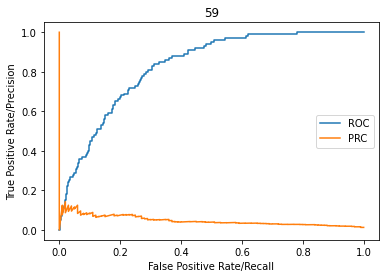

PRC AUC:0.04647249686930196
ROC AUC:0.8278838383838383


In [694]:
fpr60, tpr60, thresholds60 = roc_curve(Y_test[:,59], probs[:,59])
prec60, recall60, thresholds60 = precision_recall_curve(Y_test[:,59], probs[:,59])

plt.plot(fpr60,tpr60,label="ROC")
plt.plot(recall60,prec60,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('59')
plt.show()

print("PRC AUC:" + str(auc(recall60, prec60)))
print("ROC AUC:" + str(auc(fpr60, tpr60)))

In [695]:
score_true_60=[]

In [696]:
for x in range(0,iteration):
  if probs[x][59]>=0.5:
    score_true_60.append(1)
  else:
    score_true_60.append(0)

score_true_60

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [697]:
score_true_correct_index_60_LCS=[]
score_true_wrong_index_60_LCS=[]

In [698]:
for x in range(0,iteration):
  if score_true_60[x]!=Y_test[x,59]:
    score_true_wrong_index_60_LCS.append(x+1)
  else:
    score_true_correct_index_60_LCS.append(x+1)

In [699]:
correct_59=len(score_true_correct_index_60_LCS)
accuracy_60=correct_59/iteration

##**60-79**

###**60-69**

#### Class 60

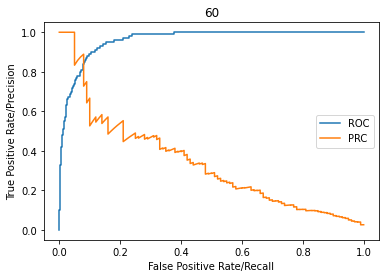

PRC AUC:0.33820413104188535
ROC AUC:0.9606585858585859


In [700]:
fpr61, tpr61, thresholds61 = roc_curve(Y_test[:,60], probs[:,60])
prec61, recall61, thresholds61 = precision_recall_curve(Y_test[:,60], probs[:,60])

plt.plot(fpr61,tpr61,label="ROC")
plt.plot(recall61,prec61,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('60')
plt.show()

print("PRC AUC:" + str(auc(recall61, prec61)))
print("ROC AUC:" + str(auc(fpr61, tpr61)))

In [701]:
score_true_61=[]

In [702]:
for x in range(0,iteration):
  if probs[x][60]>=0.5:
    score_true_61.append(1)
  else:
    score_true_61.append(0)

score_true_61

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [703]:
score_true_correct_index_61_LCS=[]
score_true_wrong_index_61_LCS=[]

In [704]:
for x in range(0,iteration):
  if score_true_61[x]!=Y_test[x,60]:
    score_true_wrong_index_61_LCS.append(x+1)
  else:
    score_true_correct_index_61_LCS.append(x+1)

In [705]:
correct_60=len(score_true_correct_index_61_LCS)
accuracy_61=correct_60/iteration

#### Class 61

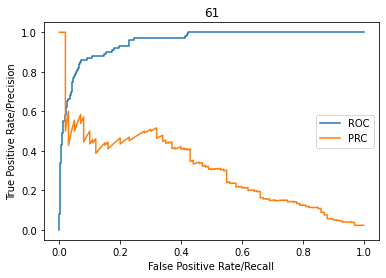

PRC AUC:0.3058726654533389
ROC AUC:0.9528606060606061


In [706]:
fpr62, tpr62, thresholds62 = roc_curve(Y_test[:,61], probs[:,61])
prec62, recall62, thresholds62 = precision_recall_curve(Y_test[:,61], probs[:,61])

plt.plot(fpr62,tpr62,label="ROC")
plt.plot(recall62,prec62,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('61')
plt.show()

print("PRC AUC:" + str(auc(recall62, prec62)))
print("ROC AUC:" + str(auc(fpr62, tpr62)))

In [707]:
score_true_62=[]

In [708]:
for x in range(0,iteration):
  if probs[x][61]>=0.5:
    score_true_62.append(1)
  else:
    score_true_62.append(0)

score_true_62

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [709]:
score_true_correct_index_62_LCS=[]
score_true_wrong_index_62_LCS=[]

In [710]:
for x in range(0,iteration):
  if score_true_62[x]!=Y_test[x,61]:
    score_true_wrong_index_62_LCS.append(x+1)
  else:
    score_true_correct_index_62_LCS.append(x+1)

In [711]:
correct_61=len(score_true_correct_index_62_LCS)
accuracy_62=correct_61/iteration

#### Class 62

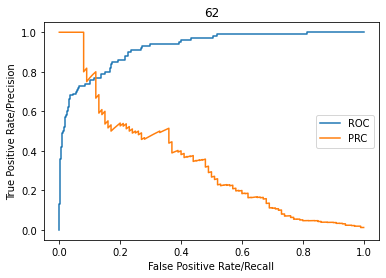

PRC AUC:0.340305978360046
ROC AUC:0.9221636363636363


In [712]:
fpr63, tpr63, thresholds63 = roc_curve(Y_test[:,62], probs[:, 62])
prec63, recall63, thresholds63 = precision_recall_curve(Y_test[:,62], probs[:,62])

plt.plot(fpr63,tpr63,label="ROC")
plt.plot(recall63,prec63,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('62')
plt.show()

print("PRC AUC:" + str(auc(recall63, prec63)))
print("ROC AUC:" + str(auc(fpr63, tpr63)))

In [713]:
score_true_63=[]

In [714]:
for x in range(0,iteration):
  if probs[x][62]>=0.5:
    score_true_63.append(1)
  else:
    score_true_63.append(0)

score_true_63

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [715]:
score_true_correct_index_63_LCS=[]
score_true_wrong_index_63_LCS=[]

In [716]:
for x in range(0,iteration):
  if score_true_63[x]!=Y_test[x,62]:
    score_true_wrong_index_63_LCS.append(x+1)
  else:
    score_true_correct_index_63_LCS.append(x+1)

In [717]:
correct_62=len(score_true_correct_index_63_LCS)
accuracy_63=correct_62/iteration

#### Class 63

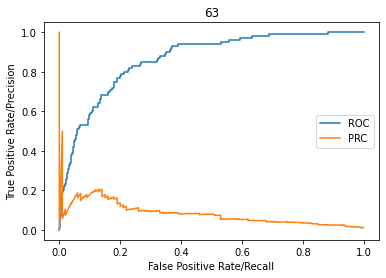

PRC AUC:0.07976849492714308
ROC AUC:0.8643515151515151


In [718]:
fpr64, tpr64, thresholds64 = roc_curve(Y_test[:,63], probs[:,63])
prec64, recall64, thresholds64 = precision_recall_curve(Y_test[:,63], probs[:,63])

plt.plot(fpr64,tpr64,label="ROC")
plt.plot(recall64,prec64,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('63')
plt.show()

print("PRC AUC:" + str(auc(recall64, prec64)))
print("ROC AUC:" + str(auc(fpr64, tpr64)))

In [719]:
score_true_64=[]

In [720]:
for x in range(0,iteration):
  if probs[x][63]>=0.5:
    score_true_64.append(1)
  else:
    score_true_64.append(0)

score_true_64

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [721]:
score_true_correct_index_64_LCS=[]
score_true_wrong_index_64_LCS=[]

In [722]:
for x in range(0,iteration):
  if score_true_64[x]!=Y_test[x,63]:
    score_true_wrong_index_64_LCS.append(x+1)
  else:
    score_true_correct_index_64_LCS.append(x+1)

In [723]:
correct_63=len(score_true_correct_index_64_LCS)
accuracy_64=correct_63/iteration

#### Class 64

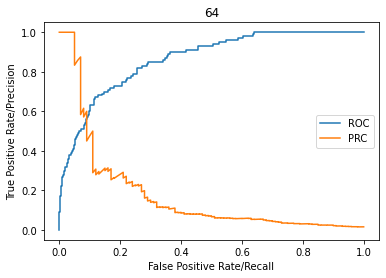

PRC AUC:0.17515313483033987
ROC AUC:0.864050505050505


In [724]:
fpr65, tpr65, thresholds65 = roc_curve(Y_test[:,64], probs[:, 64])
prec65, recall65, thresholds65 = precision_recall_curve(Y_test[:,64], probs[:,64])

plt.plot(fpr65,tpr65,label="ROC")
plt.plot(recall65,prec65,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('64')
plt.show()

print("PRC AUC:" + str(auc(recall65, prec65)))
print("ROC AUC:" + str(auc(fpr65, tpr65)))

In [725]:
score_true_65=[]

In [726]:
for x in range(0,iteration):
  if probs[x][64]>=0.5:
    score_true_65.append(1)
  else:
    score_true_65.append(0)

score_true_65

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [727]:
score_true_correct_index_65_LCS=[]
score_true_wrong_index_65_LCS=[]

In [728]:
for x in range(0,iteration):
  if score_true_65[x]!=Y_test[x,64]:
    score_true_wrong_index_65_LCS.append(x+1)
  else:
    score_true_correct_index_65_LCS.append(x+1)

In [729]:
correct_64=len(score_true_correct_index_65_LCS)
accuracy_65=correct_64/iteration

#### Class 65

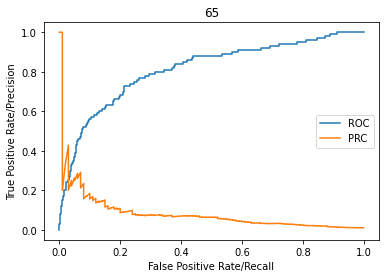

PRC AUC:0.08267213621373708
ROC AUC:0.8113555555555555


In [730]:
fpr66, tpr66, thresholds66 = roc_curve(Y_test[:,65], probs[:, 65])
prec66, recall66, thresholds66 = precision_recall_curve(Y_test[:,65], probs[:, 65])

plt.plot(fpr66,tpr66,label="ROC")
plt.plot(recall66,prec66,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('65')
plt.show()

print("PRC AUC:" + str(auc(recall66, prec66)))
print("ROC AUC:" + str(auc(fpr66, tpr66)))

In [731]:
score_true_66=[]

In [732]:
for x in range(0,iteration):
  if probs[x][65]>=0.5:
    score_true_66.append(1)
  else:
    score_true_66.append(0)

score_true_66

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [733]:
score_true_correct_index_66_LCS=[]
score_true_wrong_index_66_LCS=[]

In [734]:
for x in range(0,iteration):
  if score_true_66[x]!=Y_test[x,65]:
    score_true_wrong_index_66_LCS.append(x+1)
  else:
    score_true_correct_index_66_LCS.append(x+1)

In [735]:
correct_65=len(score_true_correct_index_66_LCS)
accuracy_66=correct_65/iteration

#### Class 66

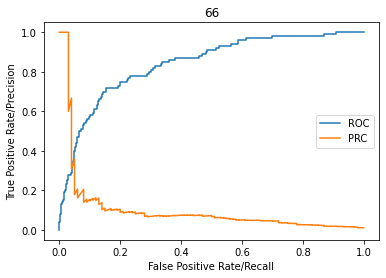

PRC AUC:0.10113910670348328
ROC AUC:0.8406020202020202


In [736]:
fpr67, tpr67, thresholds67 = roc_curve(Y_test[:,66], probs[:, 66])
prec67, recall67, thresholds67 = precision_recall_curve(Y_test[:,66], probs[:, 66])

plt.plot(fpr67,tpr67,label="ROC")
plt.plot(recall67,prec67,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('66')
plt.show()

print("PRC AUC:" + str(auc(recall67, prec67)))
print("ROC AUC:" + str(auc(fpr67, tpr67)))

In [737]:
score_true_67=[]

In [738]:
for x in range(0,iteration):
  if probs[x][66]>=0.5:
    score_true_67.append(1)
  else:
    score_true_67.append(0)

score_true_67

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [739]:
score_true_correct_index_67_LCS=[]
score_true_wrong_index_67_LCS=[]

In [740]:
for x in range(0,iteration):
  if score_true_67[x]!=Y_test[x,66]:
    score_true_wrong_index_67_LCS.append(x+1)
  else:
    score_true_correct_index_67_LCS.append(x+1)

In [741]:
correct_66=len(score_true_correct_index_67_LCS)
accuracy_67=correct_66/iteration

#### Class 67

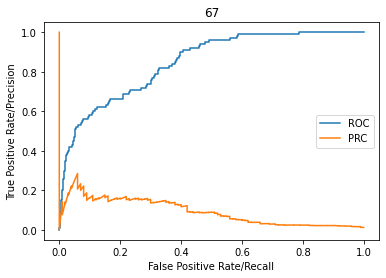

PRC AUC:0.09017134631746887
ROC AUC:0.8465282828282829


In [742]:
fpr68, tpr68, thresholds68 = roc_curve(Y_test[:,67], probs[:, 67])
prec68, recall68, thresholds68 = precision_recall_curve(Y_test[:,67], probs[:,67])

plt.plot(fpr68,tpr68,label="ROC")
plt.plot(recall68,prec68,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('67')
plt.show()

print("PRC AUC:" + str(auc(recall68, prec68)))
print("ROC AUC:" + str(auc(fpr68, tpr68)))

In [743]:
score_true_68=[]

In [744]:
for x in range(0,iteration):
  if probs[x][67]>=0.5:
    score_true_68.append(1)
  else:
    score_true_68.append(0)

score_true_68

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [745]:
score_true_correct_index_68_LCS=[]
score_true_wrong_index_68_LCS=[]

In [746]:
for x in range(0,iteration):
  if score_true_68[x]!=Y_test[x,67]:
    score_true_wrong_index_68_LCS.append(x+1)
  else:
    score_true_correct_index_68_LCS.append(x+1)

In [747]:
correct_67=len(score_true_correct_index_68_LCS)
accuracy_68=correct_67/iteration

#### Class 68

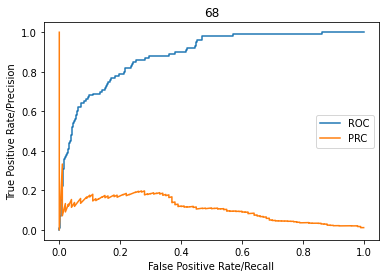

PRC AUC:0.10350414738919185
ROC AUC:0.8845373737373738


In [748]:
fpr69, tpr69, thresholds69 = roc_curve(Y_test[:,68], probs[:,68])
prec69, recall69, thresholds69 = precision_recall_curve(Y_test[:,68], probs[:,68])

plt.plot(fpr69,tpr69,label="ROC")
plt.plot(recall69,prec69,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('68')
plt.show()

print("PRC AUC:" + str(auc(recall69, prec69)))
print("ROC AUC:" + str(auc(fpr69, tpr69)))

In [749]:
score_true_69=[]

In [750]:
for x in range(0,iteration):
  if probs[x][68]>=0.5:
    score_true_69.append(1)
  else:
    score_true_69.append(0)

score_true_69

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [751]:
score_true_correct_index_69_LCS=[]
score_true_wrong_index_69_LCS=[]

In [752]:
for x in range(0,iteration):
  if score_true_69[x]!=Y_test[x,68]:
    score_true_wrong_index_69_LCS.append(x+1)
  else:
    score_true_correct_index_69_LCS.append(x+1)

In [753]:
correct_68=len(score_true_correct_index_69_LCS)
accuracy_69=correct_68/iteration

#### Class 69

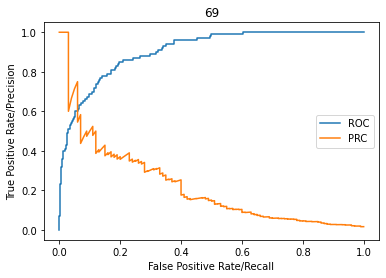

PRC AUC:0.22038855360281828
ROC AUC:0.9060484848484849


In [754]:
fpr70, tpr70, thresholds70 = roc_curve(Y_test[:,69], probs[:,69])
prec70, recall70, thresholds70 = precision_recall_curve(Y_test[:,69], probs[:,69])

plt.plot(fpr70,tpr70,label="ROC")
plt.plot(recall70,prec70,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('69')
plt.show()

print("PRC AUC:" + str(auc(recall70, prec70)))
print("ROC AUC:" + str(auc(fpr70, tpr70)))

In [755]:
score_true_70=[]

In [756]:
for x in range(0,iteration):
  if probs[x][69]>=0.5:
    score_true_70.append(1)
  else:
    score_true_70.append(0)

score_true_70

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [757]:
score_true_correct_index_70_LCS=[]
score_true_wrong_index_70_LCS=[]

In [758]:
for x in range(0,iteration):
  if score_true_70[x]!=Y_test[x,69]:
    score_true_wrong_index_70_LCS.append(x+1)
  else:
    score_true_correct_index_70_LCS.append(x+1)

In [759]:
correct_69=len(score_true_correct_index_70_LCS)
accuracy_70=correct_69/iteration

###**70-79**

#### Class 70

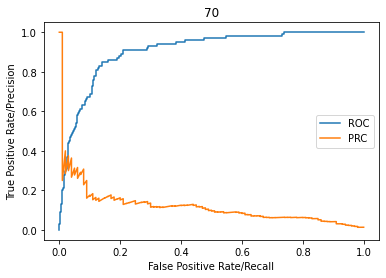

PRC AUC:0.11918001128648863
ROC AUC:0.9056262626262627


In [760]:
fpr71, tpr71, thresholds71 = roc_curve(Y_test[:,70], probs[:,70])
prec71, recall71, thresholds71 = precision_recall_curve(Y_test[:,70], probs[:,70])

plt.plot(fpr71,tpr71,label="ROC")
plt.plot(recall71,prec71,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('70')
plt.show()

print("PRC AUC:" + str(auc(recall71, prec71)))
print("ROC AUC:" + str(auc(fpr71, tpr71)))

In [761]:
score_true_71=[]

In [762]:
for x in range(0,iteration):
  if probs[x][70]>=0.5:
    score_true_71.append(1)
  else:
    score_true_71.append(0)

score_true_71

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [763]:
score_true_correct_index_71_LCS=[]
score_true_wrong_index_71_LCS=[]

In [764]:
for x in range(0,iteration):
  if score_true_71[x]!=Y_test[x,70]:
    score_true_wrong_index_71_LCS.append(x+1)
  else:
    score_true_correct_index_71_LCS.append(x+1)

In [765]:
correct_70=len(score_true_correct_index_71_LCS)
accuracy_71=correct_70/iteration

#### Class 71

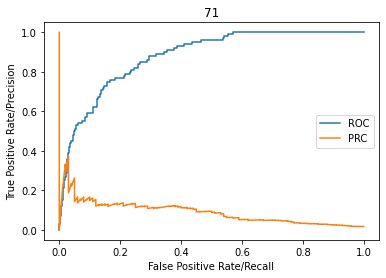

PRC AUC:0.08789610163139534
ROC AUC:0.8782414141414141


In [766]:
fpr72, tpr72, thresholds72 = roc_curve(Y_test[:,71], probs[:, 71])
prec72, recall72, thresholds72 = precision_recall_curve(Y_test[:,71], probs[:, 71])

plt.plot(fpr72,tpr72,label="ROC")
plt.plot(recall72,prec72,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('71')
plt.show()

print("PRC AUC:" + str(auc(recall72, prec72)))
print("ROC AUC:" + str(auc(fpr72, tpr72)))

In [767]:
score_true_72=[]

In [768]:
for x in range(0,iteration):
  if probs[x][71]>=0.5:
    score_true_72.append(1)
  else:
    score_true_72.append(0)

score_true_72

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [769]:
score_true_correct_index_72_LCS=[]
score_true_wrong_index_72_LCS=[]

In [770]:
for x in range(0,iteration):
  if score_true_72[x]!=Y_test[x,71]:
    score_true_wrong_index_72_LCS.append(x+1)
  else:
    score_true_correct_index_72_LCS.append(x+1)

In [771]:
correct_71=len(score_true_correct_index_72_LCS)
accuracy_72=correct_71/iteration

#### Class 72

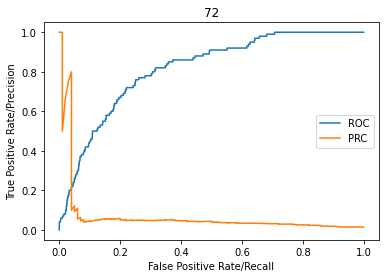

PRC AUC:0.06765961035151652
ROC AUC:0.813529797979798


In [772]:
fpr73, tpr73, thresholds73 = roc_curve(Y_test[:,72], probs[:, 72])
prec73, recall73, thresholds73 = precision_recall_curve(Y_test[:,72], probs[:,72])

plt.plot(fpr73,tpr73,label="ROC")
plt.plot(recall73,prec73,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('72')
plt.show()

print("PRC AUC:" + str(auc(recall73, prec73)))
print("ROC AUC:" + str(auc(fpr73, tpr73)))

In [773]:
score_true_73=[]

In [774]:
for x in range(0,iteration):
  if probs[x][72]>=0.5:
    score_true_73.append(1)
  else:
    score_true_73.append(0)

score_true_73

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [775]:
score_true_correct_index_73_LCS=[]
score_true_wrong_index_73_LCS=[]

In [776]:
for x in range(0,iteration):
  if score_true_73[x]!=Y_test[x,72]:
    score_true_wrong_index_73_LCS.append(x+1)
  else:
    score_true_correct_index_73_LCS.append(x+1)

In [777]:
correct_72=len(score_true_correct_index_73_LCS)
accuracy_73=correct_72/iteration

#### Class 73

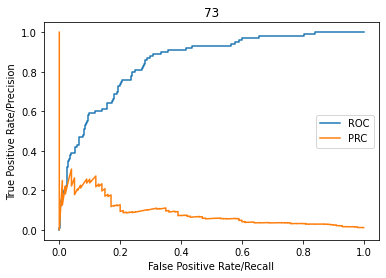

PRC AUC:0.08367248172131168
ROC AUC:0.8520797979797979


In [778]:
fpr74, tpr74, thresholds74 = roc_curve(Y_test[:,73], probs[:, 73])
prec74, recall74, thresholds74 = precision_recall_curve(Y_test[:,73], probs[:, 73])

plt.plot(fpr74,tpr74,label="ROC")
plt.plot(recall74,prec74,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('73')
plt.show()

print("PRC AUC:" + str(auc(recall74, prec74)))
print("ROC AUC:" + str(auc(fpr74, tpr74)))

In [779]:
score_true_74=[]

In [780]:
for x in range(0,iteration):
  if probs[x][73]>=0.5:
    score_true_74.append(1)
  else:
    score_true_74.append(0)

score_true_74

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [781]:
score_true_correct_index_74_LCS=[]
score_true_wrong_index_74_LCS=[]

In [782]:
for x in range(0,iteration):
  if score_true_74[x]!=Y_test[x,73]:
    score_true_wrong_index_74_LCS.append(x+1)
  else:
    score_true_correct_index_74_LCS.append(x+1)

In [783]:
correct_73=len(score_true_correct_index_74_LCS)
accuracy_74=correct_73/iteration

#### Class 74

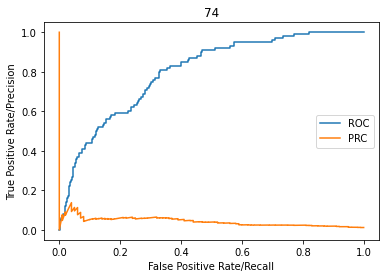

PRC AUC:0.041480658918532066
ROC AUC:0.7993646464646463


In [784]:
fpr75, tpr75, thresholds75 = roc_curve(Y_test[:,74], probs[:, 74])
prec75, recall75, thresholds75 = precision_recall_curve(Y_test[:,74], probs[:, 74])

plt.plot(fpr75,tpr75,label="ROC")
plt.plot(recall75,prec75,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('74')
plt.show()

print("PRC AUC:" + str(auc(recall75, prec75)))
print("ROC AUC:" + str(auc(fpr75, tpr75)))

In [785]:
score_true_75=[]

In [786]:
for x in range(0,iteration):
  if probs[x][74]>=0.5:
    score_true_75.append(1)
  else:
    score_true_75.append(0)

score_true_75

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [787]:
score_true_correct_index_75_LCS=[]
score_true_wrong_index_75_LCS=[]

In [788]:
for x in range(0,iteration):
  if score_true_75[x]!=Y_test[x,74]:
    score_true_wrong_index_75_LCS.append(x+1)
  else:
    score_true_correct_index_75_LCS.append(x+1)

In [789]:
correct_74=len(score_true_correct_index_75_LCS)
accuracy_75=correct_74/iteration

#### Class 75

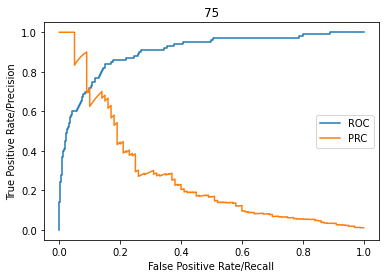

PRC AUC:0.2682556024264056
ROC AUC:0.9028252525252526


In [790]:
fpr76, tpr76, thresholds76 = roc_curve(Y_test[:,75], probs[:, 75])
prec76, recall76, thresholds76 = precision_recall_curve(Y_test[:,75], probs[:, 75])

plt.plot(fpr76,tpr76,label="ROC")
plt.plot(recall76,prec76,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('75')
plt.show()

print("PRC AUC:" + str(auc(recall76, prec76)))
print("ROC AUC:" + str(auc(fpr76, tpr76)))

In [791]:
score_true_76=[]

In [792]:
for x in range(0,iteration):
  if probs[x][75]>=0.5:
    score_true_76.append(1)
  else:
    score_true_76.append(0)

score_true_76

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [793]:
score_true_correct_index_76_LCS=[]
score_true_wrong_index_76_LCS=[]

In [794]:
for x in range(0,iteration):
  if score_true_76[x]!=Y_test[x,75]:
    score_true_wrong_index_76_LCS.append(x+1)
  else:
    score_true_correct_index_76_LCS.append(x+1)

In [795]:
correct_75=len(score_true_correct_index_76_LCS)
accuracy_76=correct_75/iteration

#### Class 76

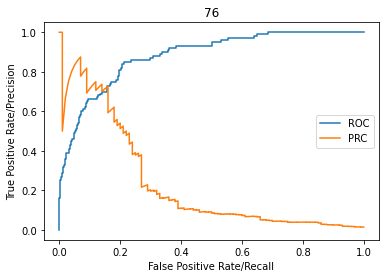

PRC AUC:0.23232036619398366
ROC AUC:0.8818050505050505


In [796]:
fpr77, tpr77, thresholds77 = roc_curve(Y_test[:,76], probs[:, 76])
prec77, recall77, thresholds77 = precision_recall_curve(Y_test[:,76], probs[:, 76])

plt.plot(fpr77,tpr77,label="ROC")
plt.plot(recall77,prec77,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('76')
plt.show()

print("PRC AUC:" + str(auc(recall77, prec77)))
print("ROC AUC:" + str(auc(fpr77, tpr77)))

In [797]:
score_true_77=[]

In [798]:
for x in range(0,iteration):
  if probs[x][76]>=0.5:
    score_true_77.append(1)
  else:
    score_true_77.append(0)

score_true_77

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [799]:
score_true_correct_index_77_LCS=[]
score_true_wrong_index_77_LCS=[]

In [800]:
for x in range(0,iteration):
  if score_true_77[x]!=Y_test[x,76]:
    score_true_wrong_index_77_LCS.append(x+1)
  else:
    score_true_correct_index_77_LCS.append(x+1)

In [801]:
correct_76=len(score_true_correct_index_77_LCS)
accuracy_77=correct_76/iteration

#### Class 77

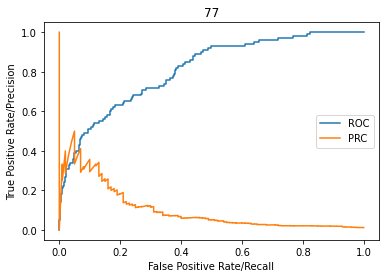

PRC AUC:0.0995405003723425
ROC AUC:0.8097323232323232


In [802]:
fpr78, tpr78, thresholds78 = roc_curve(Y_test[:,77], probs[:, 77])
prec78, recall78, thresholds78 = precision_recall_curve(Y_test[:,77], probs[:,77])

plt.plot(fpr78,tpr78,label="ROC")
plt.plot(recall78,prec78,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('77')
plt.show()

print("PRC AUC:" + str(auc(recall78, prec78)))
print("ROC AUC:" + str(auc(fpr78, tpr78)))

In [803]:
score_true_78=[]

In [804]:
for x in range(0,iteration):
  if probs[x][77]>=0.5:
    score_true_78.append(1)
  else:
    score_true_78.append(0)

score_true_78

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [805]:
score_true_correct_index_78_LCS=[]
score_true_wrong_index_78_LCS=[]

In [806]:
for x in range(0,iteration):
  if score_true_78[x]!=Y_test[x,77]:
    score_true_wrong_index_78_LCS.append(x+1)
  else:
    score_true_correct_index_78_LCS.append(x+1)

In [807]:
correct_77=len(score_true_correct_index_78_LCS)
accuracy_78=correct_77/iteration

#### Class 78

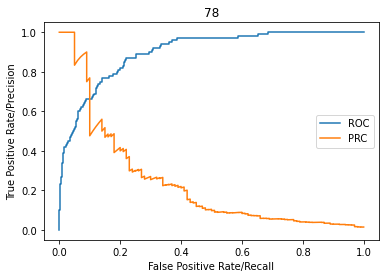

PRC AUC:0.23744722029821744
ROC AUC:0.9000303030303031


In [808]:
fpr79, tpr79, thresholds79 = roc_curve(Y_test[:,78], probs[:,78])
prec79, recall79, thresholds79 = precision_recall_curve(Y_test[:,78], probs[:,78])

plt.plot(fpr79,tpr79,label="ROC")
plt.plot(recall79,prec79,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('78')
plt.show()

print("PRC AUC:" + str(auc(recall79, prec79)))
print("ROC AUC:" + str(auc(fpr79, tpr79)))

In [809]:
score_true_79=[]

In [810]:
for x in range(0,iteration):
  if probs[x][78]>=0.5:
    score_true_79.append(1)
  else:
    score_true_79.append(0)

score_true_79

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [811]:
score_true_correct_index_79_LCS=[]
score_true_wrong_index_79_LCS=[]

In [812]:
for x in range(0,iteration):
  if score_true_79[x]!=Y_test[x,78]:
    score_true_wrong_index_79_LCS.append(x+1)
  else:
    score_true_correct_index_79_LCS.append(x+1)

In [813]:
correct_78=len(score_true_correct_index_79_LCS)
accuracy_79=correct_78/iteration

#### Class 79

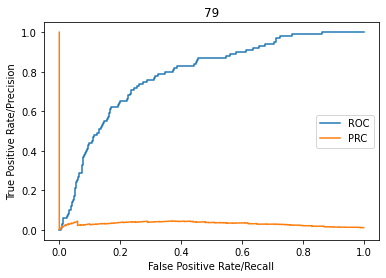

PRC AUC:0.030635339028361817
ROC AUC:0.787668686868687


In [814]:
fpr80, tpr80, thresholds80 = roc_curve(Y_test[:,79], probs[:,79])
prec80, recall80, thresholds80 = precision_recall_curve(Y_test[:,79], probs[:,79])

plt.plot(fpr80,tpr80,label="ROC")
plt.plot(recall80,prec80,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('79')
plt.show()

print("PRC AUC:" + str(auc(recall80, prec80)))
print("ROC AUC:" + str(auc(fpr80, tpr80)))

In [815]:
score_true_80=[]

In [816]:
for x in range(0,iteration):
  if probs[x][79]>=0.5:
    score_true_80.append(1)
  else:
    score_true_80.append(0)

score_true_80

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [817]:
score_true_correct_index_80_LCS=[]
score_true_wrong_index_80_LCS=[]

In [818]:
for x in range(0,iteration):
  if score_true_80[x]!=Y_test[x,79]:
    score_true_wrong_index_80_LCS.append(x+1)
  else:
    score_true_correct_index_80_LCS.append(x+1)

In [819]:
correct_79=len(score_true_correct_index_80_LCS)
accuracy_80=correct_79/iteration

##**80-99**

###**80-99**

#### Class 80

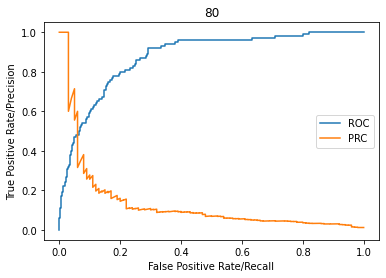

PRC AUC:0.13141014293712017
ROC AUC:0.8749898989898991


In [820]:
fpr81, tpr81, thresholds81 = roc_curve(Y_test[:,80], probs[:,80])
prec81, recall81, thresholds81 = precision_recall_curve(Y_test[:,80], probs[:,80])

plt.plot(fpr81,tpr81,label="ROC")
plt.plot(recall81,prec81,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('80')
plt.show()

print("PRC AUC:" + str(auc(recall81, prec81)))
print("ROC AUC:" + str(auc(fpr81, tpr81)))

In [821]:
score_true_81=[]

In [822]:
for x in range(0,iteration):
  if probs[x][80]>=0.5:
    score_true_81.append(1)
  else:
    score_true_81.append(0)

score_true_81

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [823]:
score_true_correct_index_81_LCS=[]
score_true_wrong_index_81_LCS=[]

In [824]:
for x in range(0,iteration):
  if score_true_81[x]!=Y_test[x,80]:
    score_true_wrong_index_81_LCS.append(x+1)
  else:
    score_true_correct_index_81_LCS.append(x+1)

In [825]:
correct_80=len(score_true_correct_index_81_LCS)
accuracy_81=correct_80/iteration

#### Class 81

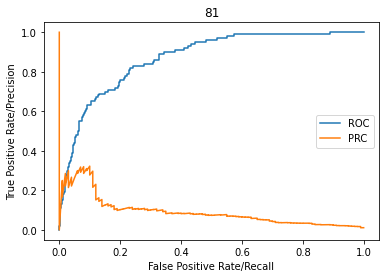

PRC AUC:0.09029971140856746
ROC AUC:0.8691464646464646


In [826]:
fpr82, tpr82, thresholds82 = roc_curve(Y_test[:,81], probs[:,81])
prec82, recall82, thresholds82 = precision_recall_curve(Y_test[:,81], probs[:,81])

plt.plot(fpr82,tpr82,label="ROC")
plt.plot(recall82,prec82,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('81')
plt.show()

print("PRC AUC:" + str(auc(recall82, prec82)))
print("ROC AUC:" + str(auc(fpr82, tpr82)))

In [827]:
score_true_82=[]

In [828]:
for x in range(0,iteration):
  if probs[x][81]>=0.5:
    score_true_82.append(1)
  else:
    score_true_82.append(0)

score_true_82

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [829]:
score_true_correct_index_82_LCS=[]
score_true_wrong_index_82_LCS=[]

In [830]:
for x in range(0,iteration):
  if score_true_82[x]!=Y_test[x,81]:
    score_true_wrong_index_82_LCS.append(x+1)
  else:
    score_true_correct_index_82_LCS.append(x+1)

In [831]:
correct_81=len(score_true_correct_index_82_LCS)
accuracy_82=correct_81/iteration

#### Class 82

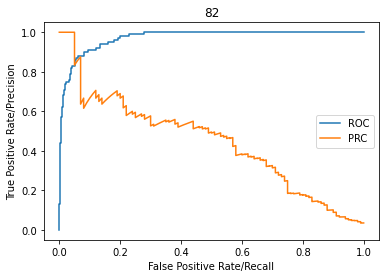

PRC AUC:0.4438002985656291
ROC AUC:0.9717606060606061


In [832]:
fpr83, tpr83, thresholds83 = roc_curve(Y_test[:,82], probs[:, 82])
prec83, recall83, thresholds83 = precision_recall_curve(Y_test[:,82], probs[:,82])

plt.plot(fpr83,tpr83,label="ROC")
plt.plot(recall83,prec83,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('82')
plt.show()

print("PRC AUC:" + str(auc(recall83, prec83)))
print("ROC AUC:" + str(auc(fpr83, tpr83)))

In [833]:
score_true_83=[]

In [834]:
for x in range(0,iteration):
  if probs[x][82]>=0.5:
    score_true_83.append(1)
  else:
    score_true_83.append(0)

score_true_83

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [835]:
score_true_correct_index_83_LCS=[]
score_true_wrong_index_83_LCS=[]

In [836]:
for x in range(0,iteration):
  if score_true_83[x]!=Y_test[x,82]:
    score_true_wrong_index_83_LCS.append(x+1)
  else:
    score_true_correct_index_83_LCS.append(x+1)

In [837]:
correct_82=len(score_true_correct_index_83_LCS)
accuracy_83=correct_82/iteration

#### Class 83

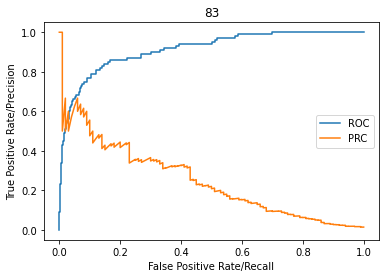

PRC AUC:0.248771338713998
ROC AUC:0.9133696969696969


In [838]:
fpr84, tpr84, thresholds84 = roc_curve(Y_test[:,83], probs[:,83])
prec84, recall84, thresholds84 = precision_recall_curve(Y_test[:,83], probs[:,83])

plt.plot(fpr84,tpr84,label="ROC")
plt.plot(recall84,prec84,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('83')
plt.show()

print("PRC AUC:" + str(auc(recall84, prec84)))
print("ROC AUC:" + str(auc(fpr84, tpr84)))

In [839]:
score_true_84=[]

In [840]:
for x in range(0,iteration):
  if probs[x][83]>=0.5:
    score_true_84.append(1)
  else:
    score_true_84.append(0)

score_true_84

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [841]:
score_true_correct_index_84_LCS=[]
score_true_wrong_index_84_LCS=[]

In [842]:
for x in range(0,iteration):
  if score_true_84[x]!=Y_test[x,83]:
    score_true_wrong_index_84_LCS.append(x+1)
  else:
    score_true_correct_index_84_LCS.append(x+1)

In [843]:
correct_83=len(score_true_correct_index_84_LCS)
accuracy_84=correct_83/iteration

#### Class 84

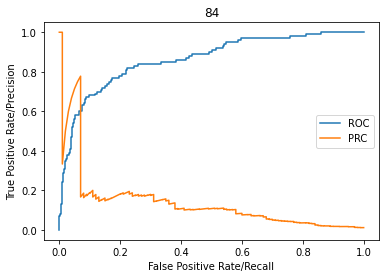

PRC AUC:0.1376559127220381
ROC AUC:0.8636999999999999


In [844]:
fpr85, tpr85, thresholds85 = roc_curve(Y_test[:,84], probs[:,84])
prec85, recall85, thresholds85 = precision_recall_curve(Y_test[:,84], probs[:,84])

plt.plot(fpr85,tpr85,label="ROC")
plt.plot(recall85,prec85,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('84')
plt.show()

print("PRC AUC:" + str(auc(recall85, prec85)))
print("ROC AUC:" + str(auc(fpr85, tpr85)))

In [845]:
score_true_85=[]

In [846]:
for x in range(0,iteration):
  if probs[x][84]>=0.5:
    score_true_85.append(1)
  else:
    score_true_85.append(0)

score_true_85

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [847]:
score_true_correct_index_85_LCS=[]
score_true_wrong_index_85_LCS=[]

In [848]:
for x in range(0,iteration):
  if score_true_85[x]!=Y_test[x,84]:
    score_true_wrong_index_85_LCS.append(x+1)
  else:
    score_true_correct_index_85_LCS.append(x+1)

In [849]:
correct_84=len(score_true_correct_index_85_LCS)
accuracy_85=correct_84/iteration

#### Class 85

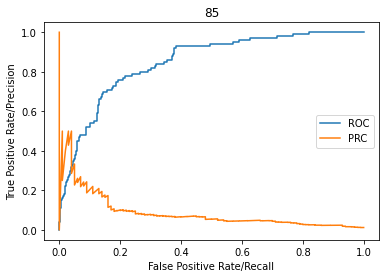

PRC AUC:0.08477050058400804
ROC AUC:0.8489202020202019


In [850]:
fpr86, tpr86, thresholds86 = roc_curve(Y_test[:,85], probs[:, 85])
prec86, recall86, thresholds86 = precision_recall_curve(Y_test[:,85], probs[:,85])

plt.plot(fpr86,tpr86,label="ROC")
plt.plot(recall86,prec86,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('85')
plt.show()

print("PRC AUC:" + str(auc(recall86, prec86)))
print("ROC AUC:" + str(auc(fpr86, tpr86)))

In [851]:
score_true_86=[]

In [852]:
for x in range(0,iteration):
  if probs[x][85]>=0.5:
    score_true_86.append(1)
  else:
    score_true_86.append(0)

score_true_86

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [853]:
score_true_correct_index_86_LCS=[]
score_true_wrong_index_86_LCS=[]

In [854]:
for x in range(0,iteration):
  if score_true_86[x]!=Y_test[x,85]:
    score_true_wrong_index_86_LCS.append(x+1)
  else:
    score_true_correct_index_86_LCS.append(x+1)

In [855]:
correct_85=len(score_true_correct_index_86_LCS)
accuracy_86=correct_85/iteration

#### Class 86

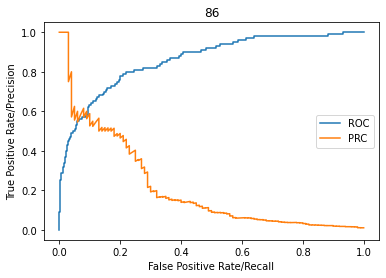

PRC AUC:0.2109568787696558
ROC AUC:0.8605848484848486


In [856]:
fpr87, tpr87, thresholds87 = roc_curve(Y_test[:,86], probs[:, 86])
prec87, recall87, thresholds87 = precision_recall_curve(Y_test[:,86], probs[:,86])

plt.plot(fpr87,tpr87,label="ROC")
plt.plot(recall87,prec87,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('86')
plt.show()

print("PRC AUC:" + str(auc(recall87, prec87)))
print("ROC AUC:" + str(auc(fpr87, tpr87)))

In [857]:
score_true_87=[]

In [858]:
for x in range(0,iteration):
  if probs[x][86]>=0.5:
    score_true_87.append(1)
  else:
    score_true_87.append(0)

score_true_87

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [859]:
score_true_correct_index_87_LCS=[]
score_true_wrong_index_87_LCS=[]

In [860]:
for x in range(0,iteration):
  if score_true_87[x]!=Y_test[x,86]:
    score_true_wrong_index_87_LCS.append(x+1)
  else:
    score_true_correct_index_87_LCS.append(x+1)

In [861]:
correct_86=len(score_true_correct_index_87_LCS)
accuracy_87=correct_86/iteration

#### Class 87

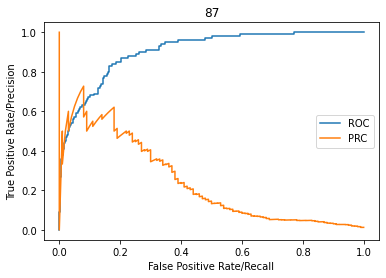

PRC AUC:0.2357016679185124
ROC AUC:0.9052919191919192


In [862]:
fpr88, tpr88, thresholds88 = roc_curve(Y_test[:,87], probs[:, 87])
prec88, recall88, thresholds88 = precision_recall_curve(Y_test[:,87], probs[:,87])

plt.plot(fpr88,tpr88,label="ROC")
plt.plot(recall88,prec88,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('87')
plt.show()

print("PRC AUC:" + str(auc(recall88, prec88)))
print("ROC AUC:" + str(auc(fpr88, tpr88)))

In [863]:
score_true_88=[]

In [864]:
for x in range(0,iteration):
  if probs[x][87]>=0.5:
    score_true_88.append(1)
  else:
    score_true_88.append(0)

score_true_88

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [865]:
score_true_correct_index_88_LCS=[]
score_true_wrong_index_88_LCS=[]

In [866]:
for x in range(0,iteration):
  if score_true_88[x]!=Y_test[x,87]:
    score_true_wrong_index_88_LCS.append(x+1)
  else:
    score_true_correct_index_88_LCS.append(x+1)

In [867]:
correct_87=len(score_true_correct_index_88_LCS)
accuracy_88=correct_87/iteration

#### Class 88

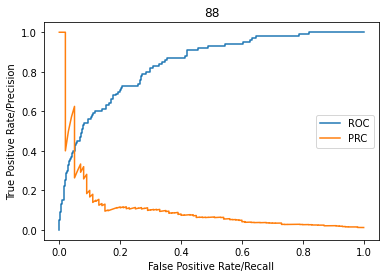

PRC AUC:0.10567440772598381
ROC AUC:0.840450505050505


In [868]:
fpr89, tpr89, thresholds89 = roc_curve(Y_test[:,88], probs[:,88])
prec89, recall89, thresholds89 = precision_recall_curve(Y_test[:,88], probs[:,88])

plt.plot(fpr89,tpr89,label="ROC")
plt.plot(recall89,prec89,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('88')
plt.show()

print("PRC AUC:" + str(auc(recall89, prec89)))
print("ROC AUC:" + str(auc(fpr89, tpr89)))

In [869]:
score_true_89=[]

In [870]:
for x in range(0,iteration):
  if probs[x][88]>=0.5:
    score_true_89.append(1)
  else:
    score_true_89.append(0)

score_true_89

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [871]:
score_true_correct_index_89_LCS=[]
score_true_wrong_index_89_LCS=[]

In [872]:
for x in range(0,iteration):
  if score_true_89[x]!=Y_test[x,88]:
    score_true_wrong_index_89_LCS.append(x+1)
  else:
    score_true_correct_index_89_LCS.append(x+1)

In [873]:
correct_88=len(score_true_correct_index_89_LCS)
accuracy_89=correct_88/iteration

#### Class 89

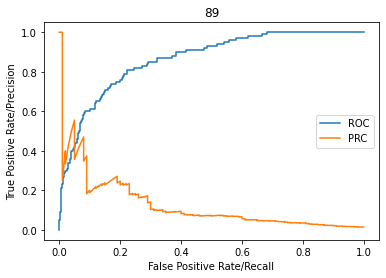

PRC AUC:0.12438934557892603
ROC AUC:0.8638434343434344


In [874]:
fpr90, tpr90, thresholds90 = roc_curve(Y_test[:,89], probs[:,89])
prec90, recall90, thresholds90 = precision_recall_curve(Y_test[:,89], probs[:,89])

plt.plot(fpr90,tpr90,label="ROC")
plt.plot(recall90,prec90,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('89')
plt.show()

print("PRC AUC:" + str(auc(recall90, prec90)))
print("ROC AUC:" + str(auc(fpr90, tpr90)))

In [875]:
score_true_90=[]

In [876]:
for x in range(0,iteration):
  if probs[x][89]>=0.5:
    score_true_90.append(1)
  else:
    score_true_90.append(0)

score_true_90

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [877]:
score_true_correct_index_90_LCS=[]
score_true_wrong_index_90_LCS=[]

In [878]:
for x in range(0,iteration):
  if score_true_90[x]!=Y_test[x,89]:
    score_true_wrong_index_90_LCS.append(x+1)
  else:
    score_true_correct_index_90_LCS.append(x+1)

In [879]:
correct_89=len(score_true_correct_index_90_LCS)
accuracy_90=correct_89/iteration

###**90-99**

#### Class 90

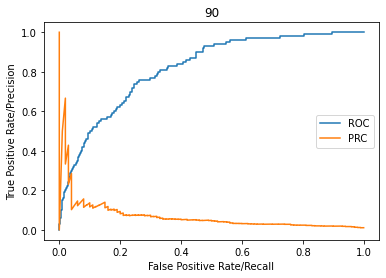

PRC AUC:0.06553574720741605
ROC AUC:0.8170161616161615


In [880]:
fpr91, tpr91, thresholds91 = roc_curve(Y_test[:,90], probs[:,90])
prec91, recall91, thresholds91 = precision_recall_curve(Y_test[:,90], probs[:,90])

plt.plot(fpr91,tpr91,label="ROC")
plt.plot(recall91,prec91,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('90')
plt.show()

print("PRC AUC:" + str(auc(recall91, prec91)))
print("ROC AUC:" + str(auc(fpr91, tpr91)))

In [881]:
score_true_91=[]

In [882]:
for x in range(0,iteration):
  if probs[x][90]>=0.5:
    score_true_91.append(1)
  else:
    score_true_91.append(0)

score_true_91

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [883]:
score_true_correct_index_91_LCS=[]
score_true_wrong_index_91_LCS=[]

In [884]:
for x in range(0,iteration):
  if score_true_91[x]!=Y_test[x,90]:
    score_true_wrong_index_91_LCS.append(x+1)
  else:
    score_true_correct_index_91_LCS.append(x+1)

In [885]:
correct_90=len(score_true_correct_index_91_LCS)
accuracy_91=correct_90/iteration

#### Class 91

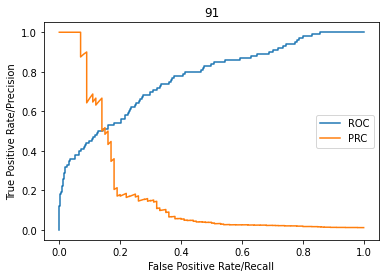

PRC AUC:0.1828603196601835
ROC AUC:0.7702030303030303


In [886]:
fpr92, tpr92, thresholds92 = roc_curve(Y_test[:,91], probs[:, 91])
prec92, recall92, thresholds92 = precision_recall_curve(Y_test[:,91], probs[:, 91])

plt.plot(fpr92,tpr92,label="ROC")
plt.plot(recall92,prec92,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('91')
plt.show()

print("PRC AUC:" + str(auc(recall92, prec92)))
print("ROC AUC:" + str(auc(fpr92, tpr92)))

In [887]:
score_true_92=[]

In [888]:
for x in range(0,iteration):
  if probs[x][91]>=0.5:
    score_true_92.append(1)
  else:
    score_true_92.append(0)

score_true_92

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [889]:
score_true_correct_index_92_LCS=[]
score_true_wrong_index_92_LCS=[]

In [890]:
for x in range(0,iteration):
  if score_true_92[x]!=Y_test[x,91]:
    score_true_wrong_index_92_LCS.append(x+1)
  else:
    score_true_correct_index_92_LCS.append(x+1)

In [891]:
correct_91=len(score_true_correct_index_92_LCS)
accuracy_92=correct_91/iteration

#### Class 92

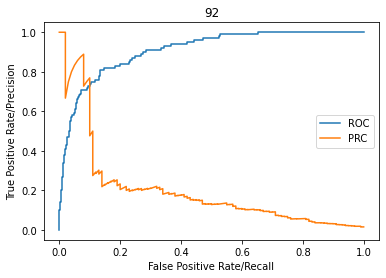

PRC AUC:0.20199710391528636
ROC AUC:0.9082474747474748


In [892]:
fpr93, tpr93, thresholds93 = roc_curve(Y_test[:,92], probs[:, 92])
prec93, recall93, thresholds93 = precision_recall_curve(Y_test[:,92], probs[:,92])

plt.plot(fpr93,tpr93,label="ROC")
plt.plot(recall93,prec93,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('92')
plt.show()

print("PRC AUC:" + str(auc(recall93, prec93)))
print("ROC AUC:" + str(auc(fpr93, tpr93)))

In [893]:
score_true_93=[]

In [894]:
for x in range(0,iteration):
  if probs[x][92]>=0.5:
    score_true_93.append(1)
  else:
    score_true_93.append(0)

score_true_93

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [895]:
score_true_correct_index_93_LCS=[]
score_true_wrong_index_93_LCS=[]

In [896]:
for x in range(0,iteration):
  if score_true_93[x]!=Y_test[x,92]:
    score_true_wrong_index_93_LCS.append(x+1)
  else:
    score_true_correct_index_93_LCS.append(x+1)

In [897]:
correct_92=len(score_true_correct_index_93_LCS)
accuracy_93=correct_92/iteration

#### Class 93

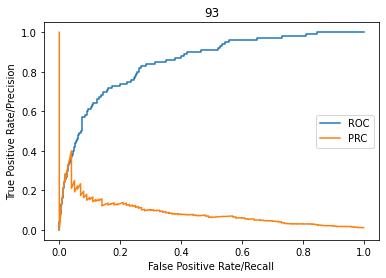

PRC AUC:0.08270996685139931
ROC AUC:0.850491919191919


In [898]:
fpr94, tpr94, thresholds94 = roc_curve(Y_test[:,93], probs[:, 93])
prec94, recall94, thresholds94 = precision_recall_curve(Y_test[:,93], probs[:, 93])

plt.plot(fpr94,tpr94,label="ROC")
plt.plot(recall94,prec94,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('93')
plt.show()

print("PRC AUC:" + str(auc(recall94, prec94)))
print("ROC AUC:" + str(auc(fpr94, tpr94)))

In [899]:
score_true_94=[]

In [900]:
for x in range(0,iteration):
  if probs[x][93]>=0.5:
    score_true_94.append(1)
  else:
    score_true_94.append(0)

score_true_94

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [901]:
score_true_correct_index_94_LCS=[]
score_true_wrong_index_94_LCS=[]

In [902]:
for x in range(0,iteration):
  if score_true_94[x]!=Y_test[x,93]:
    score_true_wrong_index_94_LCS.append(x+1)
  else:
    score_true_correct_index_94_LCS.append(x+1)

In [903]:
correct_93=len(score_true_correct_index_94_LCS)
accuracy_94=correct_93/iteration

#### Class 94

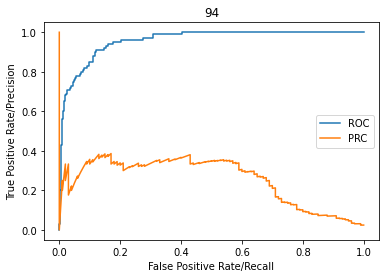

PRC AUC:0.2528882999045917
ROC AUC:0.9572090909090909


In [904]:
fpr95, tpr95, thresholds95 = roc_curve(Y_test[:,94], probs[:, 94])
prec95, recall95, thresholds95 = precision_recall_curve(Y_test[:,94], probs[:,94])

plt.plot(fpr95,tpr95,label="ROC")
plt.plot(recall95,prec95,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('94')
plt.show()

print("PRC AUC:" + str(auc(recall95, prec95)))
print("ROC AUC:" + str(auc(fpr95, tpr95)))

In [905]:
score_true_95=[]

In [906]:
for x in range(0,iteration):
  if probs[x][94]>=0.5:
    score_true_95.append(1)
  else:
    score_true_95.append(0)

score_true_95

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [907]:
score_true_correct_index_95_LCS=[]
score_true_wrong_index_95_LCS=[]

In [908]:
for x in range(0,iteration):
  if score_true_95[x]!=Y_test[x,94]:
    score_true_wrong_index_95_LCS.append(x+1)
  else:
    score_true_correct_index_95_LCS.append(x+1)

In [909]:
correct_94=len(score_true_correct_index_95_LCS)
accuracy_95=correct_94/iteration

#### Class 95

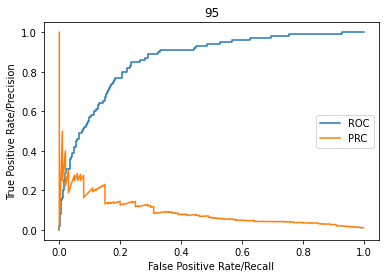

PRC AUC:0.09009744698141244
ROC AUC:0.8618191919191919


In [910]:
fpr96, tpr96, thresholds96 = roc_curve(Y_test[:,95], probs[:,95])
prec96, recall96, thresholds96 = precision_recall_curve(Y_test[:,95], probs[:,95])

plt.plot(fpr96,tpr96,label="ROC")
plt.plot(recall96,prec96,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('95')
plt.show()

print("PRC AUC:" + str(auc(recall96, prec96)))
print("ROC AUC:" + str(auc(fpr96, tpr96)))

In [911]:
score_true_96=[]

In [912]:
for x in range(0,iteration):
  if probs[x][95]>=0.5:
    score_true_96.append(1)
  else:
    score_true_96.append(0)

score_true_96

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [913]:
score_true_correct_index_96_LCS=[]
score_true_wrong_index_96_LCS=[]

In [914]:
for x in range(0,iteration):
  if score_true_96[x]!=Y_test[x,95]:
    score_true_wrong_index_96_LCS.append(x+1)
  else:
    score_true_correct_index_96_LCS.append(x+1)

In [915]:
correct_95=len(score_true_correct_index_96_LCS)
accuracy_96=correct_95/iteration

#### Class 96

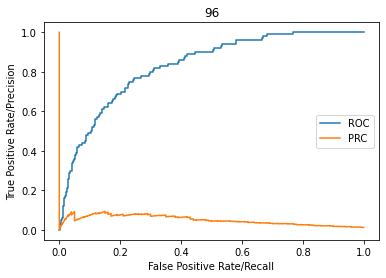

PRC AUC:0.049223956264092046
ROC AUC:0.8298919191919193


In [916]:
fpr97, tpr97, thresholds97 = roc_curve(Y_test[:,96], probs[:,96])
prec97, recall97, thresholds97 = precision_recall_curve(Y_test[:,96], probs[:,96])

plt.plot(fpr97,tpr97,label="ROC")
plt.plot(recall97,prec97,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('96')
plt.show()

print("PRC AUC:" + str(auc(recall97, prec97)))
print("ROC AUC:" + str(auc(fpr97, tpr97)))

In [917]:
score_true_97=[]

In [918]:
for x in range(0,iteration):
  if probs[x][96]>=0.5:
    score_true_97.append(1)
  else:
    score_true_97.append(0)

score_true_97

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [919]:
score_true_correct_index_97_LCS=[]
score_true_wrong_index_97_LCS=[]

In [920]:
for x in range(0,iteration):
  if score_true_97[x]!=Y_test[x,96]:
    score_true_wrong_index_97_LCS.append(x+1)
  else:
    score_true_correct_index_97_LCS.append(x+1)

In [921]:
correct_96=len(score_true_correct_index_97_LCS)
accuracy_97=correct_96/iteration

#### Class 97

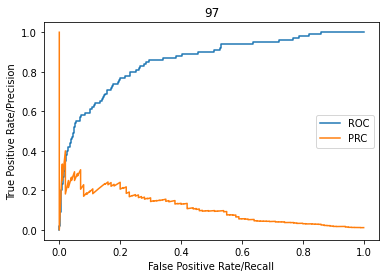

PRC AUC:0.1096652915665268
ROC AUC:0.853939393939394


In [922]:
fpr98, tpr98, thresholds98 = roc_curve(Y_test[:,97], probs[:, 97])
prec98, recall98, thresholds98 = precision_recall_curve(Y_test[:,97], probs[:,97])

plt.plot(fpr98,tpr98,label="ROC")
plt.plot(recall98,prec98,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('97')
plt.show()

print("PRC AUC:" + str(auc(recall98, prec98)))
print("ROC AUC:" + str(auc(fpr98, tpr98)))

In [923]:
score_true_98=[]

In [924]:
for x in range(0,iteration):
  if probs[x][97]>=0.5:
    score_true_98.append(1)
  else:
    score_true_98.append(0)

score_true_98

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [925]:
score_true_correct_index_98_LCS=[]
score_true_wrong_index_98_LCS=[]

In [926]:
for x in range(0,iteration):
  if score_true_98[x]!=Y_test[x,97]:
    score_true_wrong_index_98_LCS.append(x+1)
  else:
    score_true_correct_index_98_LCS.append(x+1)

In [927]:
correct_97=len(score_true_correct_index_98_LCS)
accuracy_98=correct_97/iteration

#### Class 98

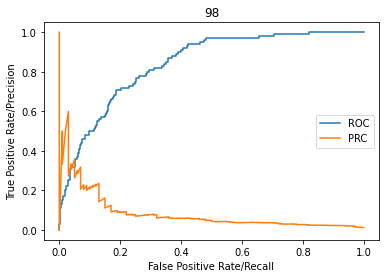

PRC AUC:0.08047756053283403
ROC AUC:0.8403393939393939


In [928]:
fpr99, tpr99, thresholds99 = roc_curve(Y_test[:,98], probs[:,98])
prec99, recall99, thresholds99 = precision_recall_curve(Y_test[:,98], probs[:,98])

plt.plot(fpr99,tpr99,label="ROC")
plt.plot(recall99,prec99,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('98')
plt.show()

print("PRC AUC:" + str(auc(recall99, prec99)))
print("ROC AUC:" + str(auc(fpr99, tpr99)))

In [929]:
score_true_99=[]

In [930]:
for x in range(0,iteration):
  if probs[x][98]>=0.5:
    score_true_99.append(1)
  else:
    score_true_99.append(0)

score_true_99

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [931]:
score_true_correct_index_99_LCS=[]
score_true_wrong_index_99_LCS=[]

In [932]:
for x in range(0,iteration):
  if score_true_99[x]!=Y_test[x,98]:
    score_true_wrong_index_99_LCS.append(x+1)
  else:
    score_true_correct_index_99_LCS.append(x+1)

In [933]:
correct_98=len(score_true_correct_index_99_LCS)
accuracy_99=correct_98/iteration

#### Class 99

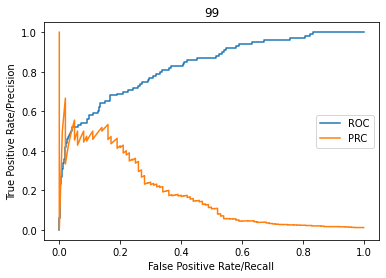

PRC AUC:0.1777822558087232
ROC AUC:0.8317030303030304


In [934]:
fpr100, tpr100, thresholds100 = roc_curve(Y_test[:,99], probs[:,99])
prec100, recall100, thresholds100 = precision_recall_curve(Y_test[:,99], probs[:,99])

plt.plot(fpr100,tpr100,label="ROC")
plt.plot(recall100,prec100,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('99')
plt.show()

print("PRC AUC:" + str(auc(recall100, prec100)))
print("ROC AUC:" + str(auc(fpr100, tpr100)))

In [935]:
score_true_100=[]

In [936]:
for x in range(0,iteration):
  if probs[x][99]>=0.5:
    score_true_100.append(1)
  else:
    score_true_100.append(0)

score_true_100

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [937]:
score_true_correct_index_100_LCS=[]
score_true_wrong_index_100_LCS=[]

In [938]:
for x in range(0,iteration):
  if score_true_100[x]!=Y_test[x,99]:
    score_true_wrong_index_100_LCS.append(x+1)
  else:
    score_true_correct_index_100_LCS.append(x+1)

In [939]:
correct_99=len(score_true_correct_index_100_LCS)
accuracy_100=correct_99/iteration

#**Black box instances**

In [940]:
correct='correct'
incorrect='incorrect'

##**0-19**

###**0-9**

####Class 0

In [941]:
correct_NN_1= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_0_correct.csv")
incorrect_NN_1=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_0_incorrect.csv")


#correct_NN_1= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_0_correct.csv")
#incorrect_NN_1=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_0_incorrect.csv")

correct_nn_1=correct_NN_1[correct].values
incorrect_nn_1=incorrect_NN_1[incorrect].values

In [942]:
correct_1n=len(correct_nn_1)
accuracy_1n=correct_1n/iteration

####Class 1

In [943]:
correct_NN_2= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_1_correct.csv")
incorrect_NN_2=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_1_incorrect.csv")

#correct_NN_2= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_1_correct.csv")
#incorrect_NN_2=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_1_incorrect.csv")

correct_nn_2=correct_NN_2[correct].values
incorrect_nn_2=incorrect_NN_2[incorrect].values

In [944]:
correct_2n=len(correct_nn_2)
accuracy_2n=correct_2n/iteration

####Class 2

In [945]:
correct_NN_3= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_2_correct.csv")
incorrect_NN_3=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_2_incorrect.csv")

#correct_NN_3= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_2_correct.csv")
#incorrect_NN_3=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_2_incorrect.csv")

correct_nn_3=correct_NN_3[correct].values
incorrect_nn_3=incorrect_NN_3[incorrect].values

In [946]:
correct_3n=len(correct_nn_3)
accuracy_3n=correct_3n/iteration

####Class 3

In [947]:
correct_NN_4= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_3_correct.csv")
incorrect_NN_4=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_3_incorrect.csv")

#correct_NN_4= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_3_correct.csv")
#incorrect_NN_4=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_3_incorrect.csv")

correct_nn_4=correct_NN_4[correct].values
incorrect_nn_4=incorrect_NN_4[incorrect].values

In [948]:
correct_4n=len(correct_nn_4)
accuracy_4n=correct_4n/iteration

####Class 4

In [949]:
correct_NN_5= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_4_correct.csv")
incorrect_NN_5=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_4_incorrect.csv")

#correct_NN_5= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_4_correct.csv")
#incorrect_NN_5=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_4_incorrect.csv")

correct_nn_5=correct_NN_5[correct].values
incorrect_nn_5=incorrect_NN_5[incorrect].values

In [950]:
correct_5n=len(correct_nn_5)
accuracy_5n=correct_5n/iteration

####Class 5

In [951]:
correct_NN_6= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_5_correct.csv")
incorrect_NN_6=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_5_incorrect.csv")

#correct_NN_6= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_5_correct.csv")
#incorrect_NN_6=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_5_incorrect.csv")

correct_nn_6=correct_NN_6[correct].values
incorrect_nn_6=incorrect_NN_6[incorrect].values

In [952]:
correct_6n=len(correct_nn_6)
accuracy_6n=correct_6n/iteration

####Class 6

In [953]:
correct_NN_7= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_6_correct.csv")
incorrect_NN_7=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_6_incorrect.csv")

#correct_NN_7= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_6_correct.csv")
#incorrect_NN_7=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_6_incorrect.csv")

correct_nn_7=correct_NN_7[correct].values
incorrect_nn_7=incorrect_NN_7[incorrect].values

In [954]:
correct_7n=len(correct_nn_7)
accuracy_7n=correct_7n/iteration

####Class 7

In [955]:
correct_NN_8= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_7_correct.csv")
incorrect_NN_8=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_7_incorrect.csv")

#correct_NN_8= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_7_correct.csv")
#incorrect_NN_8=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_7_incorrect.csv")

correct_nn_8=correct_NN_8[correct].values
incorrect_nn_8=incorrect_NN_8[incorrect].values

In [956]:
correct_8n=len(correct_nn_8)
accuracy_8n=correct_8n/iteration

####Class 8

In [957]:
correct_NN_9= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_8_correct.csv")
incorrect_NN_9=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_8_incorrect.csv")

#correct_NN_9= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_8_correct.csv")
#incorrect_NN_9=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_8_incorrect.csv")

correct_nn_9=correct_NN_9[correct].values
incorrect_nn_9=incorrect_NN_9[incorrect].values

In [958]:
correct_9n=len(correct_nn_9)
accuracy_9n=correct_9n/iteration

####Class 9

In [959]:
correct_NN_10= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_9_correct.csv")
incorrect_NN_10=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_9_incorrect.csv")

#correct_NN_10= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_9_correct.csv")
#incorrect_NN_10=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_9_incorrect.csv")

correct_nn_10=correct_NN_10[correct].values
incorrect_nn_10=incorrect_NN_10[incorrect].values

In [960]:
correct_10n=len(correct_nn_10)
accuracy_10n=correct_10n/iteration

###**10-19**

####Class 10

In [961]:
correct_NN_11= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_10_correct.csv")
incorrect_NN_11=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_10_incorrect.csv")


#correct_NN_11= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_10_correct.csv")
#incorrect_NN_11=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_10_incorrect.csv")

correct_nn_11=correct_NN_11[correct].values
incorrect_nn_11=incorrect_NN_11[incorrect].values

In [962]:
correct_11n=len(correct_nn_11)
accuracy_11n=correct_11n/iteration

####Class 11

In [963]:
correct_NN_12= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_11_correct.csv")
incorrect_NN_12=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_11_incorrect.csv")

#correct_NN_12= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_11_correct.csv")
#incorrect_NN_12=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_11_incorrect.csv")

correct_nn_12=correct_NN_12[correct].values
incorrect_nn_12=incorrect_NN_12[incorrect].values

In [964]:
correct_12n=len(correct_nn_12)
accuracy_12n=correct_12n/iteration

####Class 12

In [965]:
correct_NN_13= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_12_correct.csv")
incorrect_NN_13=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_12_incorrect.csv")

#correct_NN_13= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_12_correct.csv")
#incorrect_NN_13=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_12_incorrect.csv")

correct_nn_13=correct_NN_13[correct].values
incorrect_nn_13=incorrect_NN_13[incorrect].values

In [966]:
correct_13n=len(correct_nn_13)
accuracy_13n=correct_13n/iteration

####Class 13

In [967]:
correct_NN_14= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_13_correct.csv")
incorrect_NN_14=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_13_incorrect.csv")

#correct_NN_14= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_13_correct.csv")
#incorrect_NN_14=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_13_incorrect.csv")

correct_nn_14=correct_NN_14[correct].values
incorrect_nn_14=incorrect_NN_14[incorrect].values

In [968]:
correct_14n=len(correct_nn_14)
accuracy_14n=correct_14n/iteration

####Class 14

In [969]:
correct_NN_15= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_14_correct.csv")
incorrect_NN_15=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_14_incorrect.csv")

#correct_NN_15= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_14_correct.csv")
#incorrect_NN_15=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_14_incorrect.csv")

correct_nn_15=correct_NN_15[correct].values
incorrect_nn_15=incorrect_NN_15[incorrect].values

In [970]:
correct_15n=len(correct_nn_15)
accuracy_15n=correct_15n/iteration

####Class 15

In [971]:
correct_NN_16= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_15_correct.csv")
incorrect_NN_16=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_15_incorrect.csv")

#correct_NN_16= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_15_correct.csv")
#incorrect_NN_16=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_15_incorrect.csv")

correct_nn_16=correct_NN_16[correct].values
incorrect_nn_16=incorrect_NN_16[incorrect].values

In [972]:
correct_16n=len(correct_nn_16)
accuracy_16n=correct_16n/iteration

####Class 16

In [973]:
correct_NN_17= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_16_correct.csv")
incorrect_NN_17=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_16_incorrect.csv")

#correct_NN_17= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_16_correct.csv")
#incorrect_NN_17=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_16_incorrect.csv")

correct_nn_17=correct_NN_17[correct].values
incorrect_nn_17=incorrect_NN_17[incorrect].values

In [974]:
correct_17n=len(correct_nn_17)
accuracy_17n=correct_17n/iteration

####Class 17

In [975]:
correct_NN_18= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_17_correct.csv")
incorrect_NN_18=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_17_incorrect.csv")

#correct_NN_18= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_17_correct.csv")
#incorrect_NN_18=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_17_incorrect.csv")

correct_nn_18=correct_NN_18[correct].values
incorrect_nn_18=incorrect_NN_18[incorrect].values

In [976]:
correct_18n=len(correct_nn_18)
accuracy_18n=correct_18n/iteration

####Class 18

In [977]:
correct_NN_19= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_18_correct.csv")
incorrect_NN_19=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_18_incorrect.csv")

#correct_NN_19= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_18_correct.csv")
#incorrect_NN_19=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_18_incorrect.csv")

correct_nn_19=correct_NN_19[correct].values
incorrect_nn_19=incorrect_NN_19[incorrect].values

In [978]:
correct_19n=len(correct_nn_19)
accuracy_19n=correct_19n/iteration

####Class 19

In [979]:
correct_NN_20= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_19_correct.csv")
incorrect_NN_20=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_19_incorrect.csv")

#correct_NN_20= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_19_correct.csv")
#incorrect_NN_20=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_19_incorrect.csv")

correct_nn_20=correct_NN_20[correct].values
incorrect_nn_20=incorrect_NN_20[incorrect].values

In [980]:
correct_20n=len(correct_nn_20)
accuracy_20n=correct_20n/iteration

##**20-39**

###**20-29**

####Class 20

In [981]:
correct_NN_21= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_20_correct.csv")
incorrect_NN_21=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_20_incorrect.csv")


#correct_NN_21= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_20_correct.csv")
#incorrect_NN_21=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_20_incorrect.csv")

correct_nn_21=correct_NN_21[correct].values
incorrect_nn_21=incorrect_NN_21[incorrect].values

In [982]:
correct_21n=len(correct_nn_21)
accuracy_21n=correct_21n/iteration

####Class 21

In [983]:
correct_NN_22= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_21_correct.csv")
incorrect_NN_22=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_21_incorrect.csv")

#correct_NN_22= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_21_correct.csv")
#incorrect_NN_22=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_21_incorrect.csv")

correct_nn_22=correct_NN_22[correct].values
incorrect_nn_22=incorrect_NN_22[incorrect].values

In [984]:
correct_22n=len(correct_nn_22)
accuracy_22n=correct_22n/iteration

####Class 22

In [985]:
correct_NN_23= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_22_correct.csv")
incorrect_NN_23=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_22_incorrect.csv")

#correct_NN_23= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_22_correct.csv")
#incorrect_NN_23=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_22_incorrect.csv")

correct_nn_23=correct_NN_23[correct].values
incorrect_nn_23=incorrect_NN_23[incorrect].values

In [986]:
correct_23n=len(correct_nn_23)
accuracy_23n=correct_23n/iteration

####Class 23

In [987]:
correct_NN_24= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_23_correct.csv")
incorrect_NN_24=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_23_incorrect.csv")

#correct_NN_24= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_23_correct.csv")
#incorrect_NN_24=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_23_incorrect.csv")

correct_nn_24=correct_NN_24[correct].values
incorrect_nn_24=incorrect_NN_24[incorrect].values

In [988]:
correct_24n=len(correct_nn_24)
accuracy_24n=correct_24n/iteration

####Class 24

In [989]:
correct_NN_25= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_24_correct.csv")
incorrect_NN_25=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_24_incorrect.csv")

#correct_NN_25= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_24_correct.csv")
#incorrect_NN_25=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_24_incorrect.csv")

correct_nn_25=correct_NN_25[correct].values
incorrect_nn_25=incorrect_NN_25[incorrect].values

In [990]:
correct_25n=len(correct_nn_25)
accuracy_25n=correct_25n/iteration

####Class 25

In [991]:
correct_NN_26= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_25_correct.csv")
incorrect_NN_26=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_25_incorrect.csv")

#correct_NN_26= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_25_correct.csv")
#incorrect_NN_26=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_25_incorrect.csv")

correct_nn_26=correct_NN_26[correct].values
incorrect_nn_26=incorrect_NN_26[incorrect].values

In [992]:
correct_26n=len(correct_nn_26)
accuracy_26n=correct_26n/iteration

####Class 26

In [993]:
correct_NN_27= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_26_correct.csv")
incorrect_NN_27=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_26_incorrect.csv")

#correct_NN_27= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_26_correct.csv")
#incorrect_NN_27=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_26_incorrect.csv")

correct_nn_27=correct_NN_27[correct].values
incorrect_nn_27=incorrect_NN_27[incorrect].values

In [994]:
correct_27n=len(correct_nn_27)
accuracy_27n=correct_27n/iteration

####Class 27

In [995]:
correct_NN_28= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_27_correct.csv")
incorrect_NN_28=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_27_incorrect.csv")

#correct_NN_28= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_27_correct.csv")
#incorrect_NN_28=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_27_incorrect.csv")

correct_nn_28=correct_NN_28[correct].values
incorrect_nn_28=incorrect_NN_28[incorrect].values

In [996]:
correct_28n=len(correct_nn_28)
accuracy_28n=correct_28n/iteration

####Class 28

In [997]:
correct_NN_29= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_28_correct.csv")
incorrect_NN_29=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_28_incorrect.csv")

#correct_NN_29= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_28_correct.csv")
#incorrect_NN_29=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_28_incorrect.csv")

correct_nn_29=correct_NN_29[correct].values
incorrect_nn_29=incorrect_NN_29[incorrect].values

In [998]:
correct_29n=len(correct_nn_29)
accuracy_29n=correct_29n/iteration

####Class 29

In [999]:
correct_NN_30= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_29_correct.csv")
incorrect_NN_30=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_29_incorrect.csv")

#correct_NN_30= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_29_correct.csv")
#incorrect_NN_30=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_29_incorrect.csv")

correct_nn_30=correct_NN_30[correct].values
incorrect_nn_30=incorrect_NN_30[incorrect].values

In [1000]:
correct_30n=len(correct_nn_30)
accuracy_30n=correct_30n/iteration

###**30-39**

####Class 30

In [1001]:
correct_NN_31= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_30_correct.csv")
incorrect_NN_31=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_30_incorrect.csv")


#correct_NN_31= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_30_correct.csv")
#incorrect_NN_31=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_30_incorrect.csv")

correct_nn_31=correct_NN_31[correct].values
incorrect_nn_31=incorrect_NN_31[incorrect].values

In [1002]:
correct_31n=len(correct_nn_31)
accuracy_31n=correct_31n/iteration

####Class 31

In [1003]:
correct_NN_32= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_31_correct.csv")
incorrect_NN_32=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_31_incorrect.csv")

#correct_NN_32= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_31_correct.csv")
#incorrect_NN_32=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_31_incorrect.csv")

correct_nn_32=correct_NN_32[correct].values
incorrect_nn_32=incorrect_NN_32[incorrect].values

In [1004]:
correct_32n=len(correct_nn_32)
accuracy_32n=correct_32n/iteration

####Class 32

In [1005]:
correct_NN_33= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_32_correct.csv")
incorrect_NN_33=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_32_incorrect.csv")

#correct_NN_33= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_32_correct.csv")
#incorrect_NN_33=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_32_incorrect.csv")

correct_nn_33=correct_NN_33[correct].values
incorrect_nn_33=incorrect_NN_33[incorrect].values

In [1006]:
correct_33n=len(correct_nn_33)
accuracy_33n=correct_33n/iteration

####Class 33

In [1007]:
correct_NN_34= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_33_correct.csv")
incorrect_NN_34=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_33_incorrect.csv")

#correct_NN_34= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_33_correct.csv")
#incorrect_NN_34=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_33_incorrect.csv")

correct_nn_34=correct_NN_34[correct].values
incorrect_nn_34=incorrect_NN_34[incorrect].values

In [1008]:
correct_34n=len(correct_nn_34)
accuracy_34n=correct_34n/iteration

####Class 34

In [1009]:
correct_NN_35= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_34_correct.csv")
incorrect_NN_35=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_34_incorrect.csv")

#correct_NN_35= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_34_correct.csv")
#incorrect_NN_35=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_34_incorrect.csv")

correct_nn_35=correct_NN_35[correct].values
incorrect_nn_35=incorrect_NN_35[incorrect].values

In [1010]:
correct_35n=len(correct_nn_35)
accuracy_35n=correct_35n/iteration

####Class 35

In [1011]:
correct_NN_36= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_35_correct.csv")
incorrect_NN_36=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_35_incorrect.csv")

#correct_NN_36= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_35_correct.csv")
#incorrect_NN_36=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_35_incorrect.csv")

correct_nn_36=correct_NN_36[correct].values
incorrect_nn_36=incorrect_NN_36[incorrect].values

In [1012]:
correct_36n=len(correct_nn_36)
accuracy_36n=correct_36n/iteration

####Class 36

In [1013]:
correct_NN_37= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_36_correct.csv")
incorrect_NN_37=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_36_incorrect.csv")

#correct_NN_37= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_36_correct.csv")
#incorrect_NN_37=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_36_incorrect.csv")

correct_nn_37=correct_NN_37[correct].values
incorrect_nn_37=incorrect_NN_37[incorrect].values

In [1014]:
correct_37n=len(correct_nn_37)
accuracy_37n=correct_37n/iteration

####Class 37

In [1015]:
correct_NN_38= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_37_correct.csv")
incorrect_NN_38=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_37_incorrect.csv")

#correct_NN_38= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_37_correct.csv")
#incorrect_NN_38=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_37_incorrect.csv")

correct_nn_38=correct_NN_38[correct].values
incorrect_nn_38=incorrect_NN_38[incorrect].values

In [1016]:
correct_38n=len(correct_nn_38)
accuracy_38n=correct_38n/iteration

####Class 38

In [1017]:
correct_NN_39= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_38_correct.csv")
incorrect_NN_39=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_38_incorrect.csv")

#correct_NN_39= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_38_correct.csv")
#incorrect_NN_39=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_38_incorrect.csv")

correct_nn_39=correct_NN_39[correct].values
incorrect_nn_39=incorrect_NN_39[incorrect].values

In [1018]:
correct_39n=len(correct_nn_39)
accuracy_39n=correct_39n/iteration

####Class 39

In [1019]:
correct_NN_40= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_39_correct.csv")
incorrect_NN_40=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_39_incorrect.csv")

#correct_NN_40= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_39_correct.csv")
#incorrect_NN_40=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_39_incorrect.csv")

correct_nn_40=correct_NN_40[correct].values
incorrect_nn_40=incorrect_NN_40[incorrect].values

In [1020]:
correct_40n=len(correct_nn_40)
accuracy_40n=correct_40n/iteration

##**40-59**

###**40-49**

####Class 40

In [1021]:
correct_NN_41= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_40_correct.csv")
incorrect_NN_41=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_40_incorrect.csv")


#correct_NN_41= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_40_correct.csv")
#incorrect_NN_41=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_40_incorrect.csv")

correct_nn_41=correct_NN_41[correct].values
incorrect_nn_41=incorrect_NN_41[incorrect].values

In [1022]:
correct_41n=len(correct_nn_41)
accuracy_41n=correct_41n/iteration

####Class 41

In [1023]:
correct_NN_42= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_41_correct.csv")
incorrect_NN_42=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_41_incorrect.csv")

#correct_NN_42= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_41_correct.csv")
#incorrect_NN_42=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_41_incorrect.csv")

correct_nn_42=correct_NN_42[correct].values
incorrect_nn_42=incorrect_NN_42[incorrect].values

In [1024]:
correct_42n=len(correct_nn_42)
accuracy_42n=correct_42n/iteration

####Class 42

In [1025]:
correct_NN_43= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_42_correct.csv")
incorrect_NN_43=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_42_incorrect.csv")

#correct_NN_43= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_42_correct.csv")
#incorrect_NN_43=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_42_incorrect.csv")

correct_nn_43=correct_NN_43[correct].values
incorrect_nn_43=incorrect_NN_43[incorrect].values

In [1026]:
correct_43n=len(correct_nn_43)
accuracy_43n=correct_43n/iteration

####Class 43

In [1027]:
correct_NN_44= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_43_correct.csv")
incorrect_NN_44=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_43_incorrect.csv")

#correct_NN_44= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_43_correct.csv")
#incorrect_NN_44=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_43_incorrect.csv")

correct_nn_44=correct_NN_44[correct].values
incorrect_nn_44=incorrect_NN_44[incorrect].values

In [1028]:
correct_44n=len(correct_nn_44)
accuracy_44n=correct_44n/iteration

####Class 44

In [1029]:
correct_NN_45= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_44_correct.csv")
incorrect_NN_45=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_44_incorrect.csv")

#correct_NN_45= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_44_correct.csv")
#incorrect_NN_45=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_44_incorrect.csv")

correct_nn_45=correct_NN_45[correct].values
incorrect_nn_45=incorrect_NN_45[incorrect].values

In [1030]:
correct_45n=len(correct_nn_45)
accuracy_45n=correct_45n/iteration

####Class 45

In [1031]:
correct_NN_46= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_45_correct.csv")
incorrect_NN_46=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_45_incorrect.csv")

#correct_NN_46= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_45_correct.csv")
#incorrect_NN_46=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_45_incorrect.csv")

correct_nn_46=correct_NN_46[correct].values
incorrect_nn_46=incorrect_NN_46[incorrect].values

In [1032]:
correct_46n=len(correct_nn_46)
accuracy_46n=correct_46n/iteration

####Class 46

In [1033]:
correct_NN_47= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_46_correct.csv")
incorrect_NN_47=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_46_incorrect.csv")

#correct_NN_47= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_46_correct.csv")
#incorrect_NN_47=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_46_incorrect.csv")

correct_nn_47=correct_NN_47[correct].values
incorrect_nn_47=incorrect_NN_47[incorrect].values

In [1034]:
correct_47n=len(correct_nn_47)
accuracy_47n=correct_47n/iteration

####Class 47

In [1035]:
correct_NN_48= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_47_correct.csv")
incorrect_NN_48=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_47_incorrect.csv")

#correct_NN_48= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_47_correct.csv")
#incorrect_NN_48=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_47_incorrect.csv")

correct_nn_48=correct_NN_48[correct].values
incorrect_nn_48=incorrect_NN_48[incorrect].values

In [1036]:
correct_48n=len(correct_nn_48)
accuracy_48n=correct_48n/iteration

####Class 48

In [1037]:
correct_NN_49= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_48_correct.csv")
incorrect_NN_49=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_48_incorrect.csv")

#correct_NN_49= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_48_correct.csv")
#incorrect_NN_49=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_48_incorrect.csv")

correct_nn_49=correct_NN_49[correct].values
incorrect_nn_49=incorrect_NN_49[incorrect].values

In [1038]:
correct_49n=len(correct_nn_49)
accuracy_49n=correct_49n/iteration

####Class 49

In [1039]:
correct_NN_50= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_49_correct.csv")
incorrect_NN_50=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_49_incorrect.csv")

#correct_NN_50= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_49_correct.csv")
#incorrect_NN_50=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_49_incorrect.csv")

correct_nn_50=correct_NN_50[correct].values
incorrect_nn_50=incorrect_NN_50[incorrect].values

In [1040]:
correct_50n=len(correct_nn_50)
accuracy_50n=correct_50n/iteration

###**50-59**

####Class 50

In [1041]:
correct_NN_51= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_50_correct.csv")
incorrect_NN_51=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_50_incorrect.csv")


#correct_NN_51= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_50_correct.csv")
#incorrect_NN_51=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_50_incorrect.csv")

correct_nn_51=correct_NN_51[correct].values
incorrect_nn_51=incorrect_NN_51[incorrect].values

In [1042]:
correct_51n=len(correct_nn_51)
accuracy_51n=correct_51n/iteration

####Class 51

In [1043]:
correct_NN_52= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_51_correct.csv")
incorrect_NN_52=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_51_incorrect.csv")

#correct_NN_52= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_51_correct.csv")
#incorrect_NN_52=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_51_incorrect.csv")

correct_nn_52=correct_NN_52[correct].values
incorrect_nn_52=incorrect_NN_52[incorrect].values

In [1044]:
correct_52n=len(correct_nn_52)
accuracy_52n=correct_52n/iteration

####Class 52

In [1045]:
correct_NN_53= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_52_correct.csv")
incorrect_NN_53=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_52_incorrect.csv")

#correct_NN_53= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_52_correct.csv")
#incorrect_NN_53=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_52_incorrect.csv")

correct_nn_53=correct_NN_53[correct].values
incorrect_nn_53=incorrect_NN_53[incorrect].values

In [1046]:
correct_53n=len(correct_nn_53)
accuracy_53n=correct_53n/iteration

####Class 53

In [1047]:
correct_NN_54= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_53_correct.csv")
incorrect_NN_54=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_53_incorrect.csv")

#correct_NN_54= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_53_correct.csv")
#incorrect_NN_54=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_53_incorrect.csv")

correct_nn_54=correct_NN_54[correct].values
incorrect_nn_54=incorrect_NN_54[incorrect].values

In [1048]:
correct_54n=len(correct_nn_54)
accuracy_54n=correct_54n/iteration

####Class 54

In [1049]:
correct_NN_55= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_54_correct.csv")
incorrect_NN_55=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_54_incorrect.csv")

#correct_NN_55= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_54_correct.csv")
#incorrect_NN_55=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_54_incorrect.csv")

correct_nn_55=correct_NN_55[correct].values
incorrect_nn_55=incorrect_NN_55[incorrect].values

In [1050]:
correct_55n=len(correct_nn_55)
accuracy_55n=correct_55n/iteration

####Class 55

In [1051]:
correct_NN_56= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_55_correct.csv")
incorrect_NN_56=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_55_incorrect.csv")

#correct_NN_56= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_55_correct.csv")
#incorrect_NN_56=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_55_incorrect.csv")

correct_nn_56=correct_NN_56[correct].values
incorrect_nn_56=incorrect_NN_56[incorrect].values

In [1052]:
correct_56n=len(correct_nn_56)
accuracy_56n=correct_56n/iteration

####Class 56

In [1053]:
correct_NN_57= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_56_correct.csv")
incorrect_NN_57=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_56_incorrect.csv")

#correct_NN_57= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_56_correct.csv")
#incorrect_NN_57=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_56_incorrect.csv")

correct_nn_57=correct_NN_57[correct].values
incorrect_nn_57=incorrect_NN_57[incorrect].values

In [1054]:
correct_57n=len(correct_nn_57)
accuracy_57n=correct_57n/iteration

####Class 57

In [1055]:
correct_NN_58= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_57_correct.csv")
incorrect_NN_58=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_57_incorrect.csv")

#correct_NN_38= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_57_correct.csv")
#incorrect_NN_38=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_57_incorrect.csv")

correct_nn_58=correct_NN_58[correct].values
incorrect_nn_58=incorrect_NN_58[incorrect].values

In [1056]:
correct_58n=len(correct_nn_58)
accuracy_58n=correct_58n/iteration

####Class 58

In [1057]:
correct_NN_59= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_58_correct.csv")
incorrect_NN_59=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_58_incorrect.csv")

#correct_NN_59= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_58_correct.csv")
#incorrect_NN_59=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_58_incorrect.csv")

correct_nn_59=correct_NN_59[correct].values
incorrect_nn_59=incorrect_NN_59[incorrect].values

In [1058]:
correct_59n=len(correct_nn_59)
accuracy_59n=correct_59n/iteration

####Class 59

In [1059]:
correct_NN_60= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_59_correct.csv")
incorrect_NN_60=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_59_incorrect.csv")

#correct_NN_60= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_59_correct.csv")
#incorrect_NN_60=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_59_incorrect.csv")

correct_nn_60=correct_NN_60[correct].values
incorrect_nn_60=incorrect_NN_60[incorrect].values

In [1060]:
correct_60n=len(correct_nn_60)
accuracy_60n=correct_60n/iteration

##**60-79**

###**60-69**

####Class 60

In [1061]:
correct_NN_61= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_60_correct.csv")
incorrect_NN_61=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_60_incorrect.csv")


#correct_NN_61= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_60_correct.csv")
#incorrect_NN_61=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_60_incorrect.csv")

correct_nn_61=correct_NN_61[correct].values
incorrect_nn_61=incorrect_NN_61[incorrect].values

In [1062]:
correct_61n=len(correct_nn_61)
accuracy_61n=correct_61n/iteration

####Class 61

In [1063]:
correct_NN_62= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_61_correct.csv")
incorrect_NN_62=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_61_incorrect.csv")

#correct_NN_62= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_61_correct.csv")
#incorrect_NN_62=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_61_incorrect.csv")

correct_nn_62=correct_NN_62[correct].values
incorrect_nn_62=incorrect_NN_62[incorrect].values

In [1064]:
correct_62n=len(correct_nn_62)
accuracy_62n=correct_62n/iteration

####Class 62

In [1065]:
correct_NN_63= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_62_correct.csv")
incorrect_NN_63=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_62_incorrect.csv")

#correct_NN_63= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_62_correct.csv")
#incorrect_NN_63=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_62_incorrect.csv")

correct_nn_63=correct_NN_63[correct].values
incorrect_nn_63=incorrect_NN_63[incorrect].values

In [1066]:
correct_63n=len(correct_nn_63)
accuracy_63n=correct_63n/iteration

####Class 63

In [1067]:
correct_NN_64= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_63_correct.csv")
incorrect_NN_64=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_63_incorrect.csv")

#correct_NN_64= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_63_correct.csv")
#incorrect_NN_64=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_63_incorrect.csv")

correct_nn_64=correct_NN_64[correct].values
incorrect_nn_64=incorrect_NN_64[incorrect].values

In [1068]:
correct_64n=len(correct_nn_64)
accuracy_64n=correct_64n/iteration

####Class 64

In [1069]:
correct_NN_65= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_64_correct.csv")
incorrect_NN_65=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_64_incorrect.csv")

#correct_NN_65= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_64_correct.csv")
#incorrect_NN_65=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_64_incorrect.csv")

correct_nn_65=correct_NN_65[correct].values
incorrect_nn_65=incorrect_NN_65[incorrect].values

In [1070]:
correct_65n=len(correct_nn_65)
accuracy_65n=correct_65n/iteration

####Class 65

In [1071]:
correct_NN_66= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_65_correct.csv")
incorrect_NN_66=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_65_incorrect.csv")

#correct_NN_66= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_65_correct.csv")
#incorrect_NN_66=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_65_incorrect.csv")

correct_nn_66=correct_NN_66[correct].values
incorrect_nn_66=incorrect_NN_66[incorrect].values

In [1072]:
correct_66n=len(correct_nn_66)
accuracy_66n=correct_66n/iteration

####Class 66

In [1073]:
correct_NN_67= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_66_correct.csv")
incorrect_NN_67=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_66_incorrect.csv")

#correct_NN_67= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_66_correct.csv")
#incorrect_NN_67=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_66_incorrect.csv")

correct_nn_67=correct_NN_67[correct].values
incorrect_nn_67=incorrect_NN_67[incorrect].values

In [1074]:
correct_67n=len(correct_nn_67)
accuracy_67n=correct_67n/iteration

####Class 67

In [1075]:
correct_NN_68= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_67_correct.csv")
incorrect_NN_68=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_67_incorrect.csv")

#correct_NN_68= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_67_correct.csv")
#incorrect_NN_68=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_67_incorrect.csv")

correct_nn_68=correct_NN_68[correct].values
incorrect_nn_68=incorrect_NN_68[incorrect].values

In [1076]:
correct_68n=len(correct_nn_68)
accuracy_68n=correct_68n/iteration

####Class 68

In [1077]:
correct_NN_69= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_68_correct.csv")
incorrect_NN_69=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_68_incorrect.csv")

#correct_NN_69= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_68_correct.csv")
#incorrect_NN_69=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_68_incorrect.csv")

correct_nn_69=correct_NN_69[correct].values
incorrect_nn_69=incorrect_NN_69[incorrect].values

In [1078]:
correct_69n=len(correct_nn_69)
accuracy_69n=correct_69n/iteration

####Class 69

In [1079]:
correct_NN_70= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_69_correct.csv")
incorrect_NN_70=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_69_incorrect.csv")

#correct_NN_70= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_69_correct.csv")
#incorrect_NN_70=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_69_incorrect.csv")

correct_nn_70=correct_NN_70[correct].values
incorrect_nn_70=incorrect_NN_70[incorrect].values

In [1080]:
correct_70n=len(correct_nn_70)
accuracy_70n=correct_70n/iteration

###**70-79**

####Class 70

In [1081]:
correct_NN_71= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_70_correct.csv")
incorrect_NN_71=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_70_incorrect.csv")


#correct_NN_71= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_70_correct.csv")
#incorrect_NN_71=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_70_incorrect.csv")

correct_nn_71=correct_NN_71[correct].values
incorrect_nn_71=incorrect_NN_71[incorrect].values

In [1082]:
correct_71n=len(correct_nn_71)
accuracy_71n=correct_71n/iteration

####Class 71

In [1083]:
correct_NN_72= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_71_correct.csv")
incorrect_NN_72=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_71_incorrect.csv")

#correct_NN_72= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_71_correct.csv")
#incorrect_NN_72=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_71_incorrect.csv")

correct_nn_72=correct_NN_72[correct].values
incorrect_nn_72=incorrect_NN_72[incorrect].values

In [1084]:
correct_72n=len(correct_nn_72)
accuracy_72n=correct_72n/iteration

####Class 72

In [1085]:
correct_NN_73= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_72_correct.csv")
incorrect_NN_73=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_72_incorrect.csv")

#correct_NN_73= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_72_correct.csv")
#incorrect_NN_73=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_72_incorrect.csv")

correct_nn_73=correct_NN_73[correct].values
incorrect_nn_73=incorrect_NN_73[incorrect].values

In [1086]:
correct_73n=len(correct_nn_73)
accuracy_73n=correct_73n/iteration

####Class 73

In [1087]:
correct_NN_74= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_73_correct.csv")
incorrect_NN_74=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_73_incorrect.csv")

#correct_NN_74= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_73_correct.csv")
#incorrect_NN_74=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_73_incorrect.csv")

correct_nn_74=correct_NN_74[correct].values
incorrect_nn_74=incorrect_NN_74[incorrect].values

In [1088]:
correct_74n=len(correct_nn_74)
accuracy_74n=correct_74n/iteration

####Class 74

In [1089]:
correct_NN_75= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_74_correct.csv")
incorrect_NN_75=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_74_incorrect.csv")

#correct_NN_75= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_74_correct.csv")
#incorrect_NN_75=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_74_incorrect.csv")

correct_nn_75=correct_NN_75[correct].values
incorrect_nn_75=incorrect_NN_75[incorrect].values

In [1090]:
correct_75n=len(correct_nn_75)
accuracy_75n=correct_75n/iteration

####Class 75

In [1091]:
correct_NN_76= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_75_correct.csv")
incorrect_NN_76=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_75_incorrect.csv")

#correct_NN_76= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_75_correct.csv")
#incorrect_NN_76=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_75_incorrect.csv")

correct_nn_76=correct_NN_76[correct].values
incorrect_nn_76=incorrect_NN_76[incorrect].values

In [1092]:
correct_76n=len(correct_nn_76)
accuracy_76n=correct_76n/iteration

####Class 76

In [1093]:
correct_NN_77= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_76_correct.csv")
incorrect_NN_77=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_76_incorrect.csv")

#correct_NN_77= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_76_correct.csv")
#incorrect_NN_77=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_76_incorrect.csv")

correct_nn_77=correct_NN_77[correct].values
incorrect_nn_77=incorrect_NN_77[incorrect].values

In [1094]:
correct_77n=len(correct_nn_77)
accuracy_77n=correct_77n/iteration

####Class 77

In [1095]:
correct_NN_78= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_77_correct.csv")
incorrect_NN_78=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_77_incorrect.csv")

#correct_NN_78= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_77_correct.csv")
#incorrect_NN_78=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_77_incorrect.csv")

correct_nn_78=correct_NN_78[correct].values
incorrect_nn_78=incorrect_NN_78[incorrect].values

In [1096]:
correct_78n=len(correct_nn_78)
accuracy_78n=correct_78n/iteration

####Class 78

In [1097]:
correct_NN_79= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_78_correct.csv")
incorrect_NN_79=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_78_incorrect.csv")

#correct_NN_79= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_78_correct.csv")
#incorrect_NN_79=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_78_incorrect.csv")

correct_nn_79=correct_NN_79[correct].values
incorrect_nn_79=incorrect_NN_79[incorrect].values

In [1098]:
correct_79n=len(correct_nn_79)
accuracy_79n=correct_79n/iteration

####Class 79

In [1099]:
correct_NN_80= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_79_correct.csv")
incorrect_NN_80=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_79_incorrect.csv")

#correct_NN_80= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_79_correct.csv")
#incorrect_NN_80=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_79_incorrect.csv")

correct_nn_80=correct_NN_80[correct].values
incorrect_nn_80=incorrect_NN_80[incorrect].values

In [1100]:
correct_80n=len(correct_nn_80)
accuracy_80n=correct_80n/iteration

##**80-99**

###**80-89**

####Class 80

In [1101]:
correct_NN_81= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_80_correct.csv")
incorrect_NN_81=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_80_incorrect.csv")


#correct_NN_81= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_80_correct.csv")
#incorrect_NN_81=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_80_incorrect.csv")

correct_nn_81=correct_NN_81[correct].values
incorrect_nn_81=incorrect_NN_81[incorrect].values

In [1102]:
correct_81n=len(correct_nn_81)
accuracy_81n=correct_81n/iteration

####Class 81

In [1103]:
correct_NN_82= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_81_correct.csv")
incorrect_NN_82=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_81_incorrect.csv")

#correct_NN_82= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_81_correct.csv")
#incorrect_NN_82=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_81_incorrect.csv")

correct_nn_82=correct_NN_82[correct].values
incorrect_nn_82=incorrect_NN_82[incorrect].values

In [1104]:
correct_82n=len(correct_nn_82)
accuracy_82n=correct_82n/iteration

####Class 82

In [1105]:
correct_NN_83= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_82_correct.csv")
incorrect_NN_83=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_82_incorrect.csv")

#correct_NN_83= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_82_correct.csv")
#incorrect_NN_83=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_82_incorrect.csv")

correct_nn_83=correct_NN_83[correct].values
incorrect_nn_83=incorrect_NN_83[incorrect].values

In [1106]:
correct_83n=len(correct_nn_83)
accuracy_83n=correct_83n/iteration

####Class 83

In [1107]:
correct_NN_84= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_83_correct.csv")
incorrect_NN_84=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_83_incorrect.csv")

#correct_NN_84= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_83_correct.csv")
#incorrect_NN_84=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_83_incorrect.csv")

correct_nn_84=correct_NN_84[correct].values
incorrect_nn_84=incorrect_NN_84[incorrect].values

In [1108]:
correct_84n=len(correct_nn_84)
accuracy_84n=correct_84n/iteration

####Class 84

In [1109]:
correct_NN_85= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_84_correct.csv")
incorrect_NN_85=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_84_incorrect.csv")

#correct_NN_85= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_84_correct.csv")
#incorrect_NN_85=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_84_incorrect.csv")

correct_nn_85=correct_NN_85[correct].values
incorrect_nn_85=incorrect_NN_85[incorrect].values

In [1110]:
correct_85n=len(correct_nn_85)
accuracy_85n=correct_85n/iteration

####Class 85

In [1111]:
correct_NN_86= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_85_correct.csv")
incorrect_NN_86=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_85_incorrect.csv")

#correct_NN_86= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_85_correct.csv")
#incorrect_NN_86=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_85_incorrect.csv")

correct_nn_86=correct_NN_86[correct].values
incorrect_nn_86=incorrect_NN_86[incorrect].values

In [1112]:
correct_86n=len(correct_nn_86)
accuracy_86n=correct_86n/iteration

####Class 86

In [1113]:
correct_NN_87= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_86_correct.csv")
incorrect_NN_87=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_86_incorrect.csv")

#correct_NN_87= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_86_correct.csv")
#incorrect_NN_87=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_86_incorrect.csv")

correct_nn_87=correct_NN_87[correct].values
incorrect_nn_87=incorrect_NN_87[incorrect].values

In [1114]:
correct_87n=len(correct_nn_87)
accuracy_87n=correct_87n/iteration

####Class 87

In [1115]:
correct_NN_88= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_87_correct.csv")
incorrect_NN_88=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_87_incorrect.csv")

#correct_NN_88= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_87_correct.csv")
#incorrect_NN_88=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_87_incorrect.csv")

correct_nn_88=correct_NN_88[correct].values
incorrect_nn_88=incorrect_NN_88[incorrect].values

In [1116]:
correct_88n=len(correct_nn_88)
accuracy_88n=correct_88n/iteration

####Class 88

In [1117]:
correct_NN_89= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_88_correct.csv")
incorrect_NN_89=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_88_incorrect.csv")

#correct_NN_89= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_88_correct.csv")
#incorrect_NN_89=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_88_incorrect.csv")

correct_nn_89=correct_NN_89[correct].values
incorrect_nn_89=incorrect_NN_89[incorrect].values

In [1118]:
correct_89n=len(correct_nn_89)
accuracy_89n=correct_89n/iteration

####Class 89

In [1119]:
correct_NN_90= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_89_correct.csv")
incorrect_NN_90=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_89_incorrect.csv")

#correct_NN_90= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_89_correct.csv")
#incorrect_NN_90=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_89_incorrect.csv")

correct_nn_90=correct_NN_90[correct].values
incorrect_nn_90=incorrect_NN_90[incorrect].values

In [1120]:
correct_90n=len(correct_nn_90)
accuracy_90n=correct_90n/iteration

###**90-99**

####Class 90

In [1121]:
correct_NN_91= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_90_correct.csv")
incorrect_NN_91=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_90_incorrect.csv")


#correct_NN_91= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_90_correct.csv")
#incorrect_NN_91=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_90_incorrect.csv")

correct_nn_91=correct_NN_91[correct].values
incorrect_nn_91=incorrect_NN_91[incorrect].values

In [1122]:
correct_91n=len(correct_nn_91)
accuracy_91n=correct_91n/iteration

####Class 91

In [1123]:
correct_NN_92= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_91_correct.csv")
incorrect_NN_92=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_91_incorrect.csv")

#correct_NN_92= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_91_correct.csv")
#incorrect_NN_92=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_91_incorrect.csv")

correct_nn_92=correct_NN_92[correct].values
incorrect_nn_92=incorrect_NN_92[incorrect].values

In [1124]:
correct_92n=len(correct_nn_92)
accuracy_92n=correct_92n/iteration

####Class 92

In [1125]:
correct_NN_93= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_92_correct.csv")
incorrect_NN_93=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_92_incorrect.csv")

#correct_NN_93= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_92_correct.csv")
#incorrect_NN_93=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_92_incorrect.csv")

correct_nn_93=correct_NN_93[correct].values
incorrect_nn_93=incorrect_NN_93[incorrect].values

In [1126]:
correct_93n=len(correct_nn_93)
accuracy_93n=correct_93n/iteration

####Class 93

In [1127]:
correct_NN_94= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_93_correct.csv")
incorrect_NN_94=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_93_incorrect.csv")

#correct_NN_94= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_93_correct.csv")
#incorrect_NN_94=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_93_incorrect.csv")

correct_nn_94=correct_NN_94[correct].values
incorrect_nn_94=incorrect_NN_94[incorrect].values

In [1128]:
correct_94n=len(correct_nn_94)
accuracy_94n=correct_94n/iteration

####Class 94

In [1129]:
correct_NN_95= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_94_correct.csv")
incorrect_NN_95=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_94_incorrect.csv")

#correct_NN_95= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_94_correct.csv")
#incorrect_NN_95=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_94_incorrect.csv")

correct_nn_95=correct_NN_95[correct].values
incorrect_nn_95=incorrect_NN_95[incorrect].values

In [1130]:
correct_95n=len(correct_nn_95)
accuracy_95n=correct_95n/iteration

####Class 95

In [1131]:
correct_NN_96= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_95_correct.csv")
incorrect_NN_96=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_95_incorrect.csv")

#correct_NN_96= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_95_correct.csv")
#incorrect_NN_96=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_95_incorrect.csv")

correct_nn_96=correct_NN_96[correct].values
incorrect_nn_96=incorrect_NN_96[incorrect].values

In [1132]:
correct_96n=len(correct_nn_96)
accuracy_96n=correct_96n/iteration

####Class 96

In [1133]:
correct_NN_97= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_96_correct.csv")
incorrect_NN_97=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_96_incorrect.csv")

#correct_NN_97= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_96_correct.csv")
#incorrect_NN_97=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_96_incorrect.csv")

correct_nn_97=correct_NN_97[correct].values
incorrect_nn_97=incorrect_NN_97[incorrect].values

In [1134]:
correct_97n=len(correct_nn_97)
accuracy_97n=correct_97n/iteration

####Class 97

In [1135]:
correct_NN_98= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_97_correct.csv")
incorrect_NN_98=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_97_incorrect.csv")

#correct_NN_98= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_97_correct.csv")
#incorrect_NN_98=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_97_incorrect.csv")

correct_nn_98=correct_NN_98[correct].values
incorrect_nn_98=incorrect_NN_98[incorrect].values

In [1136]:
correct_98n=len(correct_nn_98)
accuracy_98n=correct_98n/iteration

####Class 98

In [1137]:
correct_NN_99= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_98_correct.csv")
incorrect_NN_99=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_98_incorrect.csv")

#correct_NN_99= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_98_correct.csv")
#incorrect_NN_99=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_98_incorrect.csv")

correct_nn_99=correct_NN_99[correct].values
incorrect_nn_99=incorrect_NN_99[incorrect].values

In [1138]:
correct_99n=len(correct_nn_99)
accuracy_99n=correct_99n/iteration

####Class 99

In [1139]:
correct_NN_100= pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_99_correct.csv")
incorrect_NN_100=pd.read_csv("Vgg_19_cifar100_50_Neural_Network_class_99_incorrect.csv")

#correct_NN_100= pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_99_correct.csv")
#incorrect_NN_100=pd.read_csv("/content/Vgg_19_cifar100_50_Neural_Network_class_99_incorrect.csv")

correct_nn_100=correct_NN_100[correct].values
incorrect_nn_100=incorrect_NN_100[incorrect].values

In [1140]:
correct_100n=len(correct_nn_100)
accuracy_100n=correct_100n/iteration

#**Shared labels**

##**0-19**

###**0-9**

####Class 0

In [1141]:
correct_shared_1=list(set(score_true_correct_index_1_LCS)&set(correct_nn_1))
incorrect_shared_1=list(set(score_true_wrong_index_1_LCS)&set(incorrect_nn_1))

In [1142]:
class0_correct_shared=pd.DataFrame(correct_shared_1,columns=['correct'])
class0_wrong_shared=pd.DataFrame(incorrect_shared_1,columns=['incorrect'])

class0_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_0_correct.csv',index=False)
class0_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_0_incorrect.csv',index=False)

####Class 1

In [1143]:
correct_shared_2=list(set(score_true_correct_index_2_LCS)&set(correct_nn_2))
incorrect_shared_2=list(set(score_true_wrong_index_2_LCS)&set(incorrect_nn_2))

In [1144]:
class1_correct_shared=pd.DataFrame(correct_shared_2,columns=['correct'])
class1_wrong_shared=pd.DataFrame(incorrect_shared_2,columns=['incorrect'])

class1_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_1_correct.csv',index=False)
class1_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_1_incorrect.csv',index=False)

####Class 2

In [1145]:
correct_shared_3=list(set(score_true_correct_index_3_LCS)&set(correct_nn_3))
incorrect_shared_3=list(set(score_true_wrong_index_3_LCS)&set(incorrect_nn_3))

In [1146]:
class2_correct_shared=pd.DataFrame(correct_shared_3,columns=['correct'])
class2_wrong_shared=pd.DataFrame(incorrect_shared_3,columns=['incorrect'])

class2_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_2_correct.csv',index=False)
class2_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_2_incorrect.csv',index=False)

####Class 3

In [1147]:
correct_shared_4=list(set(score_true_correct_index_4_LCS)&set(correct_nn_4))
incorrect_shared_4=list(set(score_true_wrong_index_4_LCS)&set(incorrect_nn_4))

In [1148]:
class3_correct_shared=pd.DataFrame(correct_shared_4,columns=['correct'])
class3_wrong_shared=pd.DataFrame(incorrect_shared_4,columns=['incorrect'])

class3_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_3_correct.csv',index=False)
class3_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_3_incorrect.csv',index=False)

####Class 4

In [1149]:
correct_shared_5=list(set(score_true_correct_index_5_LCS)&set(correct_nn_5))
incorrect_shared_5=list(set(score_true_wrong_index_5_LCS)&set(incorrect_nn_5))

In [1150]:
class4_correct_shared=pd.DataFrame(correct_shared_5,columns=['correct'])
class4_wrong_shared=pd.DataFrame(incorrect_shared_5,columns=['incorrect'])

class4_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_4_correct.csv',index=False)
class4_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_4_incorrect.csv',index=False)

####Class 5

In [1151]:
correct_shared_6=list(set(score_true_correct_index_6_LCS)&set(correct_nn_6))
incorrect_shared_6=list(set(score_true_wrong_index_6_LCS)&set(incorrect_nn_6))

In [1152]:
class5_correct_shared=pd.DataFrame(correct_shared_6,columns=['correct'])
class5_wrong_shared=pd.DataFrame(incorrect_shared_6,columns=['incorrect'])

class5_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_5_correct.csv',index=False)
class5_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_5_incorrect.csv',index=False)

####Class 6

In [1153]:
correct_shared_7=list(set(score_true_correct_index_7_LCS)&set(correct_nn_7))
incorrect_shared_7=list(set(score_true_wrong_index_7_LCS)&set(incorrect_nn_7))

In [1154]:
class6_correct_shared=pd.DataFrame(correct_shared_7,columns=['correct'])
class6_wrong_shared=pd.DataFrame(incorrect_shared_7,columns=['incorrect'])

class6_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_6_correct.csv',index=False)
class6_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_6_incorrect.csv',index=False)

####Class 7

In [1155]:
correct_shared_8=list(set(score_true_correct_index_8_LCS)&set(correct_nn_8))
incorrect_shared_8=list(set(score_true_wrong_index_8_LCS)&set(incorrect_nn_8))

In [1156]:
class7_correct_shared=pd.DataFrame(correct_shared_8,columns=['correct'])
class7_wrong_shared=pd.DataFrame(incorrect_shared_8,columns=['incorrect'])

class7_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_7_correct.csv',index=False)
class7_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_7_incorrect.csv',index=False)

####Class 8

In [1157]:
correct_shared_9=list(set(score_true_correct_index_9_LCS)&set(correct_nn_9))
incorrect_shared_9=list(set(score_true_wrong_index_9_LCS)&set(incorrect_nn_9))

In [1158]:
class8_correct_shared=pd.DataFrame(correct_shared_9,columns=['correct'])
class8_wrong_shared=pd.DataFrame(incorrect_shared_9,columns=['incorrect'])

class8_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_8_correct.csv',index=False)
class8_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_8_incorrect.csv',index=False)

####Class 9

In [1159]:
correct_shared_10=list(set(score_true_correct_index_10_LCS)&set(correct_nn_10))
incorrect_shared_10=list(set(score_true_wrong_index_10_LCS)&set(incorrect_nn_10))

In [1160]:
class9_correct_shared=pd.DataFrame(correct_shared_10,columns=['correct'])
class9_wrong_shared=pd.DataFrame(incorrect_shared_10,columns=['incorrect'])

class9_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_9_correct.csv',index=False)
class9_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_9_incorrect.csv',index=False)

###**10-19**

####Class 10

In [1161]:
correct_shared_11=list(set(score_true_correct_index_11_LCS)&set(correct_nn_11))
incorrect_shared_11=list(set(score_true_wrong_index_11_LCS)&set(incorrect_nn_11))

In [1162]:
class10_correct_shared=pd.DataFrame(correct_shared_11,columns=['correct'])
class10_wrong_shared=pd.DataFrame(incorrect_shared_11,columns=['incorrect'])

class10_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_10_correct.csv',index=False)
class10_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_10_incorrect.csv',index=False)

####Class 11

In [1163]:
correct_shared_12=list(set(score_true_correct_index_12_LCS)&set(correct_nn_12))
incorrect_shared_12=list(set(score_true_wrong_index_12_LCS)&set(incorrect_nn_12))

In [1164]:
class11_correct_shared=pd.DataFrame(correct_shared_12,columns=['correct'])
class11_wrong_shared=pd.DataFrame(incorrect_shared_12,columns=['incorrect'])

class11_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_11_correct.csv',index=False)
class11_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_11_incorrect.csv',index=False)

####Class 12

In [1165]:
correct_shared_13=list(set(score_true_correct_index_13_LCS)&set(correct_nn_13))
incorrect_shared_13=list(set(score_true_wrong_index_13_LCS)&set(incorrect_nn_13))

In [1166]:
class12_correct_shared=pd.DataFrame(correct_shared_13,columns=['correct'])
class12_wrong_shared=pd.DataFrame(incorrect_shared_13,columns=['incorrect'])

class12_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_12_correct.csv',index=False)
class12_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_12_incorrect.csv',index=False)

####Class 13

In [1167]:
correct_shared_14=list(set(score_true_correct_index_14_LCS)&set(correct_nn_14))
incorrect_shared_14=list(set(score_true_wrong_index_14_LCS)&set(incorrect_nn_14))

In [1168]:
class13_correct_shared=pd.DataFrame(correct_shared_14,columns=['correct'])
class13_wrong_shared=pd.DataFrame(incorrect_shared_14,columns=['incorrect'])

class13_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_13_correct.csv',index=False)
class13_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_13_incorrect.csv',index=False)

####Class 14

In [1169]:
correct_shared_15=list(set(score_true_correct_index_15_LCS)&set(correct_nn_15))
incorrect_shared_15=list(set(score_true_wrong_index_15_LCS)&set(incorrect_nn_15))

In [1170]:
class14_correct_shared=pd.DataFrame(correct_shared_15,columns=['correct'])
class14_wrong_shared=pd.DataFrame(incorrect_shared_15,columns=['incorrect'])

class14_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_14_correct.csv',index=False)
class14_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_14_incorrect.csv',index=False)

####Class 15

In [1171]:
correct_shared_16=list(set(score_true_correct_index_16_LCS)&set(correct_nn_16))
incorrect_shared_16=list(set(score_true_wrong_index_16_LCS)&set(incorrect_nn_16))

In [1172]:
class15_correct_shared=pd.DataFrame(correct_shared_16,columns=['correct'])
class15_wrong_shared=pd.DataFrame(incorrect_shared_16,columns=['incorrect'])

class15_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_15_correct.csv',index=False)
class15_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_15_incorrect.csv',index=False)

####Class 16

In [1173]:
correct_shared_17=list(set(score_true_correct_index_17_LCS)&set(correct_nn_17))
incorrect_shared_17=list(set(score_true_wrong_index_17_LCS)&set(incorrect_nn_17))

In [1174]:
class16_correct_shared=pd.DataFrame(correct_shared_17,columns=['correct'])
class16_wrong_shared=pd.DataFrame(incorrect_shared_17,columns=['incorrect'])

class16_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_16_correct.csv',index=False)
class16_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_16_incorrect.csv',index=False)

####Class 17

In [1175]:
correct_shared_18=list(set(score_true_correct_index_18_LCS)&set(correct_nn_18))
incorrect_shared_18=list(set(score_true_wrong_index_18_LCS)&set(incorrect_nn_18))

In [1176]:
class17_correct_shared=pd.DataFrame(correct_shared_18,columns=['correct'])
class17_wrong_shared=pd.DataFrame(incorrect_shared_18,columns=['incorrect'])

class17_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_17_correct.csv',index=False)
class17_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_17_incorrect.csv',index=False)

####Class 18

In [1177]:
correct_shared_19=list(set(score_true_correct_index_19_LCS)&set(correct_nn_19))
incorrect_shared_19=list(set(score_true_wrong_index_19_LCS)&set(incorrect_nn_19))

In [1178]:
class18_correct_shared=pd.DataFrame(correct_shared_19,columns=['correct'])
class18_wrong_shared=pd.DataFrame(incorrect_shared_19,columns=['incorrect'])

class18_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_18_correct.csv',index=False)
class18_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_18_incorrect.csv',index=False)

####Class 19

In [1179]:
correct_shared_20=list(set(score_true_correct_index_20_LCS)&set(correct_nn_20))
incorrect_shared_20=list(set(score_true_wrong_index_20_LCS)&set(incorrect_nn_20))

In [1180]:
class19_correct_shared=pd.DataFrame(correct_shared_20,columns=['correct'])
class19_wrong_shared=pd.DataFrame(incorrect_shared_20,columns=['incorrect'])

class19_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_19_correct.csv',index=False)
class19_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_19_incorrect.csv',index=False)

##**20-39**

###**20-29**

####Class 20

In [1181]:
correct_shared_21=list(set(score_true_correct_index_21_LCS)&set(correct_nn_21))
incorrect_shared_21=list(set(score_true_wrong_index_21_LCS)&set(incorrect_nn_21))

In [1182]:
class20_correct_shared=pd.DataFrame(correct_shared_21,columns=['correct'])
class20_wrong_shared=pd.DataFrame(incorrect_shared_21,columns=['incorrect'])

class20_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_20_correct.csv',index=False)
class20_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_20_incorrect.csv',index=False)

####Class 21

In [1183]:
correct_shared_22=list(set(score_true_correct_index_22_LCS)&set(correct_nn_22))
incorrect_shared_22=list(set(score_true_wrong_index_22_LCS)&set(incorrect_nn_22))

In [1184]:
class21_correct_shared=pd.DataFrame(correct_shared_22,columns=['correct'])
class21_wrong_shared=pd.DataFrame(incorrect_shared_22,columns=['incorrect'])

class21_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_21_correct.csv',index=False)
class21_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_21_incorrect.csv',index=False)

####Class 22

In [1185]:
correct_shared_23=list(set(score_true_correct_index_23_LCS)&set(correct_nn_23))
incorrect_shared_23=list(set(score_true_wrong_index_23_LCS)&set(incorrect_nn_23))

In [1186]:
class22_correct_shared=pd.DataFrame(correct_shared_23,columns=['correct'])
class22_wrong_shared=pd.DataFrame(incorrect_shared_23,columns=['incorrect'])

class22_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_22_correct.csv',index=False)
class22_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_22_incorrect.csv',index=False)

####Class 23

In [1187]:
correct_shared_24=list(set(score_true_correct_index_24_LCS)&set(correct_nn_24))
incorrect_shared_24=list(set(score_true_wrong_index_24_LCS)&set(incorrect_nn_24))

In [1188]:
class23_correct_shared=pd.DataFrame(correct_shared_24,columns=['correct'])
class23_wrong_shared=pd.DataFrame(incorrect_shared_24,columns=['incorrect'])

class23_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_23_correct.csv',index=False)
class23_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_23_incorrect.csv',index=False)

####Class 24

In [1189]:
correct_shared_25=list(set(score_true_correct_index_25_LCS)&set(correct_nn_25))
incorrect_shared_25=list(set(score_true_wrong_index_25_LCS)&set(incorrect_nn_25))

In [1190]:
class24_correct_shared=pd.DataFrame(correct_shared_25,columns=['correct'])
class24_wrong_shared=pd.DataFrame(incorrect_shared_25,columns=['incorrect'])

class24_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_24_correct.csv',index=False)
class24_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_24_incorrect.csv',index=False)

####Class 25

In [1191]:
correct_shared_26=list(set(score_true_correct_index_26_LCS)&set(correct_nn_26))
incorrect_shared_26=list(set(score_true_wrong_index_26_LCS)&set(incorrect_nn_26))

In [1192]:
class25_correct_shared=pd.DataFrame(correct_shared_26,columns=['correct'])
class25_wrong_shared=pd.DataFrame(incorrect_shared_26,columns=['incorrect'])

class25_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_25_correct.csv',index=False)
class25_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_25_incorrect.csv',index=False)

####Class 26

In [1193]:
correct_shared_27=list(set(score_true_correct_index_27_LCS)&set(correct_nn_27))
incorrect_shared_27=list(set(score_true_wrong_index_27_LCS)&set(incorrect_nn_27))

In [1194]:
class26_correct_shared=pd.DataFrame(correct_shared_27,columns=['correct'])
class26_wrong_shared=pd.DataFrame(incorrect_shared_27,columns=['incorrect'])

class26_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_26_correct.csv',index=False)
class26_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_26_incorrect.csv',index=False)

####Class 27

In [1195]:
correct_shared_28=list(set(score_true_correct_index_28_LCS)&set(correct_nn_28))
incorrect_shared_28=list(set(score_true_wrong_index_28_LCS)&set(incorrect_nn_28))

In [1196]:
class27_correct_shared=pd.DataFrame(correct_shared_28,columns=['correct'])
class27_wrong_shared=pd.DataFrame(incorrect_shared_28,columns=['incorrect'])

class27_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_27_correct.csv',index=False)
class27_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_27_incorrect.csv',index=False)

####Class 28

In [1197]:
correct_shared_29=list(set(score_true_correct_index_29_LCS)&set(correct_nn_29))
incorrect_shared_29=list(set(score_true_wrong_index_29_LCS)&set(incorrect_nn_29))

In [1198]:
class28_correct_shared=pd.DataFrame(correct_shared_29,columns=['correct'])
class28_wrong_shared=pd.DataFrame(incorrect_shared_29,columns=['incorrect'])

class28_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_28_correct.csv',index=False)
class28_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_28_incorrect.csv',index=False)

####Class 29

In [1199]:
correct_shared_30=list(set(score_true_correct_index_30_LCS)&set(correct_nn_30))
incorrect_shared_30=list(set(score_true_wrong_index_30_LCS)&set(incorrect_nn_30))

In [1200]:
class29_correct_shared=pd.DataFrame(correct_shared_30,columns=['correct'])
class29_wrong_shared=pd.DataFrame(incorrect_shared_30,columns=['incorrect'])

class29_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_29_correct.csv',index=False)
class29_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_29_incorrect.csv',index=False)

###**30-39**

####Class 30

In [1201]:
correct_shared_31=list(set(score_true_correct_index_31_LCS)&set(correct_nn_31))
incorrect_shared_31=list(set(score_true_wrong_index_31_LCS)&set(incorrect_nn_31))

In [1202]:
class30_correct_shared=pd.DataFrame(correct_shared_31,columns=['correct'])
class30_wrong_shared=pd.DataFrame(incorrect_shared_31,columns=['incorrect'])

class30_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_30_correct.csv',index=False)
class30_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_30_incorrect.csv',index=False)

####Class 31

In [1203]:
correct_shared_32=list(set(score_true_correct_index_32_LCS)&set(correct_nn_32))
incorrect_shared_32=list(set(score_true_wrong_index_32_LCS)&set(incorrect_nn_32))

In [1204]:
class31_correct_shared=pd.DataFrame(correct_shared_32,columns=['correct'])
class31_wrong_shared=pd.DataFrame(incorrect_shared_32,columns=['incorrect'])

class31_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_31_correct.csv',index=False)
class31_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_31_incorrect.csv',index=False)

####Class 32

In [1205]:
correct_shared_33=list(set(score_true_correct_index_33_LCS)&set(correct_nn_33))
incorrect_shared_33=list(set(score_true_wrong_index_33_LCS)&set(incorrect_nn_33))

In [1206]:
class32_correct_shared=pd.DataFrame(correct_shared_33,columns=['correct'])
class32_wrong_shared=pd.DataFrame(incorrect_shared_33,columns=['incorrect'])

class32_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_32_correct.csv',index=False)
class32_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_32_incorrect.csv',index=False)

####Class 33

In [1207]:
correct_shared_34=list(set(score_true_correct_index_34_LCS)&set(correct_nn_34))
incorrect_shared_34=list(set(score_true_wrong_index_34_LCS)&set(incorrect_nn_34))

In [1208]:
class33_correct_shared=pd.DataFrame(correct_shared_34,columns=['correct'])
class33_wrong_shared=pd.DataFrame(incorrect_shared_34,columns=['incorrect'])

class33_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_33_correct.csv',index=False)
class33_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_33_incorrect.csv',index=False)

####Class 34

In [1209]:
correct_shared_35=list(set(score_true_correct_index_35_LCS)&set(correct_nn_35))
incorrect_shared_35=list(set(score_true_wrong_index_35_LCS)&set(incorrect_nn_35))

In [1210]:
class34_correct_shared=pd.DataFrame(correct_shared_35,columns=['correct'])
class34_wrong_shared=pd.DataFrame(incorrect_shared_35,columns=['incorrect'])

class34_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_34_correct.csv',index=False)
class34_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_34_incorrect.csv',index=False)

####Class 35

In [1211]:
correct_shared_36=list(set(score_true_correct_index_36_LCS)&set(correct_nn_36))
incorrect_shared_36=list(set(score_true_wrong_index_36_LCS)&set(incorrect_nn_36))

In [1212]:
class35_correct_shared=pd.DataFrame(correct_shared_36,columns=['correct'])
class35_wrong_shared=pd.DataFrame(incorrect_shared_36,columns=['incorrect'])

class35_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_35_correct.csv',index=False)
class35_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_35_incorrect.csv',index=False)

####Class 36

In [1213]:
correct_shared_37=list(set(score_true_correct_index_37_LCS)&set(correct_nn_37))
incorrect_shared_37=list(set(score_true_wrong_index_37_LCS)&set(incorrect_nn_37))

In [1214]:
class36_correct_shared=pd.DataFrame(correct_shared_37,columns=['correct'])
class36_wrong_shared=pd.DataFrame(incorrect_shared_37,columns=['incorrect'])

class36_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_36_correct.csv',index=False)
class36_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_36_incorrect.csv',index=False)

####Class 37

In [1215]:
correct_shared_38=list(set(score_true_correct_index_38_LCS)&set(correct_nn_38))
incorrect_shared_38=list(set(score_true_wrong_index_38_LCS)&set(incorrect_nn_38))

In [1216]:
class37_correct_shared=pd.DataFrame(correct_shared_38,columns=['correct'])
class37_wrong_shared=pd.DataFrame(incorrect_shared_38,columns=['incorrect'])

class37_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_37_correct.csv',index=False)
class37_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_37_incorrect.csv',index=False)

####Class 38

In [1217]:
correct_shared_39=list(set(score_true_correct_index_39_LCS)&set(correct_nn_39))
incorrect_shared_39=list(set(score_true_wrong_index_39_LCS)&set(incorrect_nn_39))

In [1218]:
class38_correct_shared=pd.DataFrame(correct_shared_39,columns=['correct'])
class38_wrong_shared=pd.DataFrame(incorrect_shared_39,columns=['incorrect'])

class38_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_38_correct.csv',index=False)
class38_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_38_incorrect.csv',index=False)

####Class 39

In [1219]:
correct_shared_40=list(set(score_true_correct_index_40_LCS)&set(correct_nn_40))
incorrect_shared_40=list(set(score_true_wrong_index_40_LCS)&set(incorrect_nn_40))

In [1220]:
class39_correct_shared=pd.DataFrame(correct_shared_40,columns=['correct'])
class39_wrong_shared=pd.DataFrame(incorrect_shared_40,columns=['incorrect'])

class39_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_39_correct.csv',index=False)
class39_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_39_incorrect.csv',index=False)

##**40-59**

###**40-49**

####Class 40

In [1221]:
correct_shared_41=list(set(score_true_correct_index_41_LCS)&set(correct_nn_41))
incorrect_shared_41=list(set(score_true_wrong_index_41_LCS)&set(incorrect_nn_41))

In [1222]:
class40_correct_shared=pd.DataFrame(correct_shared_41,columns=['correct'])
class40_wrong_shared=pd.DataFrame(incorrect_shared_41,columns=['incorrect'])

class40_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_40_correct.csv',index=False)
class40_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_40_incorrect.csv',index=False)

####Class 41

In [1223]:
correct_shared_42=list(set(score_true_correct_index_42_LCS)&set(correct_nn_42))
incorrect_shared_42=list(set(score_true_wrong_index_42_LCS)&set(incorrect_nn_42))

In [1224]:
class41_correct_shared=pd.DataFrame(correct_shared_42,columns=['correct'])
class41_wrong_shared=pd.DataFrame(incorrect_shared_42,columns=['incorrect'])

class41_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_41_correct.csv',index=False)
class41_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_41_incorrect.csv',index=False)

####Class 42

In [1225]:
correct_shared_43=list(set(score_true_correct_index_43_LCS)&set(correct_nn_43))
incorrect_shared_43=list(set(score_true_wrong_index_43_LCS)&set(incorrect_nn_43))

In [1226]:
class42_correct_shared=pd.DataFrame(correct_shared_43,columns=['correct'])
class42_wrong_shared=pd.DataFrame(incorrect_shared_43,columns=['incorrect'])

class42_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_42_correct.csv',index=False)
class42_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_42_incorrect.csv',index=False)

####Class 43

In [1227]:
correct_shared_44=list(set(score_true_correct_index_44_LCS)&set(correct_nn_44))
incorrect_shared_44=list(set(score_true_wrong_index_44_LCS)&set(incorrect_nn_44))

In [1228]:
class43_correct_shared=pd.DataFrame(correct_shared_44,columns=['correct'])
class43_wrong_shared=pd.DataFrame(incorrect_shared_44,columns=['incorrect'])

class43_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_43_correct.csv',index=False)
class43_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_43_incorrect.csv',index=False)

####Class 44

In [1229]:
correct_shared_45=list(set(score_true_correct_index_45_LCS)&set(correct_nn_45))
incorrect_shared_45=list(set(score_true_wrong_index_45_LCS)&set(incorrect_nn_45))

In [1230]:
class44_correct_shared=pd.DataFrame(correct_shared_45,columns=['correct'])
class44_wrong_shared=pd.DataFrame(incorrect_shared_45,columns=['incorrect'])

class44_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_44_correct.csv',index=False)
class44_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_44_incorrect.csv',index=False)

####Class 45

In [1231]:
correct_shared_46=list(set(score_true_correct_index_46_LCS)&set(correct_nn_46))
incorrect_shared_46=list(set(score_true_wrong_index_46_LCS)&set(incorrect_nn_46))

In [1232]:
class45_correct_shared=pd.DataFrame(correct_shared_46,columns=['correct'])
class45_wrong_shared=pd.DataFrame(incorrect_shared_46,columns=['incorrect'])

class45_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_45_correct.csv',index=False)
class45_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_45_incorrect.csv',index=False)

####Class 46

In [1233]:
correct_shared_47=list(set(score_true_correct_index_47_LCS)&set(correct_nn_47))
incorrect_shared_47=list(set(score_true_wrong_index_47_LCS)&set(incorrect_nn_47))

In [1234]:
class46_correct_shared=pd.DataFrame(correct_shared_47,columns=['correct'])
class46_wrong_shared=pd.DataFrame(incorrect_shared_47,columns=['incorrect'])

class46_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_46_correct.csv',index=False)
class46_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_46_incorrect.csv',index=False)

####Class 47

In [1235]:
correct_shared_48=list(set(score_true_correct_index_48_LCS)&set(correct_nn_48))
incorrect_shared_48=list(set(score_true_wrong_index_48_LCS)&set(incorrect_nn_48))

In [1236]:
class47_correct_shared=pd.DataFrame(correct_shared_48,columns=['correct'])
class47_wrong_shared=pd.DataFrame(incorrect_shared_48,columns=['incorrect'])

class47_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_47_correct.csv',index=False)
class47_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_47_incorrect.csv',index=False)

####Class 48

In [1237]:
correct_shared_49=list(set(score_true_correct_index_49_LCS)&set(correct_nn_49))
incorrect_shared_49=list(set(score_true_wrong_index_49_LCS)&set(incorrect_nn_49))

In [1238]:
class48_correct_shared=pd.DataFrame(correct_shared_49,columns=['correct'])
class48_wrong_shared=pd.DataFrame(incorrect_shared_49,columns=['incorrect'])

class48_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_48_correct.csv',index=False)
class48_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_48_incorrect.csv',index=False)

####Class 49

In [1239]:
correct_shared_50=list(set(score_true_correct_index_50_LCS)&set(correct_nn_50))
incorrect_shared_50=list(set(score_true_wrong_index_50_LCS)&set(incorrect_nn_50))

In [1240]:
class49_correct_shared=pd.DataFrame(correct_shared_50,columns=['correct'])
class49_wrong_shared=pd.DataFrame(incorrect_shared_50,columns=['incorrect'])

class49_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_49_correct.csv',index=False)
class49_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_49_incorrect.csv',index=False)

###**50-59**

####Class 50

In [1241]:
correct_shared_51=list(set(score_true_correct_index_51_LCS)&set(correct_nn_51))
incorrect_shared_51=list(set(score_true_wrong_index_51_LCS)&set(incorrect_nn_51))

In [1242]:
class50_correct_shared=pd.DataFrame(correct_shared_51,columns=['correct'])
class50_wrong_shared=pd.DataFrame(incorrect_shared_51,columns=['incorrect'])

class50_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_50_correct.csv',index=False)
class50_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_50_incorrect.csv',index=False)

####Class 51

In [1243]:
correct_shared_52=list(set(score_true_correct_index_52_LCS)&set(correct_nn_52))
incorrect_shared_52=list(set(score_true_wrong_index_52_LCS)&set(incorrect_nn_52))

In [1244]:
class51_correct_shared=pd.DataFrame(correct_shared_52,columns=['correct'])
class51_wrong_shared=pd.DataFrame(incorrect_shared_52,columns=['incorrect'])

class51_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_51_correct.csv',index=False)
class51_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_51_incorrect.csv',index=False)

####Class 52

In [1245]:
correct_shared_53=list(set(score_true_correct_index_53_LCS)&set(correct_nn_53))
incorrect_shared_53=list(set(score_true_wrong_index_53_LCS)&set(incorrect_nn_53))

In [1246]:
class52_correct_shared=pd.DataFrame(correct_shared_53,columns=['correct'])
class52_wrong_shared=pd.DataFrame(incorrect_shared_53,columns=['incorrect'])

class52_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_52_correct.csv',index=False)
class52_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_52_incorrect.csv',index=False)

####Class 53

In [1247]:
correct_shared_54=list(set(score_true_correct_index_54_LCS)&set(correct_nn_54))
incorrect_shared_54=list(set(score_true_wrong_index_54_LCS)&set(incorrect_nn_54))

In [1248]:
class53_correct_shared=pd.DataFrame(correct_shared_54,columns=['correct'])
class53_wrong_shared=pd.DataFrame(incorrect_shared_54,columns=['incorrect'])

class53_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_53_correct.csv',index=False)
class53_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_53_incorrect.csv',index=False)

####Class 54

In [1249]:
correct_shared_55=list(set(score_true_correct_index_55_LCS)&set(correct_nn_55))
incorrect_shared_55=list(set(score_true_wrong_index_55_LCS)&set(incorrect_nn_55))

In [1250]:
class54_correct_shared=pd.DataFrame(correct_shared_55,columns=['correct'])
class54_wrong_shared=pd.DataFrame(incorrect_shared_55,columns=['incorrect'])

class54_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_54_correct.csv',index=False)
class54_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_54_incorrect.csv',index=False)

####Class 55

In [1251]:
correct_shared_56=list(set(score_true_correct_index_56_LCS)&set(correct_nn_56))
incorrect_shared_56=list(set(score_true_wrong_index_56_LCS)&set(incorrect_nn_56))

In [1252]:
class55_correct_shared=pd.DataFrame(correct_shared_56,columns=['correct'])
class55_wrong_shared=pd.DataFrame(incorrect_shared_56,columns=['incorrect'])

class55_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_55_correct.csv',index=False)
class55_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_55_incorrect.csv',index=False)

####Class 56

In [1253]:
correct_shared_57=list(set(score_true_correct_index_57_LCS)&set(correct_nn_57))
incorrect_shared_57=list(set(score_true_wrong_index_57_LCS)&set(incorrect_nn_57))

In [1254]:
class56_correct_shared=pd.DataFrame(correct_shared_57,columns=['correct'])
class56_wrong_shared=pd.DataFrame(incorrect_shared_57,columns=['incorrect'])

class56_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_56_correct.csv',index=False)
class56_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_56_incorrect.csv',index=False)

####Class 57

In [1255]:
correct_shared_58=list(set(score_true_correct_index_58_LCS)&set(correct_nn_58))
incorrect_shared_58=list(set(score_true_wrong_index_58_LCS)&set(incorrect_nn_58))

In [1256]:
class57_correct_shared=pd.DataFrame(correct_shared_58,columns=['correct'])
class57_wrong_shared=pd.DataFrame(incorrect_shared_58,columns=['incorrect'])

class57_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_57_correct.csv',index=False)
class57_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_57_incorrect.csv',index=False)

####Class 58

In [1257]:
correct_shared_59=list(set(score_true_correct_index_59_LCS)&set(correct_nn_59))
incorrect_shared_59=list(set(score_true_wrong_index_59_LCS)&set(incorrect_nn_59))

In [1258]:
class58_correct_shared=pd.DataFrame(correct_shared_59,columns=['correct'])
class58_wrong_shared=pd.DataFrame(incorrect_shared_59,columns=['incorrect'])

class58_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_58_correct.csv',index=False)
class58_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_58_incorrect.csv',index=False)

####Class 59

In [1259]:
correct_shared_60=list(set(score_true_correct_index_60_LCS)&set(correct_nn_60))
incorrect_shared_60=list(set(score_true_wrong_index_60_LCS)&set(incorrect_nn_60))

In [1260]:
class59_correct_shared=pd.DataFrame(correct_shared_60,columns=['correct'])
class59_wrong_shared=pd.DataFrame(incorrect_shared_60,columns=['incorrect'])

class59_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_59_correct.csv',index=False)
class59_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_59_incorrect.csv',index=False)

##**60-79**

###**60-69**

####Class 60

In [1261]:
correct_shared_61=list(set(score_true_correct_index_61_LCS)&set(correct_nn_61))
incorrect_shared_61=list(set(score_true_wrong_index_61_LCS)&set(incorrect_nn_61))

In [1262]:
class60_correct_shared=pd.DataFrame(correct_shared_61,columns=['correct'])
class60_wrong_shared=pd.DataFrame(incorrect_shared_61,columns=['incorrect'])

class60_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_60_correct.csv',index=False)
class60_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_60_incorrect.csv',index=False)

####Class 61

In [1263]:
correct_shared_62=list(set(score_true_correct_index_62_LCS)&set(correct_nn_62))
incorrect_shared_62=list(set(score_true_wrong_index_62_LCS)&set(incorrect_nn_62))

In [1264]:
class61_correct_shared=pd.DataFrame(correct_shared_62,columns=['correct'])
class61_wrong_shared=pd.DataFrame(incorrect_shared_62,columns=['incorrect'])

class61_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_61_correct.csv',index=False)
class61_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_61_incorrect.csv',index=False)

####Class 62

In [1265]:
correct_shared_63=list(set(score_true_correct_index_63_LCS)&set(correct_nn_63))
incorrect_shared_63=list(set(score_true_wrong_index_63_LCS)&set(incorrect_nn_63))

In [1266]:
class62_correct_shared=pd.DataFrame(correct_shared_63,columns=['correct'])
class62_wrong_shared=pd.DataFrame(incorrect_shared_63,columns=['incorrect'])

class62_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_62_correct.csv',index=False)
class62_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_62_incorrect.csv',index=False)

####Class 63

In [1267]:
correct_shared_64=list(set(score_true_correct_index_64_LCS)&set(correct_nn_64))
incorrect_shared_64=list(set(score_true_wrong_index_64_LCS)&set(incorrect_nn_64))

In [1268]:
class63_correct_shared=pd.DataFrame(correct_shared_64,columns=['correct'])
class63_wrong_shared=pd.DataFrame(incorrect_shared_64,columns=['incorrect'])

class63_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_63_correct.csv',index=False)
class63_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_63_incorrect.csv',index=False)

####Class 64

In [1269]:
correct_shared_65=list(set(score_true_correct_index_65_LCS)&set(correct_nn_65))
incorrect_shared_65=list(set(score_true_wrong_index_65_LCS)&set(incorrect_nn_65))

In [1270]:
class64_correct_shared=pd.DataFrame(correct_shared_65,columns=['correct'])
class64_wrong_shared=pd.DataFrame(incorrect_shared_65,columns=['incorrect'])

class64_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_64_correct.csv',index=False)
class64_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_64_incorrect.csv',index=False)

####Class 65

In [1271]:
correct_shared_66=list(set(score_true_correct_index_66_LCS)&set(correct_nn_66))
incorrect_shared_66=list(set(score_true_wrong_index_66_LCS)&set(incorrect_nn_66))

In [1272]:
class65_correct_shared=pd.DataFrame(correct_shared_66,columns=['correct'])
class65_wrong_shared=pd.DataFrame(incorrect_shared_66,columns=['incorrect'])

class65_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_65_correct.csv',index=False)
class65_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_65_incorrect.csv',index=False)

####Class 66

In [1273]:
correct_shared_67=list(set(score_true_correct_index_67_LCS)&set(correct_nn_67))
incorrect_shared_67=list(set(score_true_wrong_index_67_LCS)&set(incorrect_nn_67))

In [1274]:
class66_correct_shared=pd.DataFrame(correct_shared_67,columns=['correct'])
class66_wrong_shared=pd.DataFrame(incorrect_shared_67,columns=['incorrect'])

class66_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_66_correct.csv',index=False)
class66_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_66_incorrect.csv',index=False)

####Class 67

In [1275]:
correct_shared_68=list(set(score_true_correct_index_68_LCS)&set(correct_nn_68))
incorrect_shared_68=list(set(score_true_wrong_index_68_LCS)&set(incorrect_nn_68))

In [1276]:
class67_correct_shared=pd.DataFrame(correct_shared_68,columns=['correct'])
class67_wrong_shared=pd.DataFrame(incorrect_shared_68,columns=['incorrect'])

class67_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_67_correct.csv',index=False)
class67_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_67_incorrect.csv',index=False)

####Class 68

In [1277]:
correct_shared_69=list(set(score_true_correct_index_69_LCS)&set(correct_nn_69))
incorrect_shared_69=list(set(score_true_wrong_index_69_LCS)&set(incorrect_nn_69))

In [1278]:
class68_correct_shared=pd.DataFrame(correct_shared_69,columns=['correct'])
class68_wrong_shared=pd.DataFrame(incorrect_shared_69,columns=['incorrect'])

class68_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_68_correct.csv',index=False)
class68_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_68_incorrect.csv',index=False)

####Class 69

In [1279]:
correct_shared_70=list(set(score_true_correct_index_70_LCS)&set(correct_nn_70))
incorrect_shared_70=list(set(score_true_wrong_index_70_LCS)&set(incorrect_nn_70))

In [1280]:
class69_correct_shared=pd.DataFrame(correct_shared_70,columns=['correct'])
class69_wrong_shared=pd.DataFrame(incorrect_shared_70,columns=['incorrect'])

class69_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_69_correct.csv',index=False)
class69_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_69_incorrect.csv',index=False)

###**70-79**

####Class 70

In [1281]:
correct_shared_71=list(set(score_true_correct_index_71_LCS)&set(correct_nn_71))
incorrect_shared_71=list(set(score_true_wrong_index_71_LCS)&set(incorrect_nn_71))

In [1282]:
class70_correct_shared=pd.DataFrame(correct_shared_71,columns=['correct'])
class70_wrong_shared=pd.DataFrame(incorrect_shared_71,columns=['incorrect'])

class70_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_70_correct.csv',index=False)
class70_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_70_incorrect.csv',index=False)

####Class 71

In [1283]:
correct_shared_72=list(set(score_true_correct_index_72_LCS)&set(correct_nn_72))
incorrect_shared_72=list(set(score_true_wrong_index_72_LCS)&set(incorrect_nn_72))

In [1284]:
class71_correct_shared=pd.DataFrame(correct_shared_72,columns=['correct'])
class71_wrong_shared=pd.DataFrame(incorrect_shared_72,columns=['incorrect'])

class71_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_71_correct.csv',index=False)
class71_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_71_incorrect.csv',index=False)

####Class 72

In [1285]:
correct_shared_73=list(set(score_true_correct_index_73_LCS)&set(correct_nn_73))
incorrect_shared_73=list(set(score_true_wrong_index_73_LCS)&set(incorrect_nn_73))

In [1286]:
class72_correct_shared=pd.DataFrame(correct_shared_73,columns=['correct'])
class72_wrong_shared=pd.DataFrame(incorrect_shared_73,columns=['incorrect'])

class72_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_72_correct.csv',index=False)
class72_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_72_incorrect.csv',index=False)

####Class 73

In [1287]:
correct_shared_74=list(set(score_true_correct_index_74_LCS)&set(correct_nn_74))
incorrect_shared_74=list(set(score_true_wrong_index_74_LCS)&set(incorrect_nn_74))

In [1288]:
class73_correct_shared=pd.DataFrame(correct_shared_74,columns=['correct'])
class73_wrong_shared=pd.DataFrame(incorrect_shared_74,columns=['incorrect'])

class73_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_73_correct.csv',index=False)
class73_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_73_incorrect.csv',index=False)

####Class 74

In [1289]:
correct_shared_75=list(set(score_true_correct_index_75_LCS)&set(correct_nn_75))
incorrect_shared_75=list(set(score_true_wrong_index_75_LCS)&set(incorrect_nn_75))

In [1290]:
class74_correct_shared=pd.DataFrame(correct_shared_75,columns=['correct'])
class74_wrong_shared=pd.DataFrame(incorrect_shared_75,columns=['incorrect'])

class74_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_74_correct.csv',index=False)
class74_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_74_incorrect.csv',index=False)

####Class 75

In [1291]:
correct_shared_76=list(set(score_true_correct_index_76_LCS)&set(correct_nn_76))
incorrect_shared_76=list(set(score_true_wrong_index_76_LCS)&set(incorrect_nn_76))

In [1292]:
class75_correct_shared=pd.DataFrame(correct_shared_76,columns=['correct'])
class75_wrong_shared=pd.DataFrame(incorrect_shared_76,columns=['incorrect'])

class75_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_75_correct.csv',index=False)
class75_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_75_incorrect.csv',index=False)

####Class 76

In [1293]:
correct_shared_77=list(set(score_true_correct_index_77_LCS)&set(correct_nn_77))
incorrect_shared_77=list(set(score_true_wrong_index_77_LCS)&set(incorrect_nn_77))

In [1294]:
class76_correct_shared=pd.DataFrame(correct_shared_77,columns=['correct'])
class76_wrong_shared=pd.DataFrame(incorrect_shared_77,columns=['incorrect'])

class76_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_76_correct.csv',index=False)
class76_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_76_incorrect.csv',index=False)

####Class 77

In [1295]:
correct_shared_78=list(set(score_true_correct_index_78_LCS)&set(correct_nn_78))
incorrect_shared_78=list(set(score_true_wrong_index_78_LCS)&set(incorrect_nn_78))

In [1296]:
class77_correct_shared=pd.DataFrame(correct_shared_78,columns=['correct'])
class77_wrong_shared=pd.DataFrame(incorrect_shared_78,columns=['incorrect'])

class77_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_77_correct.csv',index=False)
class77_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_77_incorrect.csv',index=False)

####Class 78

In [1297]:
correct_shared_79=list(set(score_true_correct_index_79_LCS)&set(correct_nn_79))
incorrect_shared_79=list(set(score_true_wrong_index_79_LCS)&set(incorrect_nn_79))

In [1298]:
class78_correct_shared=pd.DataFrame(correct_shared_79,columns=['correct'])
class78_wrong_shared=pd.DataFrame(incorrect_shared_79,columns=['incorrect'])

class78_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_78_correct.csv',index=False)
class78_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_78_incorrect.csv',index=False)

####Class 79

In [1299]:
correct_shared_80=list(set(score_true_correct_index_80_LCS)&set(correct_nn_80))
incorrect_shared_80=list(set(score_true_wrong_index_80_LCS)&set(incorrect_nn_80))

In [1300]:
class79_correct_shared=pd.DataFrame(correct_shared_80,columns=['correct'])
class79_wrong_shared=pd.DataFrame(incorrect_shared_80,columns=['incorrect'])

class79_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_79_correct.csv',index=False)
class79_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_79_incorrect.csv',index=False)

##**80-99**

###**80-89**

####Class 80

In [1301]:
correct_shared_81=list(set(score_true_correct_index_81_LCS)&set(correct_nn_81))
incorrect_shared_81=list(set(score_true_wrong_index_81_LCS)&set(incorrect_nn_81))

In [1302]:
class80_correct_shared=pd.DataFrame(correct_shared_81,columns=['correct'])
class80_wrong_shared=pd.DataFrame(incorrect_shared_81,columns=['incorrect'])

class80_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_80_correct.csv',index=False)
class80_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_80_incorrect.csv',index=False)

####Class 81

In [1303]:
correct_shared_82=list(set(score_true_correct_index_82_LCS)&set(correct_nn_82))
incorrect_shared_82=list(set(score_true_wrong_index_82_LCS)&set(incorrect_nn_82))

In [1304]:
class81_correct_shared=pd.DataFrame(correct_shared_82,columns=['correct'])
class81_wrong_shared=pd.DataFrame(incorrect_shared_82,columns=['incorrect'])

class81_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_81_correct.csv',index=False)
class81_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_81_incorrect.csv',index=False)

####Class 82

In [1305]:
correct_shared_83=list(set(score_true_correct_index_83_LCS)&set(correct_nn_83))
incorrect_shared_83=list(set(score_true_wrong_index_83_LCS)&set(incorrect_nn_83))

In [1306]:
class82_correct_shared=pd.DataFrame(correct_shared_83,columns=['correct'])
class82_wrong_shared=pd.DataFrame(incorrect_shared_83,columns=['incorrect'])

class82_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_82_correct.csv',index=False)
class82_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_82_incorrect.csv',index=False)

####Class 83

In [1307]:
correct_shared_84=list(set(score_true_correct_index_84_LCS)&set(correct_nn_84))
incorrect_shared_84=list(set(score_true_wrong_index_84_LCS)&set(incorrect_nn_84))

In [1308]:
class83_correct_shared=pd.DataFrame(correct_shared_84,columns=['correct'])
class83_wrong_shared=pd.DataFrame(incorrect_shared_84,columns=['incorrect'])

class83_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_83_correct.csv',index=False)
class83_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_83_incorrect.csv',index=False)

####Class 84

In [1309]:
correct_shared_85=list(set(score_true_correct_index_85_LCS)&set(correct_nn_85))
incorrect_shared_85=list(set(score_true_wrong_index_85_LCS)&set(incorrect_nn_85))

In [1310]:
class84_correct_shared=pd.DataFrame(correct_shared_85,columns=['correct'])
class84_wrong_shared=pd.DataFrame(incorrect_shared_85,columns=['incorrect'])

class84_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_84_correct.csv',index=False)
class84_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_84_incorrect.csv',index=False)

####Class 85

In [1311]:
correct_shared_86=list(set(score_true_correct_index_86_LCS)&set(correct_nn_86))
incorrect_shared_86=list(set(score_true_wrong_index_86_LCS)&set(incorrect_nn_86))

In [1312]:
class85_correct_shared=pd.DataFrame(correct_shared_86,columns=['correct'])
class85_wrong_shared=pd.DataFrame(incorrect_shared_86,columns=['incorrect'])

class85_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_85_correct.csv',index=False)
class85_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_85_incorrect.csv',index=False)

####Class 86

In [1313]:
correct_shared_87=list(set(score_true_correct_index_87_LCS)&set(correct_nn_87))
incorrect_shared_87=list(set(score_true_wrong_index_87_LCS)&set(incorrect_nn_87))

In [1314]:
class86_correct_shared=pd.DataFrame(correct_shared_87,columns=['correct'])
class86_wrong_shared=pd.DataFrame(incorrect_shared_87,columns=['incorrect'])

class86_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_86_correct.csv',index=False)
class86_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_86_incorrect.csv',index=False)

####Class 87

In [1315]:
correct_shared_88=list(set(score_true_correct_index_88_LCS)&set(correct_nn_88))
incorrect_shared_88=list(set(score_true_wrong_index_88_LCS)&set(incorrect_nn_88))

In [1316]:
class87_correct_shared=pd.DataFrame(correct_shared_88,columns=['correct'])
class87_wrong_shared=pd.DataFrame(incorrect_shared_88,columns=['incorrect'])

class87_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_87_correct.csv',index=False)
class87_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_87_incorrect.csv',index=False)

####Class 88

In [1317]:
correct_shared_89=list(set(score_true_correct_index_89_LCS)&set(correct_nn_89))
incorrect_shared_89=list(set(score_true_wrong_index_89_LCS)&set(incorrect_nn_89))

In [1318]:
class88_correct_shared=pd.DataFrame(correct_shared_89,columns=['correct'])
class88_wrong_shared=pd.DataFrame(incorrect_shared_89,columns=['incorrect'])

class88_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_88_correct.csv',index=False)
class88_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_88_incorrect.csv',index=False)

####Class 89

In [1319]:
correct_shared_90=list(set(score_true_correct_index_90_LCS)&set(correct_nn_90))
incorrect_shared_90=list(set(score_true_wrong_index_90_LCS)&set(incorrect_nn_90))

In [1320]:
class89_correct_shared=pd.DataFrame(correct_shared_90,columns=['correct'])
class89_wrong_shared=pd.DataFrame(incorrect_shared_90,columns=['incorrect'])

class89_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_89_correct.csv',index=False)
class89_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_89_incorrect.csv',index=False)

###**90-99**

####Class 90

In [1321]:
correct_shared_91=list(set(score_true_correct_index_91_LCS)&set(correct_nn_91))
incorrect_shared_91=list(set(score_true_wrong_index_91_LCS)&set(incorrect_nn_91))

In [1322]:
class90_correct_shared=pd.DataFrame(correct_shared_91,columns=['correct'])
class90_wrong_shared=pd.DataFrame(incorrect_shared_91,columns=['incorrect'])

class90_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_90_correct.csv',index=False)
class90_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_90_incorrect.csv',index=False)

####Class 91

In [1323]:
correct_shared_92=list(set(score_true_correct_index_92_LCS)&set(correct_nn_92))
incorrect_shared_92=list(set(score_true_wrong_index_92_LCS)&set(incorrect_nn_92))

In [1324]:
class91_correct_shared=pd.DataFrame(correct_shared_92,columns=['correct'])
class91_wrong_shared=pd.DataFrame(incorrect_shared_92,columns=['incorrect'])

class91_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_91_correct.csv',index=False)
class91_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_91_incorrect.csv',index=False)

####Class 92

In [1325]:
correct_shared_93=list(set(score_true_correct_index_93_LCS)&set(correct_nn_93))
incorrect_shared_93=list(set(score_true_wrong_index_93_LCS)&set(incorrect_nn_93))

In [1326]:
class92_correct_shared=pd.DataFrame(correct_shared_93,columns=['correct'])
class92_wrong_shared=pd.DataFrame(incorrect_shared_93,columns=['incorrect'])

class92_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_92_correct.csv',index=False)
class92_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_92_incorrect.csv',index=False)

####Class 93

In [1327]:
correct_shared_94=list(set(score_true_correct_index_94_LCS)&set(correct_nn_94))
incorrect_shared_94=list(set(score_true_wrong_index_94_LCS)&set(incorrect_nn_94))

In [1328]:
class93_correct_shared=pd.DataFrame(correct_shared_94,columns=['correct'])
class93_wrong_shared=pd.DataFrame(incorrect_shared_94,columns=['incorrect'])

class93_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_93_correct.csv',index=False)
class93_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_93_incorrect.csv',index=False)

####Class 94

In [1329]:
correct_shared_95=list(set(score_true_correct_index_95_LCS)&set(correct_nn_95))
incorrect_shared_95=list(set(score_true_wrong_index_95_LCS)&set(incorrect_nn_95))

In [1330]:
class94_correct_shared=pd.DataFrame(correct_shared_95,columns=['correct'])
class94_wrong_shared=pd.DataFrame(incorrect_shared_95,columns=['incorrect'])

class94_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_94_correct.csv',index=False)
class94_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_94_incorrect.csv',index=False)

####Class 95

In [1331]:
correct_shared_96=list(set(score_true_correct_index_96_LCS)&set(correct_nn_96))
incorrect_shared_96=list(set(score_true_wrong_index_96_LCS)&set(incorrect_nn_96))

In [1332]:
class95_correct_shared=pd.DataFrame(correct_shared_96,columns=['correct'])
class95_wrong_shared=pd.DataFrame(incorrect_shared_96,columns=['incorrect'])

class95_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_95_correct.csv',index=False)
class95_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_95_incorrect.csv',index=False)

####Class 96

In [1333]:
correct_shared_97=list(set(score_true_correct_index_97_LCS)&set(correct_nn_97))
incorrect_shared_97=list(set(score_true_wrong_index_97_LCS)&set(incorrect_nn_97))

In [1334]:
class96_correct_shared=pd.DataFrame(correct_shared_97,columns=['correct'])
class96_wrong_shared=pd.DataFrame(incorrect_shared_97,columns=['incorrect'])

class96_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_96_correct.csv',index=False)
class96_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_96_incorrect.csv',index=False)

####Class 97

In [1335]:
correct_shared_98=list(set(score_true_correct_index_98_LCS)&set(correct_nn_98))
incorrect_shared_98=list(set(score_true_wrong_index_98_LCS)&set(incorrect_nn_98))

In [1336]:
class97_correct_shared=pd.DataFrame(correct_shared_98,columns=['correct'])
class97_wrong_shared=pd.DataFrame(incorrect_shared_98,columns=['incorrect'])

class97_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_97_correct.csv',index=False)
class97_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_97_incorrect.csv',index=False)

####Class 98

In [1337]:
correct_shared_99=list(set(score_true_correct_index_99_LCS)&set(correct_nn_99))
incorrect_shared_99=list(set(score_true_wrong_index_99_LCS)&set(incorrect_nn_99))

In [1338]:
class98_correct_shared=pd.DataFrame(correct_shared_99,columns=['correct'])
class98_wrong_shared=pd.DataFrame(incorrect_shared_99,columns=['incorrect'])

class98_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_98_correct.csv',index=False)
class98_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_98_incorrect.csv',index=False)

####Class 99

In [1339]:
correct_shared_100=list(set(score_true_correct_index_100_LCS)&set(correct_nn_100))
incorrect_shared_100=list(set(score_true_wrong_index_100_LCS)&set(incorrect_nn_100))

In [1340]:
class99_correct_shared=pd.DataFrame(correct_shared_100,columns=['correct'])
class99_wrong_shared=pd.DataFrame(incorrect_shared_100,columns=['incorrect'])

class99_correct_shared.to_csv('Vgg19_cifar100_50_shared_class_99_correct.csv',index=False)
class99_wrong_shared.to_csv('Vgg19_cifar100_50_shared_class_99_incorrect.csv',index=False)

#**Average scores**

In [1341]:
average_accuracy_LCS_0=(accuracy_1+accuracy_2+accuracy_3+accuracy_4+accuracy_5+accuracy_6+accuracy_7+accuracy_8+accuracy_9+accuracy_10)
average_accuracy_LCS_1=(accuracy_11+accuracy_12+accuracy_13+accuracy_14+accuracy_15+accuracy_16+accuracy_17+accuracy_18+accuracy_19+accuracy_20)
average_accuracy_LCS_2=(accuracy_21+accuracy_22+accuracy_23+accuracy_24+accuracy_25+accuracy_26+accuracy_27+accuracy_28+accuracy_29+accuracy_30)
average_accuracy_LCS_3=(accuracy_31+accuracy_32+accuracy_33+accuracy_34+accuracy_35+accuracy_36+accuracy_37+accuracy_38+accuracy_39+accuracy_40)
average_accuracy_LCS_4=(accuracy_41+accuracy_42+accuracy_43+accuracy_44+accuracy_45+accuracy_46+accuracy_47+accuracy_48+accuracy_49+accuracy_50)

average_accuracy_LCS_5=(accuracy_51+accuracy_52+accuracy_53+accuracy_54+accuracy_55+accuracy_56+accuracy_57+accuracy_8+accuracy_59+accuracy_60)
average_accuracy_LCS_6=(accuracy_61+accuracy_62+accuracy_63+accuracy_64+accuracy_65+accuracy_66+accuracy_67+accuracy_8+accuracy_69+accuracy_70)
average_accuracy_LCS_7=(accuracy_71+accuracy_72+accuracy_73+accuracy_74+accuracy_75+accuracy_76+accuracy_77+accuracy_8+accuracy_79+accuracy_80)
average_accuracy_LCS_8=(accuracy_81+accuracy_82+accuracy_83+accuracy_84+accuracy_85+accuracy_86+accuracy_87+accuracy_8+accuracy_89+accuracy_90)
average_accuracy_LCS_9=(accuracy_91+accuracy_92+accuracy_93+accuracy_94+accuracy_95+accuracy_96+accuracy_97+accuracy_8+accuracy_99+accuracy_100)

average_accuracy_LCS=(average_accuracy_LCS_0+average_accuracy_LCS_1+average_accuracy_LCS_2+average_accuracy_LCS_3+average_accuracy_LCS_4+average_accuracy_LCS_5+average_accuracy_LCS_6+average_accuracy_LCS_7+average_accuracy_LCS_8+average_accuracy_LCS_9)/10

average_accuracy_LCS

9.85191

In [1345]:
average_accuracy_LCS=9.85191/10
average_accuracy_LCS

0.985191

In [1343]:
average_accuracy_0=(accuracy_1n+accuracy_2n+accuracy_3n+accuracy_4n+accuracy_5n+accuracy_6n+accuracy_7n+accuracy_8n+accuracy_9n+accuracy_10n)
average_accuracy_1=(accuracy_11n+accuracy_12n+accuracy_13n+accuracy_14n+accuracy_15n+accuracy_16n+accuracy_17n+accuracy_18n+accuracy_19n+accuracy_20n)
average_accuracy_2=(accuracy_21n+accuracy_22n+accuracy_23n+accuracy_24n+accuracy_25n+accuracy_26n+accuracy_27n+accuracy_28n+accuracy_29n+accuracy_30n)
average_accuracy_3=(accuracy_31n+accuracy_32n+accuracy_33n+accuracy_34n+accuracy_35n+accuracy_36n+accuracy_37n+accuracy_38n+accuracy_39n+accuracy_40n)
average_accuracy_4=(accuracy_41n+accuracy_42n+accuracy_43n+accuracy_44n+accuracy_45n+accuracy_46n+accuracy_47n+accuracy_48n+accuracy_49n+accuracy_50n)

average_accuracy_5=(accuracy_51n+accuracy_52n+accuracy_53n+accuracy_54n+accuracy_55n+accuracy_56n+accuracy_57n+accuracy_8n+accuracy_59n+accuracy_60n)
average_accuracy_6=(accuracy_61n+accuracy_62n+accuracy_63n+accuracy_64n+accuracy_65n+accuracy_66n+accuracy_67n+accuracy_8n+accuracy_69n+accuracy_70n)
average_accuracy_7=(accuracy_71n+accuracy_72n+accuracy_73n+accuracy_74n+accuracy_75n+accuracy_76n+accuracy_77n+accuracy_8n+accuracy_79n+accuracy_80n)
average_accuracy_8=(accuracy_81n+accuracy_82n+accuracy_83n+accuracy_84n+accuracy_85n+accuracy_86n+accuracy_87n+accuracy_8n+accuracy_89n+accuracy_90n)
average_accuracy_9=(accuracy_91n+accuracy_92n+accuracy_93n+accuracy_94n+accuracy_95n+accuracy_96n+accuracy_97n+accuracy_8n+accuracy_99n+accuracy_100n)


average_accuracy=(average_accuracy_0+average_accuracy_1+average_accuracy_2+average_accuracy_3+average_accuracy_4+average_accuracy_5+average_accuracy_6+average_accuracy_7+average_accuracy_8+average_accuracy_9)/10

average_accuracy

9.911080000000002

In [1344]:
average_accuracy=9.911080000000002/10
average_accuracy

0.9911080000000002